In [4]:
import mat73
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
from sklearn.linear_model import RidgeCV
%load_ext autoreload
%autoreload 2

plt.rcParams.update({'font.size': 10,
                    'axes.spines.right': False,
                    'axes.spines.top':   False,
                    'legend.frameon':       False,})


# plt.rcParams.update({'font.size': 10,
#                     'axes.spines.right': False,
#                     'axes.spines.top':   False,
#                     'legend.frameon':       False,
#                     'font.sans-serif': 'Helvetica',
#                     'svg.fonttype': 'none'})

In [2]:
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com


In [1]:
from GLM_regression import *

filepath = "SSTindivsomata_GLM.mat"
# filepath = "NDNFindivsomata_GLM.mat"
# filepath = "EC_GLM.mat"

reorganized_data, variable_list = load_data(filepath)
GLM_params = fit_GLM(reorganized_data, quintile=5)
    

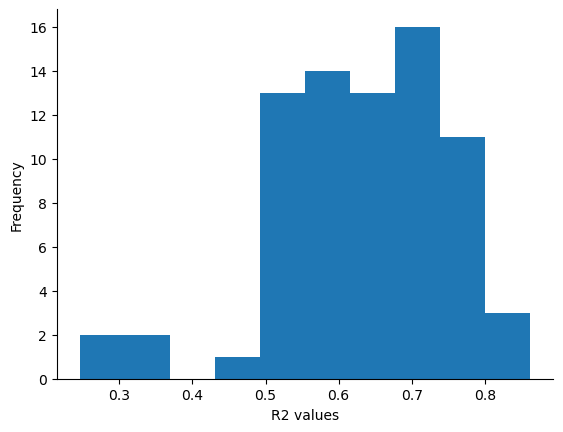

In [2]:

all_R2_values = []
for animal in GLM_params:
    for neuron in GLM_params[animal]:
        all_R2_values.append(GLM_params[animal][neuron]['R2'])
all_R2_values = np.array(all_R2_values)
plt.hist(all_R2_values.flatten(), bins=10)
plt.xlabel("R2 values")
plt.ylabel("Frequency")
plt.show()



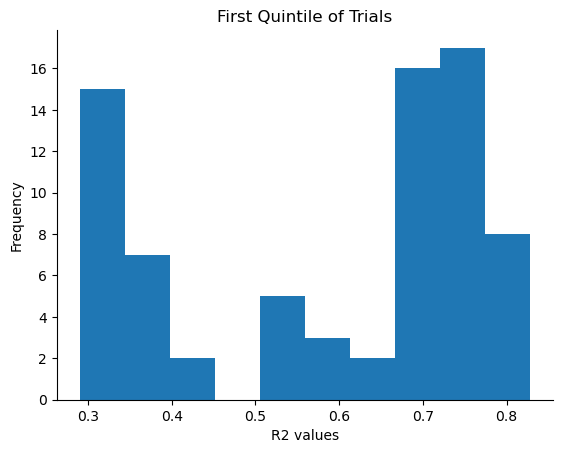

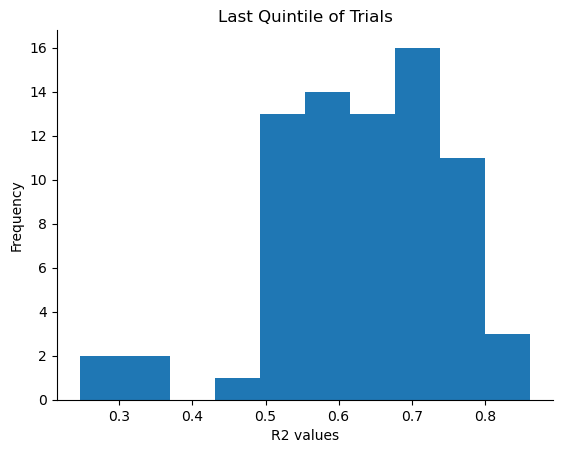

all_R2_values_last quintile maximum 0.8621664887005728
all_R2_values_first quintile minimum 0.8285971339973998
(75,)
The maximum R² value is 0.8621664887005728 at index 63.


In [1]:
from GLM_regression import *

filepath = "SSTindivsomata_GLM.mat"

reorganized_data, variable_list = load_data(filepath)

GLM_params_first_quintile = fit_GLM(reorganized_data, quintile=1)

all_R2_values_first = []
for animal in GLM_params_first_quintile:
    for neuron in GLM_params_first_quintile[animal]:
        all_R2_values_first.append(GLM_params_first_quintile[animal][neuron]['R2'])
all_R2_values_first = np.array(all_R2_values_first)

plt.hist(all_R2_values_first.flatten(), bins=10)
plt.xlabel("R2 values")
plt.ylabel("Frequency")
plt.title("First Quintile of Trials")
plt.show()

GLM_params_last_quintile = fit_GLM(reorganized_data, quintile=5)

all_R2_values_last = []
for animal in GLM_params_last_quintile:
    for neuron in GLM_params_last_quintile[animal]:
        all_R2_values_last.append(GLM_params_last_quintile[animal][neuron]['R2'])
all_R2_values_last = np.array(all_R2_values_last)

plt.hist(all_R2_values_last.flatten(), bins=10)
plt.xlabel("R2 values")
plt.ylabel("Frequency")
plt.title("Last Quintile of Trials")
plt.show()

print(f"all_R2_values_last quintile maximum {np.max(all_R2_values_last)}")
print(f"all_R2_values_first quintile minimum {np.max(all_R2_values_first)}")

print(all_R2_values_last.shape)

max_value = np.max(all_R2_values_last)

max_index = np.where(all_R2_values_last == max_value)[0][0]

print(f"The maximum R² value is {max_value} at index {max_index}.")

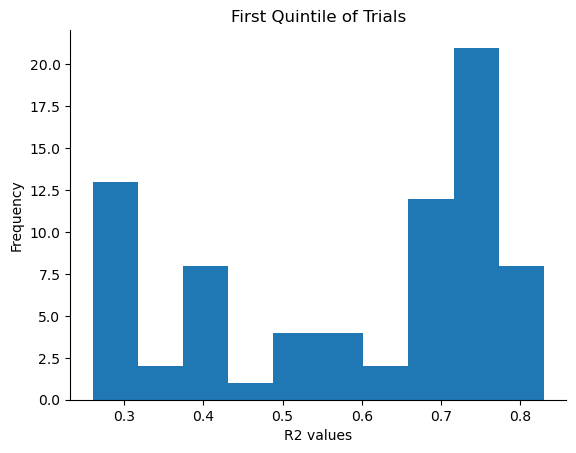

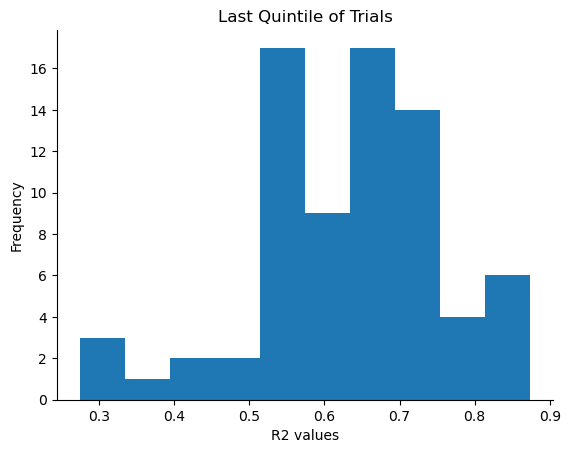

all_R2_values_last quintile maximum 0.8743363059199747
all_R2_values_first quintile minimum 0.829815132017199
The maximum R² value is 0.8743363059199747 at index 62.


In [1]:
############################### testing out lasso ###########################33

from GLM_regression import *

# Load data
filepath = "SSTindivsomata_GLM.mat"
reorganized_data, variable_list = load_data(filepath)

# Fit GLM with Lasso regression for the first quintile
GLM_params_first_quintile = fit_GLM(reorganized_data, quintile=1, regression='lasso')

# Collect R² values for the first quintile
all_R2_values_first = []
for animal in GLM_params_first_quintile:
    for neuron in GLM_params_first_quintile[animal]:
        all_R2_values_first.append(GLM_params_first_quintile[animal][neuron]['R2'])
all_R2_values_first = np.array(all_R2_values_first)

# Plot histogram of R² values for the first quintile
plt.hist(all_R2_values_first.flatten(), bins=10)
plt.xlabel("R2 values")
plt.ylabel("Frequency")
plt.title("First Quintile of Trials")
plt.show()

# Fit GLM with Lasso regression for the last quintile
GLM_params_last_quintile = fit_GLM(reorganized_data, quintile=5, regression='lasso')

# Collect R² values for the last quintile
all_R2_values_last = []
for animal in GLM_params_last_quintile:
    for neuron in GLM_params_last_quintile[animal]:
        all_R2_values_last.append(GLM_params_last_quintile[animal][neuron]['R2'])
all_R2_values_last = np.array(all_R2_values_last)

# Plot histogram of R² values for the last quintile
plt.hist(all_R2_values_last.flatten(), bins=10)
plt.xlabel("R2 values")
plt.ylabel("Frequency")
plt.title("Last Quintile of Trials")
plt.show()

# Print the maximum R² values for the last and first quintiles
print(f"all_R2_values_last quintile maximum {np.max(all_R2_values_last)}")
print(f"all_R2_values_first quintile minimum {np.max(all_R2_values_first)}")

# Find and print the index of the maximum R² value in the last quintile
max_value = np.max(all_R2_values_last)
max_index = np.where(all_R2_values_last == max_value)[0][0]
print(f"The maximum R² value is {max_value} at index {max_index}.")


NaN values found in example_data before normalization.
NaN values found in example_data after normalization.


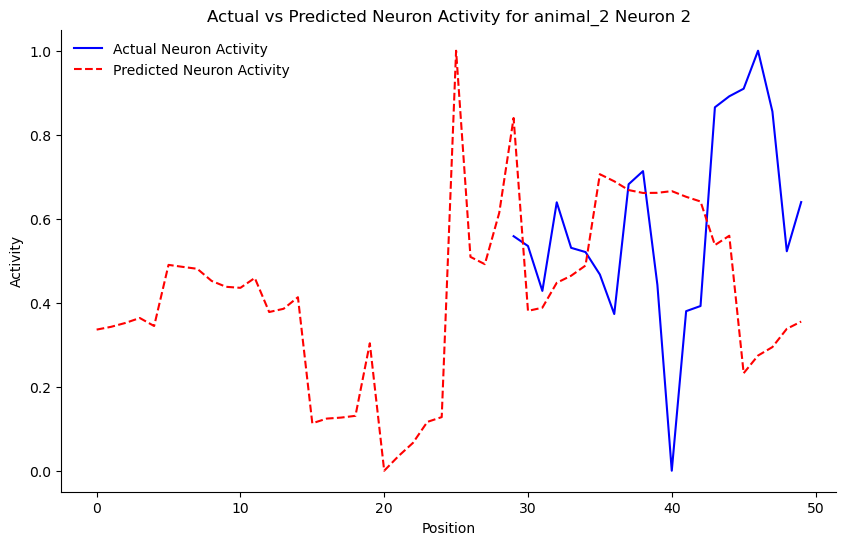

In [6]:
quintile = 1

GLM_params_quintile = fit_GLM(reorganized_data, quintile=quintile)

example_neuron = 2  
example_animal = 'animal_2'  


example_trial_number = 1  
example_data = reorganized_data[example_animal][example_neuron][:, :, example_trial_number]


if np.isnan(example_data).any():
    print("NaN values found in example_data before normalization.")
else:
    print("No NaN values in example_data before normalization.")
    
# normalization
example_data = (example_data - np.nanmin(example_data, axis=0)) / (np.nanmax(example_data, axis=0) - np.nanmin(example_data, axis=0))


if np.isnan(example_data).any():
    print("NaN values found in example_data after normalization.")
else:
    print("No NaN values in example_data after normalization.")

    

example_neuron_activity = example_data[:, 0]  # Neuron activity
example_variables = example_data[:, 1:]       # Other variables

# remove any rows with NaN values in example_variables
nan_mask = ~np.isnan(example_variables).any(axis=1)
example_neuron_activity = example_neuron_activity[nan_mask]
example_variables = example_variables[nan_mask]
    
glm_model = GLM_params_quintile[example_animal][example_neuron]['model']
predicted_activity = glm_model.predict(example_variables)

#normalize the glm data so that it looks similar to actual data
predicted_activity_normalized = (predicted_activity - np.min(predicted_activity)) / (np.max(predicted_activity) - np.min(predicted_activity))



fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(example_neuron_activity, label='Actual Neuron Activity', color='blue')
ax.plot(predicted_activity_normalized, label='Predicted Neuron Activity', color='red', linestyle='--')
ax.set_title(f'Actual vs Predicted Neuron Activity for {example_animal} Neuron {example_neuron}')
ax.set_xlabel('Position')
ax.set_ylabel('Activity')
ax.legend()
plt.show()


NaN values found in example_data before normalization.
NaN values found in example_data after normalization.
Number of NaNs in example_neuron_activity before filtering: 7
Number of data points remaining after filtering: 50
Filtered example_neuron_activity:
[       nan        nan        nan        nan        nan        nan
        nan 0.28192179 0.35002131 0.70067302 0.87912572 0.49790363
 0.70977681 1.         0.59674968 0.69131583 0.81785404 0.84591185
 0.6448     0.51470403 0.28922757 0.22045574 0.32760327 0.26509145
 0.3319323  0.5830794  0.9350251  0.76143124 0.66539531 0.80763133
 0.62769402 0.49089873 0.43638183 0.26408186 0.5656542  0.39412521
 0.1492556  0.12072045 0.12803904 0.01784398 0.06739961 0.23468986
 0.34624233 0.26322436 0.23278323 0.         0.16410084 0.11438451
 0.24224927 0.16766165]
Filtered example_variables:
[[0.         0.         0.21889715 0.         0.         0.
  0.         1.        ]
 [0.         0.         0.40005397 0.         0.         0.
  0.      

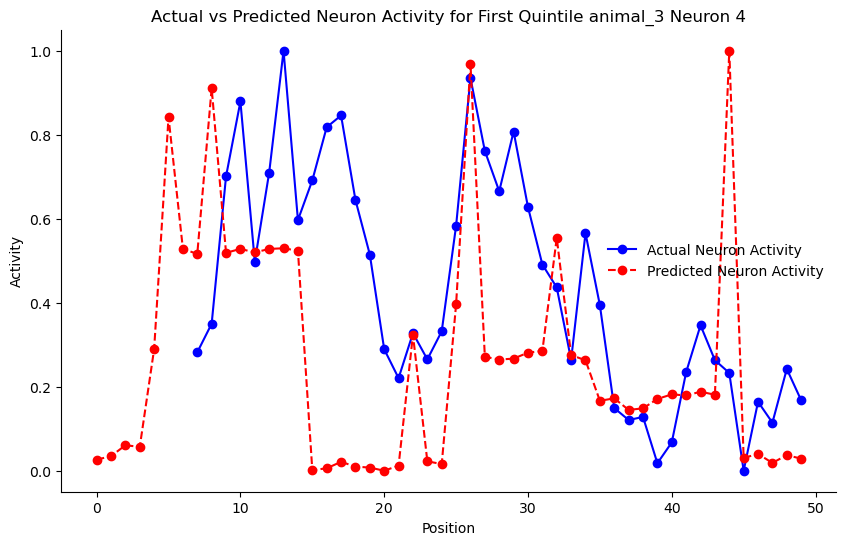

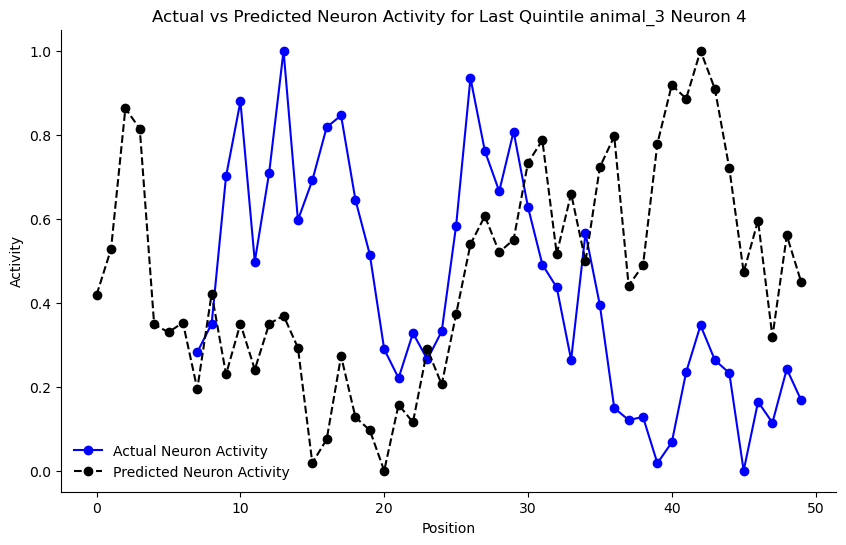

In [14]:
GLM_params_first_quintile = fit_GLM(reorganized_data, quintile=1)

GLM_params_last_quintile = fit_GLM(reorganized_data, quintile=5)

example_neuron = 4  
example_animal = 'animal_3'  

example_trial_number = 1  
example_data = reorganized_data[example_animal][example_neuron][:, :, example_trial_number]

# Check for NaNs before normalization
if np.isnan(example_data).any():
    print("NaN values found in example_data before normalization.")
else:
    print("No NaN values in example_data before normalization.")
    
# Normalization
example_data = (example_data - np.nanmin(example_data, axis=0)) / (np.nanmax(example_data, axis=0) - np.nanmin(example_data, axis=0))

# Check for NaNs after normalization
if np.isnan(example_data).any():
    print("NaN values found in example_data after normalization.")
else:
    print("No NaN values in example_data after normalization.")

# Split the data
example_neuron_activity = example_data[:, 0]  # Neuron activity
example_variables = example_data[:, 1:]       # Other variables

# Check the number of NaNs in example_neuron_activity before filtering
nan_count_neuron_activity = np.isnan(example_neuron_activity).sum()
print(f"Number of NaNs in example_neuron_activity before filtering: {nan_count_neuron_activity}")

# Apply nan_mask to remove rows with NaNs in example_variables
nan_mask = ~np.isnan(example_variables).any(axis=1)
example_neuron_activity = example_neuron_activity[nan_mask]
example_variables = example_variables[nan_mask]

# Check the number of data points remaining after filtering
print(f"Number of data points remaining after filtering: {len(example_neuron_activity)}")

# Use the GLM model for prediction
glm_model = GLM_params_first_quintile[example_animal][example_neuron]['model']
predicted_activity = glm_model.predict(example_variables)

# Normalize the predicted activity
predicted_activity_normalized = (predicted_activity - np.min(predicted_activity)) / (np.max(predicted_activity) - np.min(predicted_activity))

# Print the filtered data for inspection
print("Filtered example_neuron_activity:")
print(example_neuron_activity)
print("Filtered example_variables:")
print(example_variables)

# Plot the actual vs predicted neuron activity as points to visualize all data points
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(range(len(example_neuron_activity)), example_neuron_activity, 'bo-', label='Actual Neuron Activity')
ax.plot(range(len(predicted_activity_normalized)), predicted_activity_normalized, 'ro--', label='Predicted Neuron Activity')
ax.set_title(f'Actual vs Predicted Neuron Activity for First Quintile {example_animal} Neuron {example_neuron}')
ax.set_xlabel('Position')
ax.set_ylabel('Activity')
ax.legend()
plt.show()



glm_model = GLM_params_last_quintile[example_animal][example_neuron]['model']
predicted_activity = glm_model.predict(example_variables)

# Normalize the predicted activity
predicted_activity_normalized_last = (predicted_activity - np.min(predicted_activity)) / (np.max(predicted_activity) - np.min(predicted_activity))

# # Print the filtered data for inspection
# print("Filtered example_neuron_activity:")
# print(example_neuron_activity)
# print("Filtered example_variables:")
# print(example_variables)

# Plot the actual vs predicted neuron activity as points to visualize all data points
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(range(len(example_neuron_activity)), example_neuron_activity, 'bo-', label='Actual Neuron Activity')
ax.plot(range(len(predicted_activity_normalized_last)), predicted_activity_normalized_last, 'ko--', label='Predicted Neuron Activity')
ax.set_title(f'Actual vs Predicted Neuron Activity for Last Quintile {example_animal} Neuron {example_neuron}')
ax.set_xlabel('Position')
ax.set_ylabel('Activity')
ax.legend()
plt.show()

len R2_values_first_quintile 75
mean R2_values_first_quintile 0.5849980852375269
max R2_values_first_quintile 0.8285971339973998
len R2_values_last_quintile 75
 mean R2_values_last_quintile 0.561177153197406
 max R2_values_last_quintile 0.899186958112499


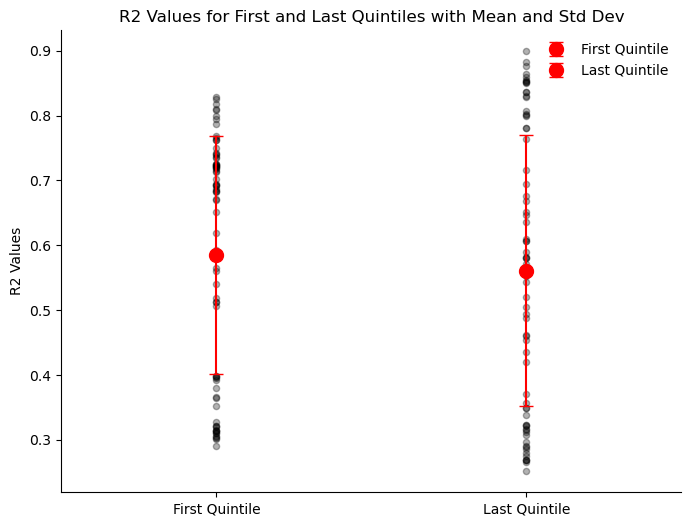

In [39]:
R2_values_first_quintile_history = []
GLM_params_first_quintile = fit_GLM(reorganized_data, quintile=1)
for animal in GLM_params_first_quintile:
    for neuron in GLM_params_first_quintile[animal]:
        R2_values_first_quintile = GLM_params_first_quintile[animal][neuron]['R2']
        R2_values_first_quintile_history.append(R2_values_first_quintile.copy())
print(f"len R2_values_first_quintile {len(R2_values_first_quintile_history)}")
print(f"mean R2_values_first_quintile {np.mean(R2_values_first_quintile_history)}")
print(f"max R2_values_first_quintile {np.max(R2_values_first_quintile_history)}")

        
R2_values_last_quintile_history = []
GLM_params_last_quintile = fit_GLM(reorganized_data, quintile=2)
for animal in GLM_params_last_quintile:
    for neuron in GLM_params_last_quintile[animal]:
        R2_values_last_quintile = GLM_params_last_quintile[animal][neuron]['R2']
        R2_values_last_quintile_history.append(R2_values_last_quintile)
print(f"len R2_values_last_quintile {len(R2_values_last_quintile_history)}")
print(f" mean R2_values_last_quintile {np.mean(R2_values_last_quintile_history)}")
print(f" max R2_values_last_quintile {np.max(R2_values_last_quintile_history)}")

# Plot individual data points for the first quintile
plt.figure(figsize=(8, 6))
plt.scatter(np.full_like(R2_values_first_quintile_history, 1), R2_values_first_quintile_history, color='black', alpha=0.3, s=20)

# Plot individual data points for the last quintile
plt.scatter(np.full_like(R2_values_last_quintile_history, 2), R2_values_last_quintile_history, color='black', alpha=0.3, s=20)

# Calculate means and standard deviations
mean_first_quintile = np.mean(R2_values_first_quintile_history)
std_first_quintile = np.std(R2_values_first_quintile_history)

mean_last_quintile = np.mean(R2_values_last_quintile_history)
std_last_quintile = np.std(R2_values_last_quintile_history)

# Plot the means and error bars
plt.errorbar(1, mean_first_quintile, yerr=std_first_quintile, fmt='o', color='red', markersize=10, capsize=5, label='First Quintile')
plt.errorbar(2, mean_last_quintile, yerr=std_last_quintile, fmt='o', color='red', markersize=10, capsize=5, label='Last Quintile')

# Customize the plot
plt.xticks([1, 2], ['First Quintile', 'Last Quintile'])
plt.ylabel('R2 Values')
plt.title('R2 Values for First and Last Quintiles with Mean and Std Dev')
plt.xlim(0.5, 2.5)

# Add legend
plt.legend()

# Show the plot
plt.show()

    
# R2_values = [GLM_params_first_quintile[example_animal][i]['R2'] for i in GLM_params[example_animal]]
# example_neuron = np.argmax(R2_values)

# R2 = GLM_params[example_animal][example_neuron]['R2']

len R2_values_first_quintile 75
mean R2_values_first_quintile 0.5842261299811976
max R2_values_first_quintile 0.829815132017199
len R2_values_last_quintile 75
 mean R2_values_last_quintile 0.5741514151690427
 max R2_values_last_quintile 0.8790327359752077


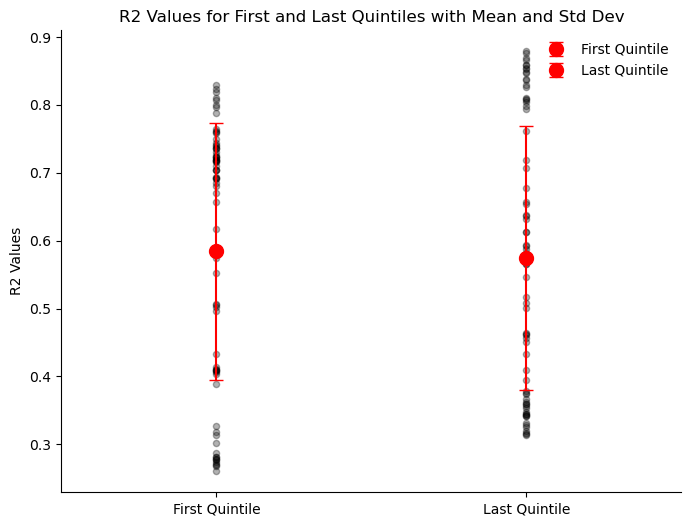

In [2]:
########################### testing out lasso ##################

R2_values_first_quintile_history = []
GLM_params_first_quintile = fit_GLM(reorganized_data, quintile=1, regression='lasso')
for animal in GLM_params_first_quintile:
    for neuron in GLM_params_first_quintile[animal]:
        R2_values_first_quintile = GLM_params_first_quintile[animal][neuron]['R2']
        R2_values_first_quintile_history.append(R2_values_first_quintile.copy())
print(f"len R2_values_first_quintile {len(R2_values_first_quintile_history)}")
print(f"mean R2_values_first_quintile {np.mean(R2_values_first_quintile_history)}")
print(f"max R2_values_first_quintile {np.max(R2_values_first_quintile_history)}")

        
R2_values_last_quintile_history = []
GLM_params_last_quintile = fit_GLM(reorganized_data, quintile=2, regression='lasso')
for animal in GLM_params_last_quintile:
    for neuron in GLM_params_last_quintile[animal]:
        R2_values_last_quintile = GLM_params_last_quintile[animal][neuron]['R2']
        R2_values_last_quintile_history.append(R2_values_last_quintile)
print(f"len R2_values_last_quintile {len(R2_values_last_quintile_history)}")
print(f" mean R2_values_last_quintile {np.mean(R2_values_last_quintile_history)}")
print(f" max R2_values_last_quintile {np.max(R2_values_last_quintile_history)}")

# Plot individual data points for the first quintile
plt.figure(figsize=(8, 6))
plt.scatter(np.full_like(R2_values_first_quintile_history, 1), R2_values_first_quintile_history, color='black', alpha=0.3, s=20)

# Plot individual data points for the last quintile
plt.scatter(np.full_like(R2_values_last_quintile_history, 2), R2_values_last_quintile_history, color='black', alpha=0.3, s=20)

# Calculate means and standard deviations
mean_first_quintile = np.mean(R2_values_first_quintile_history)
std_first_quintile = np.std(R2_values_first_quintile_history)

mean_last_quintile = np.mean(R2_values_last_quintile_history)
std_last_quintile = np.std(R2_values_last_quintile_history)

# Plot the means and error bars
plt.errorbar(1, mean_first_quintile, yerr=std_first_quintile, fmt='o', color='red', markersize=10, capsize=5, label='First Quintile')
plt.errorbar(2, mean_last_quintile, yerr=std_last_quintile, fmt='o', color='red', markersize=10, capsize=5, label='Last Quintile')

# Customize the plot
plt.xticks([1, 2], ['First Quintile', 'Last Quintile'])
plt.ylabel('R2 Values')
plt.title('R2 Values for First and Last Quintiles with Mean and Std Dev')
plt.xlim(0.5, 2.5)

# Add legend
plt.legend()

# Show the plot
plt.show()


In [ ]:
num_animals_GLM_first_quintile = fit_GLM(reorganized_data, quintile=1)
print(f"num_animals_GLM_first_quintile {num_animals_GLM_first_quintile}")
num_neurons = num_animals_GLM_first_quintile[animal]

In [29]:
total_neurons = 0

# Iterate over each animal in GLM_params_first_quintile
for animal in GLM_params_first_quintile:
    # Get the number of neurons for the current animal
    num_neurons = len(GLM_params_first_quintile[animal])
    
    # Add to the total count of neurons
    total_neurons += num_neurons

print(f"Total number of neurons across all animals: {total_neurons}")



Total number of neurons across all animals: 75


In [23]:
animal_idx = 2  
neuron_idx = 1 

# Construct the correct dictionary key for the specific animal
animal_key = f'animal_{animal_idx + 1}'  # Adjust for 0-based indexing in Python

# Check if the animal key exists in reorganized_data
if animal_key in reorganized_data:
    # Check if the neuron index is within the range for the specific animal
    if neuron_idx < len(reorganized_data[animal_key]):
        neuron = reorganized_data[animal_key][neuron_idx]
        num_trials = neuron.shape[2]  # Number of trials for the specific neuron
        quintile_size = num_trials // 5  # Size of each quintile

        print(f"Animal: {animal_key}, Neuron Index: {neuron_idx}")
        print(f"Number of Trials: {num_trials}")
        print(f"Quintile Size: {quintile_size}")
    else:
        print(f"Neuron index {neuron_idx} is out of range for {animal_key}.")
else:
    print(f"{animal_key} not found in reorganized_data.")


Animal: animal_3, Neuron Index: 1
Number of Trials: 83
Quintile Size: 16


In [7]:
animal_idx = 2  # Index for the specific animal (assuming 0-based index)
neuron_idx = 1  # Index for the specific neuron (assuming 0-based index)


animal_key = f'animal_{animal_idx + 1}'  # Adjust for 0-based indexing in Python

# Check if the animal key exists in reorganized_data
if animal_key in reorganized_data:
    # Check if the neuron index is within the range for the specific animal
    if neuron_idx < len(reorganized_data[animal_key]):
        neuron = reorganized_data[animal_key][neuron_idx]
#         num_trials = neuron.shape[2]  # Number of trials for the specific neuron
        num_trials = 104
        
        # Calculate the quintile indices
        quintile_indices = [(i * num_trials) // 5 for i in range(6)]  # This will give you the start indices for each quintile
        
        quintiles = []
        for i in range(5):
            start_idx = quintile_indices[i]
            end_idx = quintile_indices[i + 1]
            quintile_size = end_idx - start_idx
            quintiles.append((start_idx, end_idx, quintile_size))
        
        # Print out the calculated quintile sizes
        print(f"Animal: {animal_key}, Neuron Index: {neuron_idx}")
        print(f"Number of Trials: {num_trials}")
        for i, (start_idx, end_idx, quintile_size) in enumerate(quintiles):
            print(f"Quintile {i + 1}: Start Index = {start_idx}, End Index = {end_idx}, Size = {quintile_size}")
        
    else:
        print(f"Neuron index {neuron_idx} is out of range for {animal_key}.")
else:
    print(f"{animal_key} not found in reorganized_data.")


Animal: animal_3, Neuron Index: 1
Number of Trials: 104
Quintile 1: Start Index = 0, End Index = 20, Size = 20
Quintile 2: Start Index = 20, End Index = 41, Size = 21
Quintile 3: Start Index = 41, End Index = 62, Size = 21
Quintile 4: Start Index = 62, End Index = 83, Size = 21
Quintile 5: Start Index = 83, End Index = 104, Size = 21


R2: 0.8053189988819718
alpha: 1.0


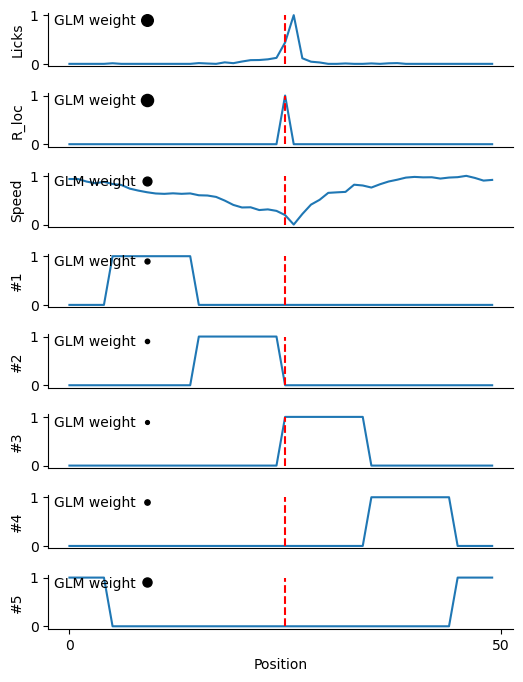

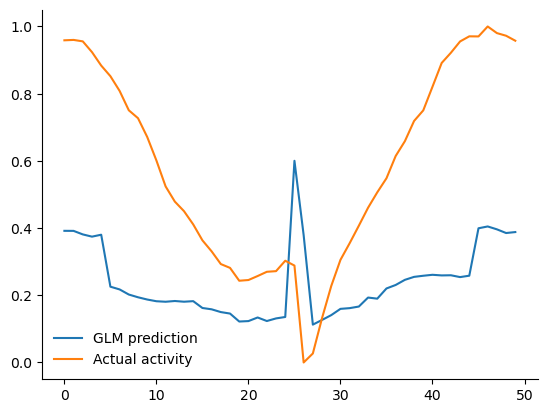

In [9]:
example_animal = 'animal_6'
example_trial = 4
# example_neuron = 1
R2_values = [GLM_params[example_animal][i]['R2'] for i in GLM_params[example_animal]]
example_neuron = np.argmax(R2_values)

R2 = GLM_params[example_animal][example_neuron]['R2']

example_data = np.nanmean(reorganized_data[example_animal][example_neuron][:,:,1:], axis=2)
example_data = (example_data - np.nanmin(example_data, axis=0)) / (np.nanmax(example_data, axis=0) - np.nanmin(example_data, axis=0))
example_neuron_activity = example_data[:, 0]
example_variables = example_data[:, 1:]

# example_data = reorganized_data[example_animal][example_neuron][:,:,1:]
# example_data = (example_data - np.nanmin(example_data, axis=0)) / (np.nanmax(example_data, axis=0) - np.nanmin(example_data, axis=0))
# example_neuron_activity = example_data[:, 0, example_trial]
# example_variables = example_data[:, 1:, example_trial]


fig = plt.figure(figsize=(6, 8))
axes = gs.GridSpec(nrows=example_variables.shape[1], ncols=1, figure=fig, 
                wspace=0.1, hspace=0.5)

for i in range(example_variables.shape[1]):
    ax = fig.add_subplot(axes[i])
    ax.plot(example_variables[:, i])
    ax.set_ylabel(variable_list[i+1])
    ax.vlines(25, 0, 1, linestyles='--', color='r')
    if i == example_variables.shape[1] - 1:
        ax.set_xlabel('Position')
        ax.set_xticks([0,50])
    else:
        ax.set_xticks([])

    ax.text(0.1, 0.85, 'GLM weight', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
    ax.scatter([9],[0.9], c='k', s=GLM_params[example_animal][example_neuron]["weights"][i]*200)


# Plot prediction vs actual neuron activity
glm_model = GLM_params[example_animal][example_neuron]['model']
predicted_activity = glm_model.predict(example_variables)
pred_norm = (predicted_activity - np.min(predicted_activity)) / (np.max(predicted_activity) - np.min(predicted_activity))
actual_norm = (example_neuron_activity - np.min(example_neuron_activity)) / (np.max(example_neuron_activity) - np.min(example_neuron_activity))

print("R2:", GLM_params[example_animal][example_neuron]['R2'])
print("alpha:", GLM_params[example_animal][example_neuron]['alpha'])

plt.figure()
plt.plot(predicted_activity, label='GLM prediction')
plt.plot(example_neuron_activity, label='Actual activity')

# plt.plot(pred_norm, label='GLM prediction', c='gray', linestyle='--')
# plt.plot(actual_norm, label='Actual activity', c='k')
plt.legend()


<BarContainer object of 8 artists>

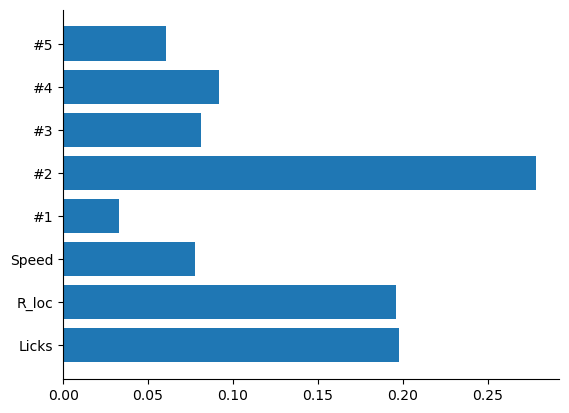

In [367]:
neuron_nr = 2

# Bar graph
plt.barh(variable_list[1:], GLM_params['animal_1'][neuron_nr]['weights'])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.636e+01, tolerance: 1.575e-01
  model = cd_fast.enet_coordinate_descent(


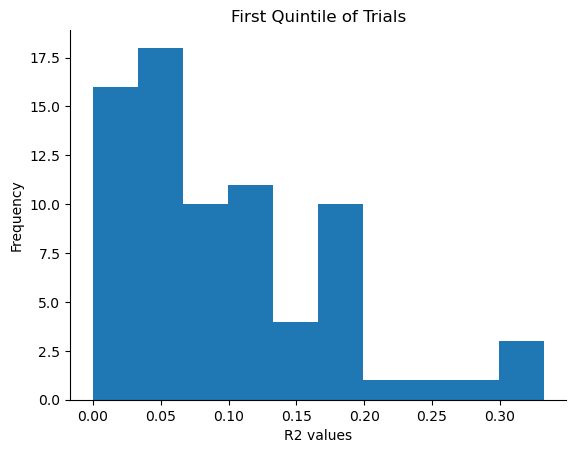

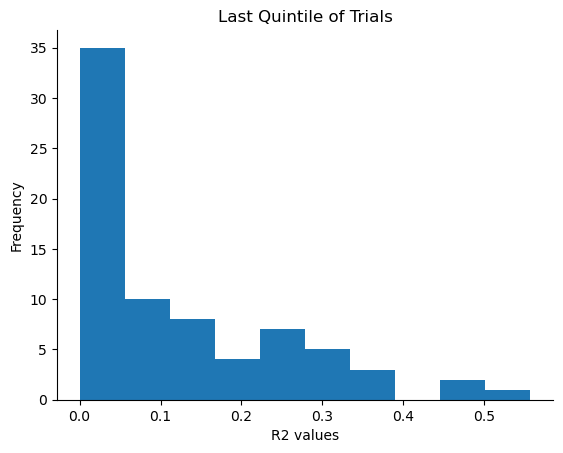

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.017e+02, tolerance: 7.673e-01
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.118e+01, tolerance: 8.175e-01
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.975e+01, toleranc

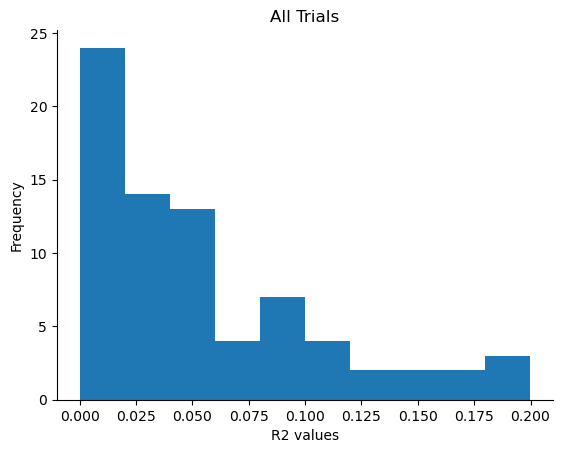

all_R2_values_last quintile maximum 0.5571772861844826
all_R2_values_first quintile minimum 0.33230335456161064
The maximum R² value is 0.5571772861844826 at index 58.
all_R2_values_last quintile mean 0.12856764898173753
all_R2_values_first quintile mean 0.09513305470534124


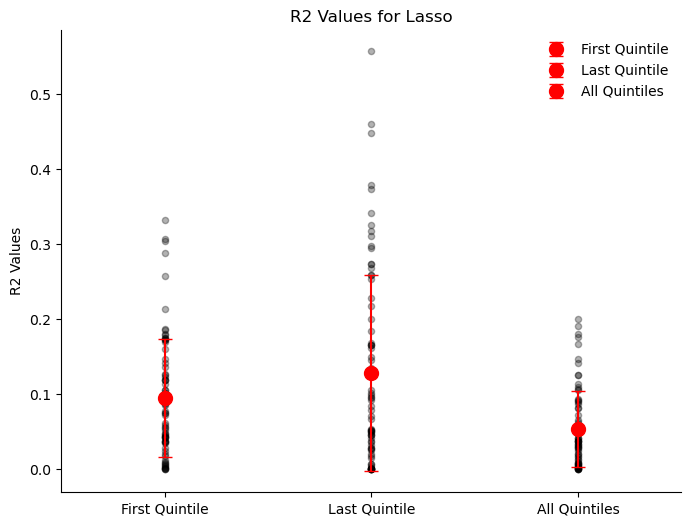

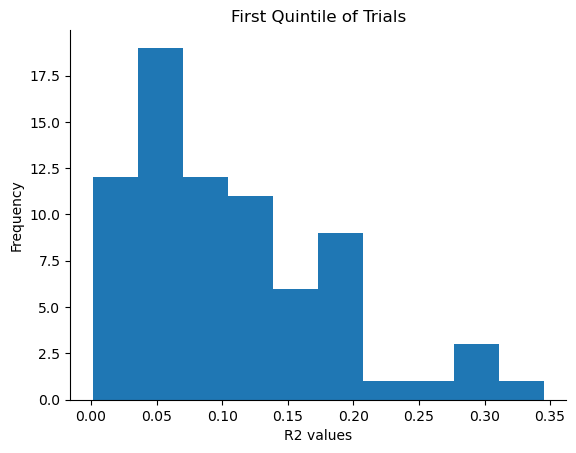

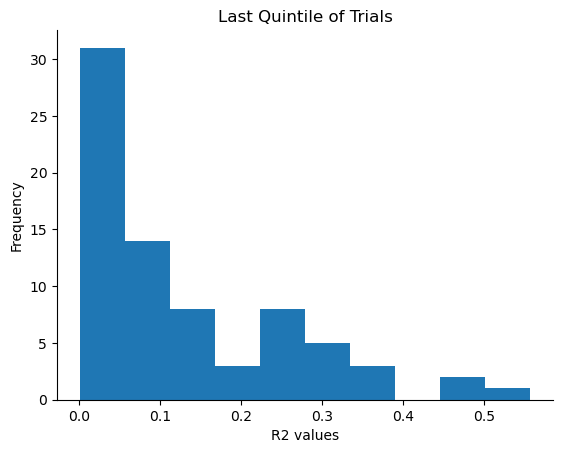

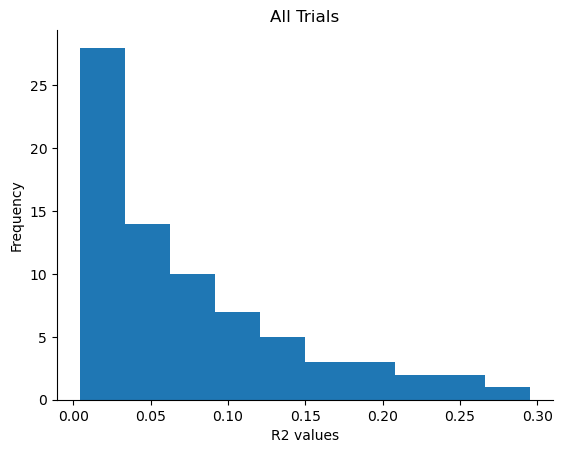

all_R2_values_last quintile maximum 0.5571791063532394
all_R2_values_first quintile minimum 0.3451501481100382
The maximum R² value is 0.5571791063532394 at index 58.
all_R2_values_last quintile mean 0.13521241865662414
all_R2_values_first quintile mean 0.10283955135429454


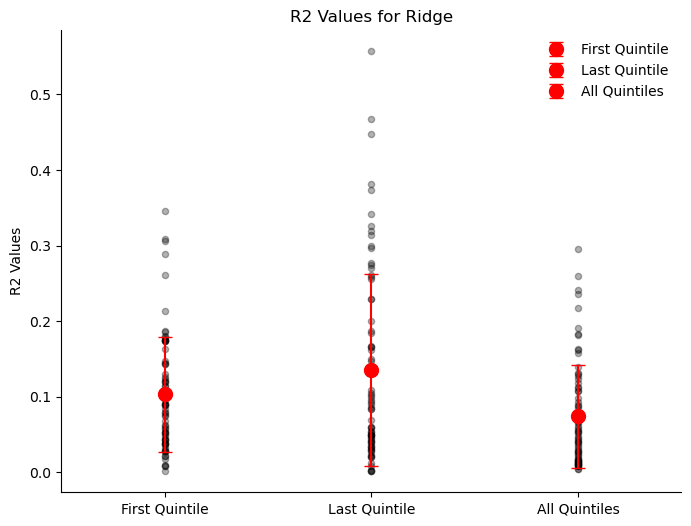

In [1]:
############################### testing out lasso ###########################33

from GLM_regression import *


filepath = "SSTindivsomata_GLM.mat"
reorganized_data, variable_list = load_data(filepath)


GLM_params_first_quintile_new = fit_GLM(reorganized_data, quintile=1, regression='lasso')


all_R2_values_first_new = []
for animal in GLM_params_first_quintile_new:
    for neuron in GLM_params_first_quintile_new[animal]:
        all_R2_values_first_new.append(GLM_params_first_quintile_new[animal][neuron]['R2'])
all_R2_values_first_new = np.array(all_R2_values_first_new)


plt.hist(all_R2_values_first_new.flatten(), bins=10)
plt.xlabel("R2 values")
plt.ylabel("Frequency")
plt.title("First Quintile of Trials")
plt.show()


GLM_params_last_quintile_new = fit_GLM(reorganized_data, quintile=5, regression='lasso')


all_R2_values_last_new = []
for animal in GLM_params_last_quintile_new:
    for neuron in GLM_params_last_quintile_new[animal]:
        all_R2_values_last_new.append(GLM_params_last_quintile_new[animal][neuron]['R2'])
all_R2_values_last_new = np.array(all_R2_values_last_new)



plt.hist(all_R2_values_last_new.flatten(), bins=10)
plt.xlabel("R2 values")
plt.ylabel("Frequency")
plt.title("Last Quintile of Trials")
plt.show()


GLM_params_all_quintile_new = fit_GLM(reorganized_data, quintile=None, regression='lasso')

all_R2_values_all_new = []
for animal in GLM_params_all_quintile_new:
    for neuron in GLM_params_all_quintile_new[animal]:
        all_R2_values_all_new.append(GLM_params_all_quintile_new[animal][neuron]['R2'])
all_R2_values_all_new = np.array(all_R2_values_all_new)



plt.hist(all_R2_values_all_new.flatten(), bins=10)
plt.xlabel("R2 values")
plt.ylabel("Frequency")
plt.title("All Trials")
plt.show()


print(f"all_R2_values_last quintile maximum {np.max(all_R2_values_last_new)}")
print(f"all_R2_values_first quintile minimum {np.max(all_R2_values_first_new)}")


max_value = np.max(all_R2_values_last_new)
max_index = np.where(all_R2_values_last_new == max_value)[0][0]
print(f"The maximum R² value is {max_value} at index {max_index}.")
print(f"all_R2_values_last quintile mean {np.mean(all_R2_values_last_new)}")
print(f"all_R2_values_first quintile mean {np.mean(all_R2_values_first_new)}")


plt.figure(figsize=(8, 6))
plt.scatter(np.full_like(all_R2_values_first_new, 1), all_R2_values_first_new, color='black', alpha=0.3, s=20)

plt.scatter(np.full_like(all_R2_values_last_new, 2), all_R2_values_last_new, color='black', alpha=0.3, s=20)


plt.scatter(np.full_like(all_R2_values_all_new, 3), all_R2_values_all_new, color='black', alpha=0.3, s=20)


mean_first_quintile = np.mean(all_R2_values_first_new)
std_first_quintile = np.std(all_R2_values_first_new)

mean_last_quintile = np.mean(all_R2_values_last_new)
std_last_quintile = np.std(all_R2_values_last_new)

mean_all_quintile = np.mean(all_R2_values_all_new)
std_all_quintile = np.std(all_R2_values_all_new)


plt.errorbar(1, mean_first_quintile, yerr=std_first_quintile, fmt='o', color='red', markersize=10, capsize=5, label='First Quintile')
plt.errorbar(2, mean_last_quintile, yerr=std_last_quintile, fmt='o', color='red', markersize=10, capsize=5, label='Last Quintile')
plt.errorbar(3, mean_all_quintile, yerr=std_all_quintile, fmt='o', color='red', markersize=10, capsize=5, label='All Quintiles')


plt.xticks([1, 2, 3], ['First Quintile', 'Last Quintile', 'All Quintiles'])
plt.ylabel('R2 Values')
plt.title('R2 Values for Lasso')
plt.xlim(0.5, 3.5)

plt.legend()
plt.show()



############################### testing out ridge ###########################


GLM_params_first_quintile_new = fit_GLM(reorganized_data, quintile=1, regression='ridge', alphas=[0.1, 1, 10, 100, 1000])


all_R2_values_first_new = []
for animal in GLM_params_first_quintile_new:
    for neuron in GLM_params_first_quintile_new[animal]:
        all_R2_values_first_new.append(GLM_params_first_quintile_new[animal][neuron]['R2'])
all_R2_values_first_new = np.array(all_R2_values_first_new)


plt.hist(all_R2_values_first_new.flatten(), bins=10)
plt.xlabel("R2 values")
plt.ylabel("Frequency")
plt.title("First Quintile of Trials")
plt.show()


GLM_params_last_quintile_new = fit_GLM(reorganized_data, quintile=5, regression='ridge', alphas=[0.1, 1, 10, 100, 1000])


all_R2_values_last_new = []
for animal in GLM_params_last_quintile_new:
    for neuron in GLM_params_last_quintile_new[animal]:
        all_R2_values_last_new.append(GLM_params_last_quintile_new[animal][neuron]['R2'])
all_R2_values_last_new = np.array(all_R2_values_last_new)



plt.hist(all_R2_values_last_new.flatten(), bins=10)
plt.xlabel("R2 values")
plt.ylabel("Frequency")
plt.title("Last Quintile of Trials")
plt.show()


GLM_params_all_quintile_new = fit_GLM(reorganized_data, quintile=None, regression='ridge', alphas=[0.1, 1, 10, 100, 1000])

all_R2_values_all_new = []
for animal in GLM_params_all_quintile_new:
    for neuron in GLM_params_all_quintile_new[animal]:
        all_R2_values_all_new.append(GLM_params_all_quintile_new[animal][neuron]['R2'])
all_R2_values_all_new = np.array(all_R2_values_all_new)



plt.hist(all_R2_values_all_new.flatten(), bins=10)
plt.xlabel("R2 values")
plt.ylabel("Frequency")
plt.title("All Trials")
plt.show()


print(f"all_R2_values_last quintile maximum {np.max(all_R2_values_last_new)}")
print(f"all_R2_values_first quintile minimum {np.max(all_R2_values_first_new)}")


max_value = np.max(all_R2_values_last_new)
max_index = np.where(all_R2_values_last_new == max_value)[0][0]
print(f"The maximum R² value is {max_value} at index {max_index}.")
print(f"all_R2_values_last quintile mean {np.mean(all_R2_values_last_new)}")
print(f"all_R2_values_first quintile mean {np.mean(all_R2_values_first_new)}")


plt.figure(figsize=(8, 6))
plt.scatter(np.full_like(all_R2_values_first_new, 1), all_R2_values_first_new, color='black', alpha=0.3, s=20)

plt.scatter(np.full_like(all_R2_values_last_new, 2), all_R2_values_last_new, color='black', alpha=0.3, s=20)


plt.scatter(np.full_like(all_R2_values_all_new, 3), all_R2_values_all_new, color='black', alpha=0.3, s=20)


mean_first_quintile = np.mean(all_R2_values_first_new)
std_first_quintile = np.std(all_R2_values_first_new)

mean_last_quintile = np.mean(all_R2_values_last_new)
std_last_quintile = np.std(all_R2_values_last_new)

mean_all_quintile = np.mean(all_R2_values_all_new)
std_all_quintile = np.std(all_R2_values_all_new)


plt.errorbar(1, mean_first_quintile, yerr=std_first_quintile, fmt='o', color='red', markersize=10, capsize=5, label='First Quintile')
plt.errorbar(2, mean_last_quintile, yerr=std_last_quintile, fmt='o', color='red', markersize=10, capsize=5, label='Last Quintile')
plt.errorbar(3, mean_all_quintile, yerr=std_all_quintile, fmt='o', color='red', markersize=10, capsize=5, label='All Quintiles')


plt.xticks([1, 2, 3], ['First Quintile', 'Last Quintile', 'All Quintiles'])
plt.ylabel('R2 Values')
plt.title('R2 Values for Ridge')
plt.xlim(0.5, 3.5)

plt.legend()
plt.show()



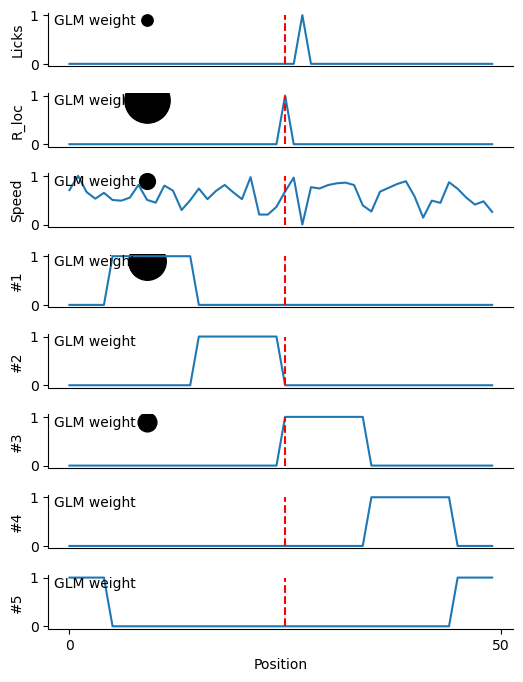

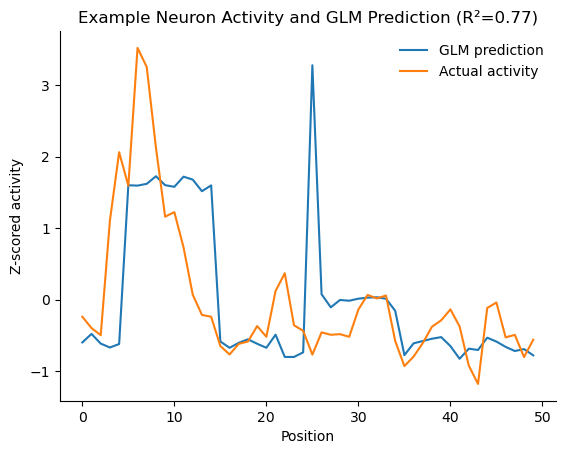

In [5]:
####### lasso #######

from GLM_regression_MF import *

filepath = "SSTindivsomata_GLM.mat"
reorganized_data, variable_list = load_data(filepath)

# Z-score function
def z_score(data):
    return (data - np.mean(data)) / np.std(data)

# Fit the GLM for the last quintile
GLM_params_last_quintile_new = fit_GLM(reorganized_data, quintile=5, regression='lasso')

example_animal = 'animal_6'
example_trial = 4

R2_values = [GLM_params_last_quintile_new[example_animal][i]['R2'] for i in GLM_params_last_quintile_new[example_animal]]
example_neuron = np.argmax(R2_values)

R2 = GLM_params_last_quintile_new[example_animal][example_neuron]['R2']


example_data = reorganized_data[example_animal][example_neuron][:,:,example_trial]
example_neuron_activity = example_data[:, 0]
example_neuron_activity_zscored = z_score(example_neuron_activity)
example_variables = example_data[:, 1:]
example_variables_normalized = (example_variables - np.min(example_variables, axis=0)) / (np.max(example_variables, axis=0) - np.min(example_variables, axis=0))

# Plot the variables with their GLM weights
fig = plt.figure(figsize=(6, 8))
axes = gs.GridSpec(nrows=example_variables.shape[1], ncols=1, figure=fig, wspace=0.1, hspace=0.5)

for i in range(example_variables.shape[1]):
    ax = fig.add_subplot(axes[i])
    ax.plot(example_variables_normalized[:, i])
    ax.set_ylabel(variable_list[i+1])
    ax.vlines(25, 0, 1, linestyles='--', color='r')
    if i == example_variables.shape[1] - 1:
        ax.set_xlabel('Position')
        ax.set_xticks([0,50])
    else:
        ax.set_xticks([])

    ax.text(0.1, 0.85, 'GLM weight', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
    ax.scatter([9],[0.9], c='k', s=GLM_params_last_quintile_new[example_animal][example_neuron]["weights"][i]*200)

# Plot prediction vs actual neuron activity
glm_model = GLM_params_last_quintile_new[example_animal][example_neuron]['model']
predicted_activity = glm_model.predict(example_variables_normalized)
pred_norm = z_score(predicted_activity)
actual_norm = example_neuron_activity_zscored

plt.figure()
plt.plot(pred_norm, label='GLM prediction')
plt.plot(actual_norm, label='Actual activity')
plt.legend()
plt.xlabel('Position')
plt.ylabel('Z-scored activity')
plt.title(f'Example Neuron Activity and GLM Prediction (R²={R2:.2f})')
plt.show()


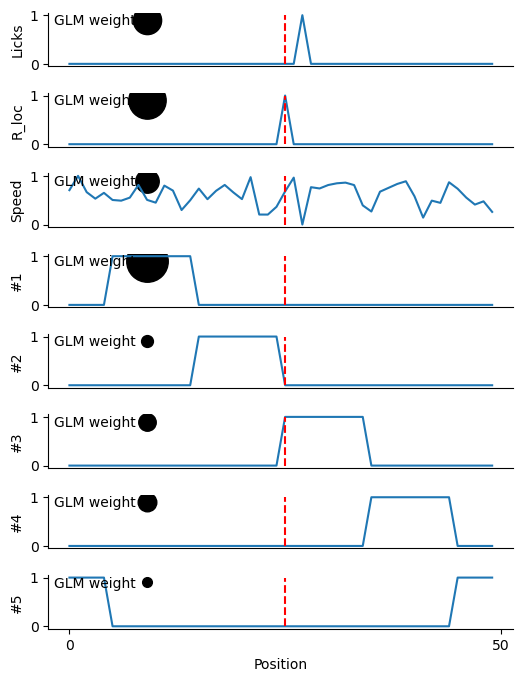

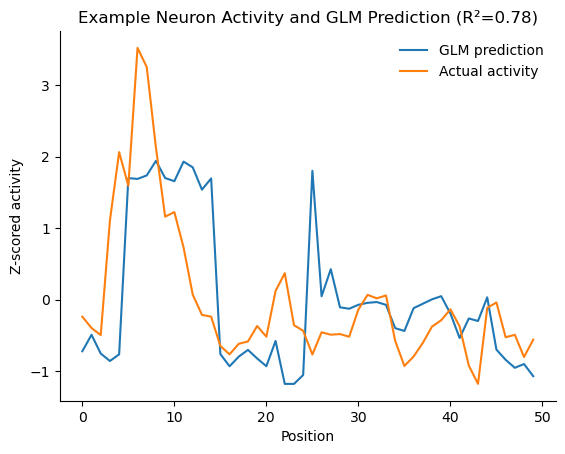

In [16]:
from GLM_regression_MF import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs

filepath = "SSTindivsomata_GLM.mat"
reorganized_data, variable_list = load_data(filepath)

# Z-score function
def z_score(data):
    return (data - np.nanmean(data)) / np.nanstd(data)

# Fit the GLM for the last quintile
GLM_params_last_quintile_new = fit_GLM(reorganized_data, quintile=5, regression='ridge', alphas=[0.1, 1, 10, 100, 1000, 10000])

example_animal = 'animal_6'
example_trial = 4

R2_values = [GLM_params_last_quintile_new[example_animal][i]['R2'] for i in GLM_params_last_quintile_new[example_animal]]
example_neuron = np.argmax(R2_values)

R2 = GLM_params_last_quintile_new[example_animal][example_neuron]['R2']

# Extract and normalize data
example_data = reorganized_data[example_animal][example_neuron][:, :, example_trial]
example_neuron_activity = example_data[:, 0]
example_neuron_activity_zscored = z_score(example_neuron_activity)
example_variables = example_data[:, 1:]

# Handle NaNs and empty arrays
example_variables = np.nan_to_num(example_variables, nan=0.0)

# Normalize variables
min_vals = np.nanmin(example_variables, axis=0)
max_vals = np.nanmax(example_variables, axis=0)

# Ensure there is a difference to avoid division by zero
range_vals = np.where(max_vals - min_vals == 0, 1, max_vals - min_vals)
example_variables_normalized = (example_variables - min_vals) / range_vals

# Plot the variables with their GLM weights
fig = plt.figure(figsize=(6, 8))
axes = gs.GridSpec(nrows=example_variables.shape[1], ncols=1, figure=fig, wspace=0.1, hspace=0.5)

for i in range(example_variables.shape[1]):
    ax = fig.add_subplot(axes[i])
    ax.plot(example_variables_normalized[:, i])
    ax.set_ylabel(variable_list[i + 1])
    ax.vlines(25, 0, 1, linestyles='--', color='r')
    if i == example_variables.shape[1] - 1:
        ax.set_xlabel('Position')
        ax.set_xticks([0, 50])
    else:
        ax.set_xticks([])

    weight = GLM_params_last_quintile_new[example_animal][example_neuron]["weights"][i]
    if np.isnan(weight) or np.isinf(weight):
        weight = 0  # Handle NaN or infinite weights safely
    ax.text(0.1, 0.85, 'GLM weight', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
    ax.scatter([9], [0.9], c='k', s=np.abs(weight) * 200)

# Plot prediction vs actual neuron activity
glm_model = GLM_params_last_quintile_new[example_animal][example_neuron]['model']
predicted_activity = glm_model.predict(example_variables_normalized)
pred_norm = z_score(predicted_activity)
actual_norm = example_neuron_activity_zscored

plt.figure()
plt.plot(pred_norm, label='GLM prediction')
plt.plot(actual_norm, label='Actual activity')
plt.legend()
plt.xlabel('Position')
plt.ylabel('Z-scored activity')
plt.title(f'Example Neuron Activity and GLM Prediction (R²={R2:.2f})')
plt.show()


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.587e+01, tolerance: 3.900e-01
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.307e+01, tolerance: 3.900e-01
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.564e+01, toleranc

Best neuron: 31
R2: 0.09263517882397265
alpha: 0.0033194209255247003
pearson R2 overall: 0.09306171830284933
pearson R2 average: 0.9075296778122309


C:\ProgramData\anaconda3\Lib\site-packages\matplotlib\axes\_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
C:\ProgramData\anaconda3\Lib\site-packages\matplotlib\axes\_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])


FileNotFoundError: [Errno 2] No such file or directory: 'figures/GLM_regression_EC_GLM_animal_2_31.png'

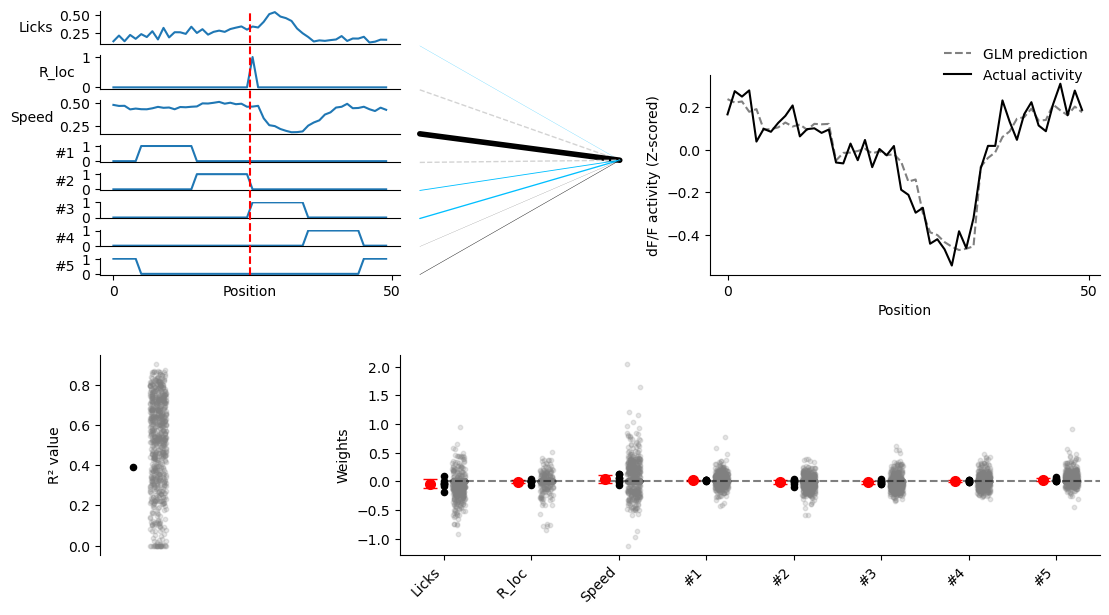

In [2]:
import mat73
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
from sklearn.linear_model import RidgeCV
%load_ext autoreload
%autoreload 2

from GLM_regression import *

plt.rcParams.update({'font.size': 10,
                    'axes.spines.right': False,
                    'axes.spines.top':   False,
                    'legend.frameon':       False,})


# plt.rcParams.update({'font.size': 10,
#                     'axes.spines.right': False,
#                     'axes.spines.top':   False,
#                     'legend.frameon':       False,
#                     'font.sans-serif': 'Helvetica',
#                     'svg.fonttype': 'none'})

# filepath = "SSTindivsomata_GLM.mat"
# filepath = "NDNFindivsomata_GLM.mat"
filepath = "EC_GLM.mat"

reorganized_data, variable_list = load_data(filepath)
GLM_params = fit_GLM(reorganized_data, quintile=None, regression='lasso')

animal='animal_2'
plot_example_neuron(animal, reorganized_data, GLM_params, variable_list, neuron='best', model_name=filepath.split('.')[0])

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Best neuron: 31
R2: 0.09332792985681704
alpha: 1.0
pearson R2 overall: 0.06607091646390902
pearson R2 average: 0.8991807154154299


FileNotFoundError: [Errno 2] No such file or directory: 'figures/GLM_regression_EC_GLM_animal_2_31.png'

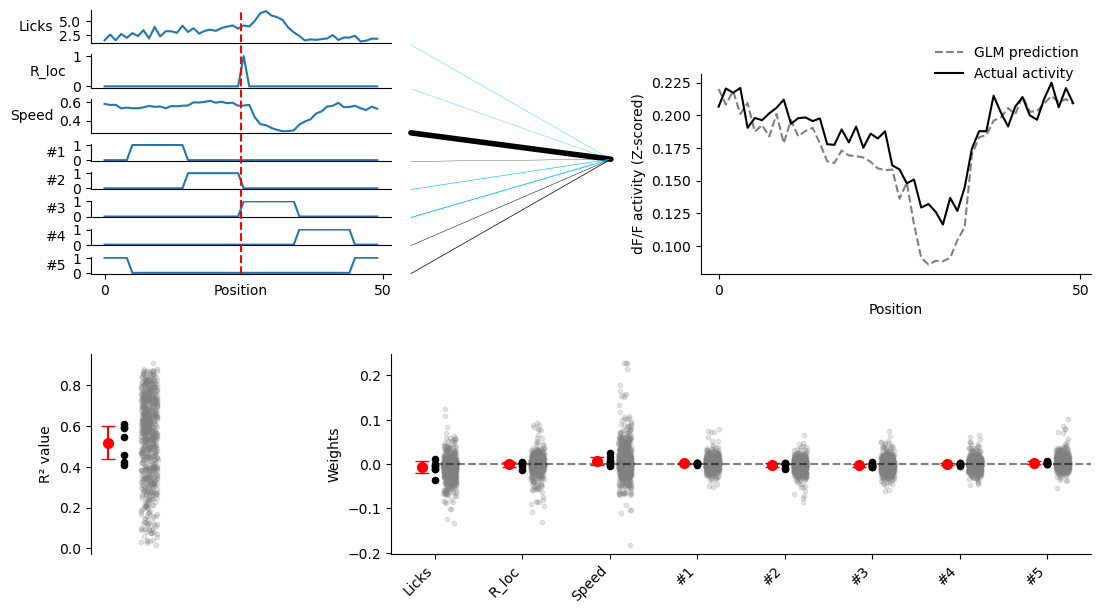

In [7]:
import mat73
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
from sklearn.linear_model import RidgeCV
%load_ext autoreload
%autoreload 2

from GLM_regression_MF import *

plt.rcParams.update({'font.size': 10,
                    'axes.spines.right': False,
                    'axes.spines.top':   False,
                    'legend.frameon':       False,})


# plt.rcParams.update({'font.size': 10,
#                     'axes.spines.right': False,
#                     'axes.spines.top':   False,
#                     'legend.frameon':       False,
#                     'font.sans-serif': 'Helvetica',
#                     'svg.fonttype': 'none'})

# filepath = "SSTindivsomata_GLM.mat"
# filepath = "NDNFindivsomata_GLM.mat"
filepath = "EC_GLM.mat"

reorganized_data, variable_list = load_data(filepath)
GLM_params = fit_GLM(reorganized_data, quintile=None, regression='ridge')

animal='animal_2'
plot_example_neuron(animal, reorganized_data, GLM_params, variable_list, neuron='best', model_name=filepath.split('.')[0])

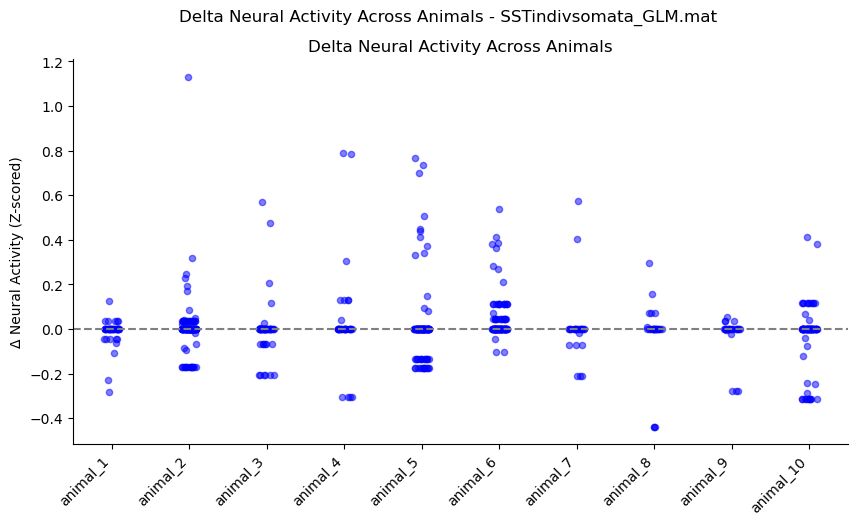

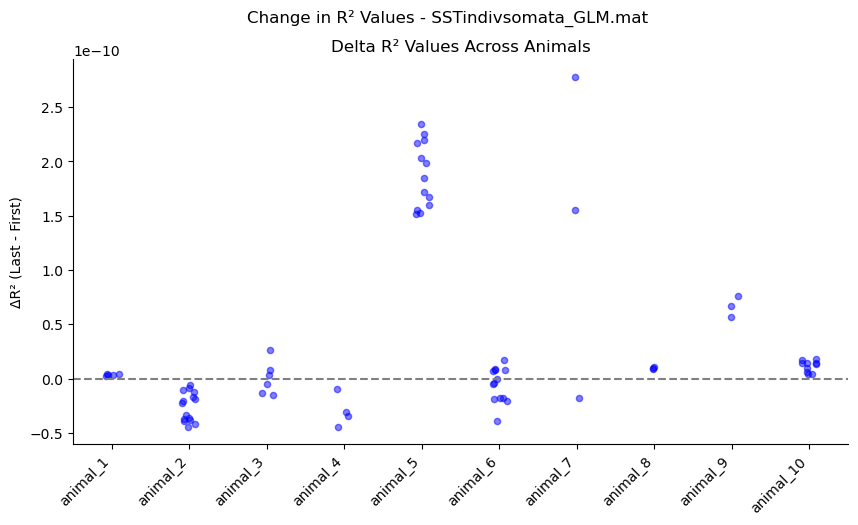

In [1]:
import mat73
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
from sklearn.linear_model import RidgeCV


from GLM_regression_MF import *

plt.rcParams.update({'font.size': 10,
                     'axes.spines.right': False,
                     'axes.spines.top': False,
                     'legend.frameon': False})


filepath = "SSTindivsomata_GLM.mat"
# filepath = "NDNFindivsomata_GLM.mat"
# filepath = "EC_GLM.mat"


reorganized_data, variable_list = load_data(filepath)

activity_comparison = compare_neural_activity(reorganized_data)
fig = plt.figure(figsize=(10, 5))
fig.suptitle(f'Delta Neural Activity Across Animals - {filepath}')
ax = fig.add_subplot(1, 1, 1)
plot_neural_activity_delta(activity_comparison, ax=ax)


GLM_params_comparison = fit_GLM_quintile_comparison(reorganized_data, regression='ridge')
fig = plt.figure(figsize=(10, 5))
fig.suptitle(f'Change in R² Values - {filepath}')
ax = fig.add_subplot(1, 1, 1)
plot_R2_delta(GLM_params_comparison, ax=ax)



plt.show()




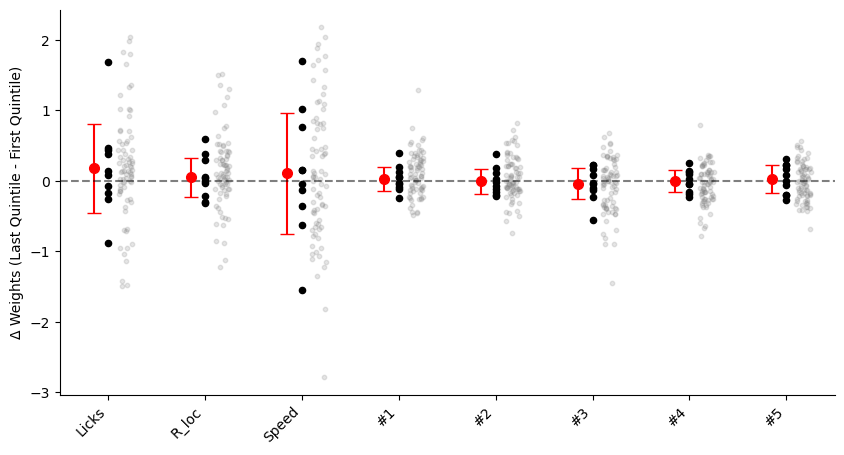

In [11]:
from GLM_regression import *

plt.rcParams.update({'font.size': 10,
                     'axes.spines.right': False,
                     'axes.spines.top': False,
                     'legend.frameon': False})


filepath = "SSTindivsomata_GLM.mat"
# filepath = "NDNFindivsomata_GLM.mat"
# filepath = "EC_GLM.mat"

filepath_list = ["SSTindivsomata_GLM.mat", "NDNFindivsomata_GLM.mat", "EC_GLM.mat"]

delta_weights = {}


for animal in reorganized_data:
    delta_weights[animal] = []
    for i in range(len(GLM_params_first[animal])):
        weights_first = GLM_params_first[animal][i]['weights']
        weights_last = GLM_params_last[animal][i]['weights']
        
        delta = weights_last - weights_first
        delta_weights[animal].append(delta)

    
def plot_delta_weights_summary(delta_weights, variable_list, model_name=None, save=False, ax=None):
    if ax is None:
        fig, ax = plt.subplots(1,1)

    animal_averages = []
    animal_stds = []
    jitter = 0.25

    for animal_key in delta_weights:
        neuron_weights = []
        for neuron_nr in range(len(delta_weights[animal_key])):
            neuron_weights.append(delta_weights[animal_key][neuron_nr])
            jittered_x = np.arange(len(variable_list)) + np.random.uniform(0.1, jitter, len(variable_list))
            ax.scatter(jittered_x, delta_weights[animal_key][neuron_nr], color='grey', alpha=0.2, s=10)
        
        neuron_weights = np.array(neuron_weights)
        mean_weights = np.mean(neuron_weights, axis=0)
        std_weights = np.std(neuron_weights, axis=0)
        animal_averages.append(mean_weights)
        animal_stds.append(std_weights)
        ax.scatter(range(len(variable_list)), mean_weights, color='black', label=f'Animal {animal_key}', s=20)

    animal_averages = np.array(animal_averages)
    animal_stds = np.array(animal_stds)

    global_mean = np.mean(animal_averages, axis=0)
    global_std = np.std(animal_averages, axis=0)
    ax.errorbar(np.arange(len(variable_list))-0.15, global_mean, yerr=global_std, fmt='o', color='red', ecolor='red', 
                capsize=5, label='Average of all animals', markersize=7)

    ax.set_xticks(range(len(variable_list)), variable_list, rotation=45, ha='right')
    ax.set_ylabel('Δ Weights (Last Quintile - First Quintile)')
    ax.hlines(0, -0.5, len(variable_list)-0.5, linestyles='--', color='black', alpha=0.5)
    ax.set_xlim([-0.5,len(variable_list)-0.5])

    if model_name is not None and save:
        fig.savefig(f"{model_name}_delta_weights.png", dpi=300)



fig, ax = plt.subplots(figsize=(10, 5))
plot_delta_weights_summary(delta_weights, variable_list[1:], model_name='SSTindivsomata_GLM', ax=ax)
plt.show()


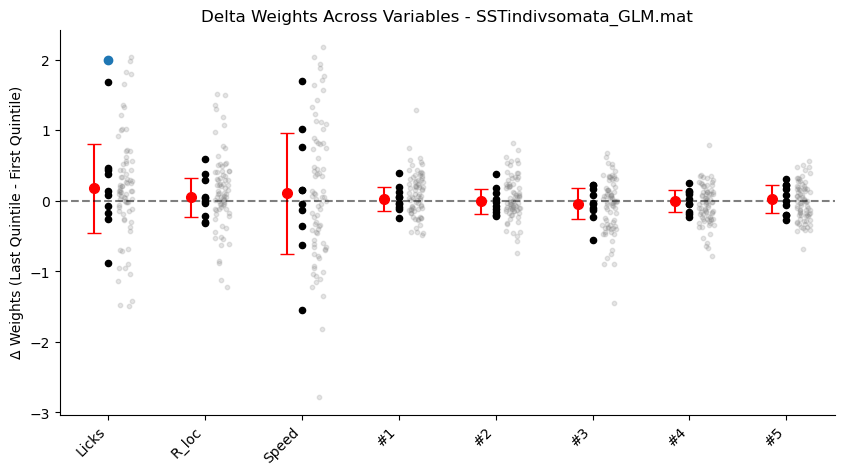

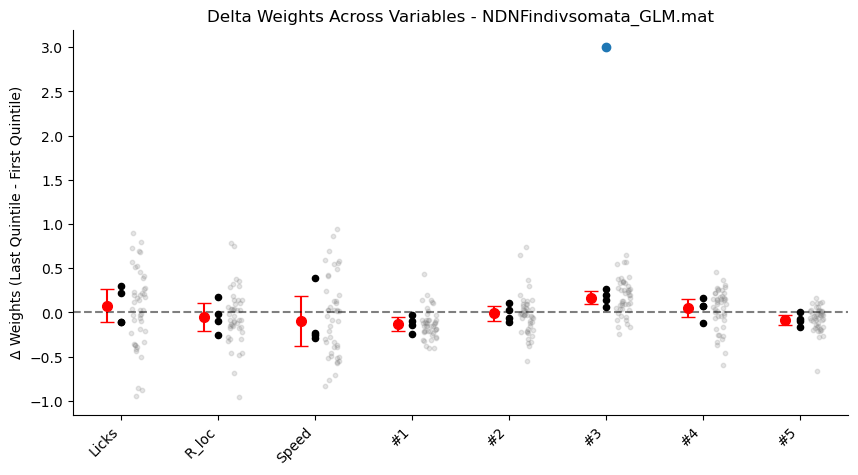

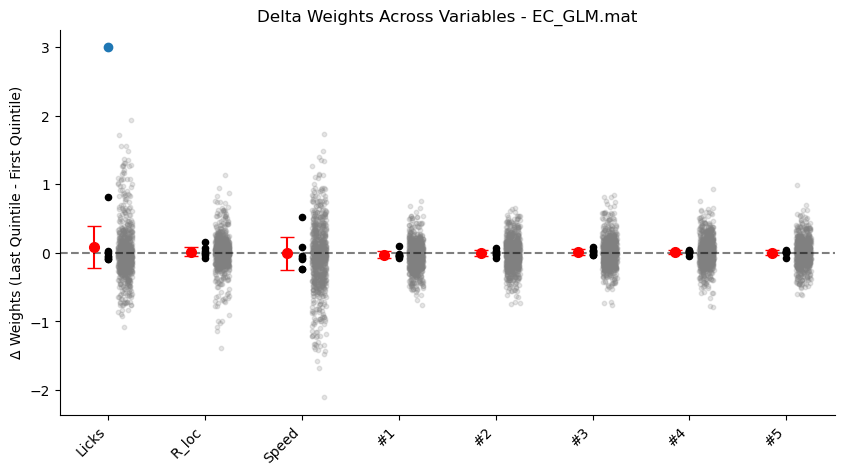

In [15]:
from GLM_regression import *

plt.rcParams.update({'font.size': 10,
                     'axes.spines.right': False,
                     'axes.spines.top': False,
                     'legend.frameon': False})

# List of filepaths to loop through
filepath_list = ["SSTindivsomata_GLM.mat", "NDNFindivsomata_GLM.mat", "EC_GLM.mat"]

for filepath in filepath_list:
    reorganized_data, variable_list = load_data(filepath)  # Load data for each dataset
    
    GLM_params_first = fit_GLM(reorganized_data, quintile=1, regression='ridge')
    GLM_params_last = fit_GLM(reorganized_data, quintile=5, regression='ridge')
    
    delta_weights = {}
    
    for animal in reorganized_data:
        delta_weights[animal] = []
        for i in range(len(GLM_params_first[animal])):
            weights_first = GLM_params_first[animal][i]['weights']
            weights_last = GLM_params_last[animal][i]['weights']
            
            delta = weights_last - weights_first
            delta_weights[animal].append(delta)
    
    def plot_delta_weights_summary(delta_weights, variable_list, model_name=None, save=False, ax=None):
        if ax is None:
            fig, ax = plt.subplots(1,1)

        animal_averages = []
        animal_stds = []
        jitter = 0.25

        for animal_key in delta_weights:
            neuron_weights = []
            for neuron_nr in range(len(delta_weights[animal_key])):
                neuron_weights.append(delta_weights[animal_key][neuron_nr])
                jittered_x = np.arange(len(variable_list)) + np.random.uniform(0.1, jitter, len(variable_list))
                ax.scatter(jittered_x, delta_weights[animal_key][neuron_nr], color='grey', alpha=0.2, s=10)

            neuron_weights = np.array(neuron_weights)
            mean_weights = np.mean(neuron_weights, axis=0)
            std_weights = np.std(neuron_weights, axis=0)
            animal_averages.append(mean_weights)
            animal_stds.append(std_weights)
            ax.scatter(range(len(variable_list)), mean_weights, color='black', label=f'Animal {animal_key}', s=20)

        animal_averages = np.array(animal_averages)
        animal_stds = np.array(animal_stds)

        global_mean = np.mean(animal_averages, axis=0)
        global_std = np.std(animal_averages, axis=0)
        ax.errorbar(np.arange(len(variable_list))-0.15, global_mean, yerr=global_std, fmt='o', color='red', ecolor='red', 
                    capsize=5, label='Average of all animals', markersize=7)

        absolute_distances = np.abs(global_mean)
        max_index = np.argmax(absolute_distances)
        second_max_index = np.argsort(absolute_distances)[-2]
        
        plt.scatter(max_index, second_max_index)
        
        ax.set_xticks(range(len(variable_list)), variable_list, rotation=45, ha='right')
        ax.set_ylabel('Δ Weights (Last Quintile - First Quintile)')
        ax.hlines(0, -0.5, len(variable_list)-0.5, linestyles='--', color='black', alpha=0.5)
        ax.set_xlim([-0.5,len(variable_list)-0.5])

        if model_name is not None and save:
            fig.savefig(f"{model_name}_delta_weights.png", dpi=300)

    # Plot and save the figure for the current dataset
    fig, ax = plt.subplots(figsize=(10, 5))
    plot_delta_weights_summary(delta_weights, variable_list[1:], model_name=filepath.split('.')[0], ax=ax)
    ax.set_title(f'Delta Weights Across Variables - {filepath}')
    plt.show()

    


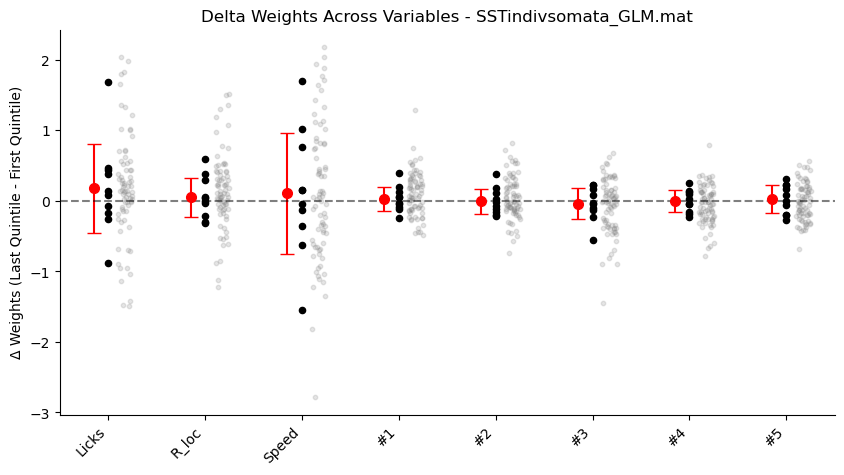

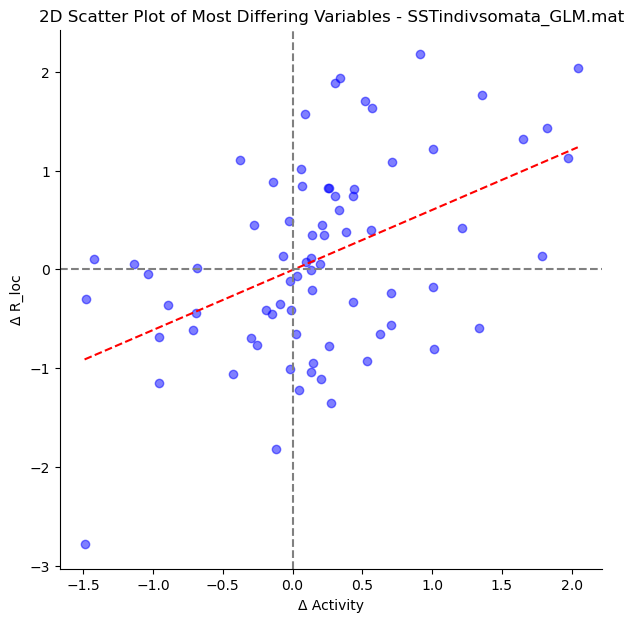

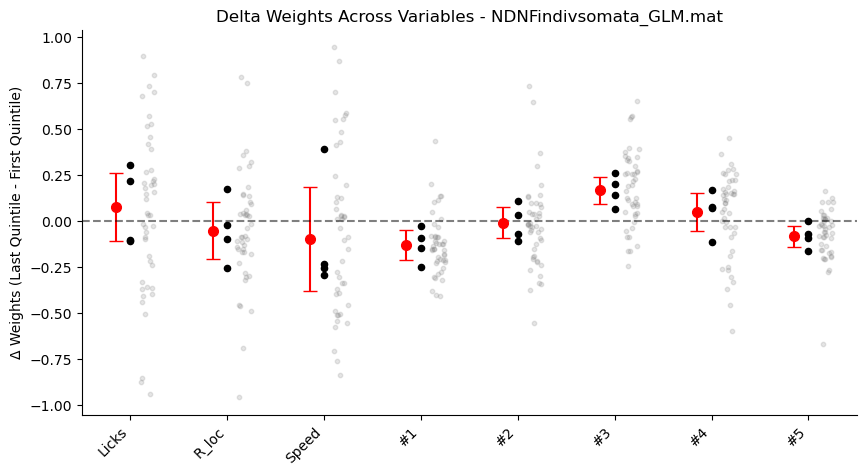

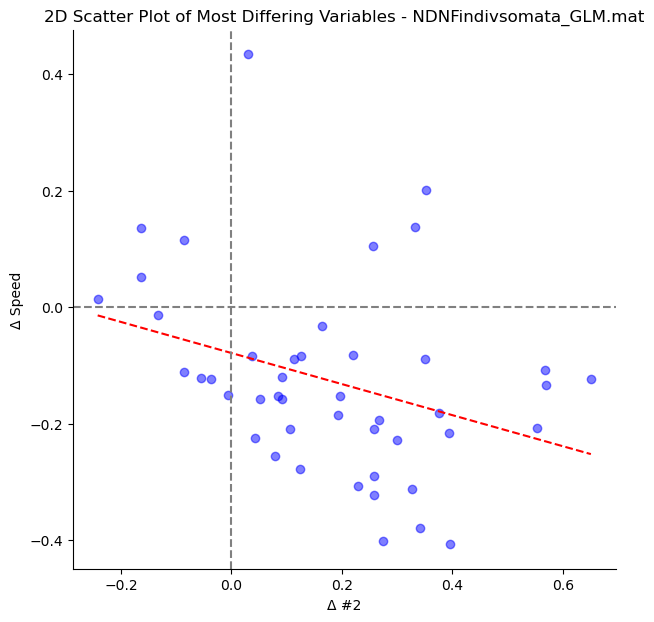

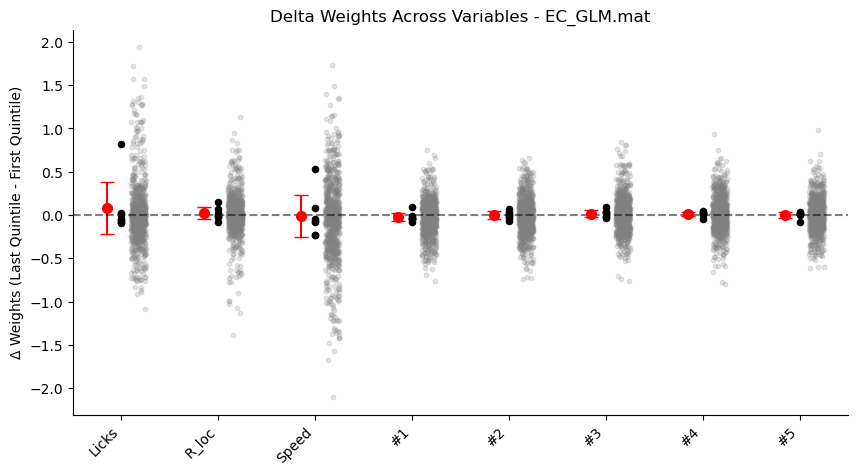

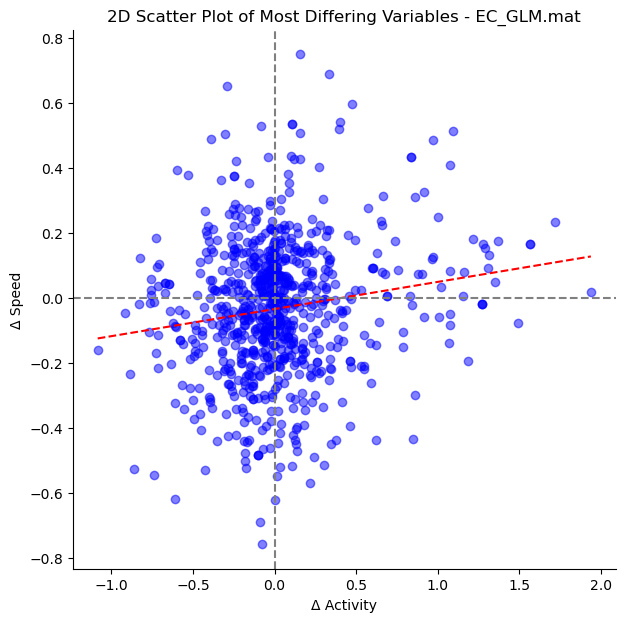

In [19]:
from GLM_regression import *
import numpy as np

plt.rcParams.update({'font.size': 10,
                     'axes.spines.right': False,
                     'axes.spines.top': False,
                     'legend.frameon': False})


filepath_list = ["SSTindivsomata_GLM.mat", "NDNFindivsomata_GLM.mat", "EC_GLM.mat"]

def plot_delta_weights_summary(delta_weights, variable_list, model_name=None, save=False, ax=None):
    if ax is None:
        fig, ax = plt.subplots(1,1)

    animal_averages = []
    animal_stds = []
    jitter = 0.25

    for animal_key in delta_weights:
        neuron_weights = []
        for neuron_nr in range(len(delta_weights[animal_key])):
            neuron_weights.append(delta_weights[animal_key][neuron_nr])
            jittered_x = np.arange(len(variable_list)) + np.random.uniform(0.1, jitter, len(variable_list))
            ax.scatter(jittered_x, delta_weights[animal_key][neuron_nr], color='grey', alpha=0.2, s=10)

        neuron_weights = np.array(neuron_weights)
        mean_weights = np.mean(neuron_weights, axis=0)
        std_weights = np.std(neuron_weights, axis=0)
        animal_averages.append(mean_weights)
        animal_stds.append(std_weights)
        ax.scatter(range(len(variable_list)), mean_weights, color='black', label=f'Animal {animal_key}', s=20)

    animal_averages = np.array(animal_averages)
    animal_stds = np.array(animal_stds)

    global_mean = np.mean(animal_averages, axis=0)
    global_std = np.std(animal_averages, axis=0)
    ax.errorbar(np.arange(len(variable_list))-0.15, global_mean, yerr=global_std, fmt='o', color='red', ecolor='red', 
                capsize=5, label='Average of all animals', markersize=7)

    absolute_distances = np.abs(global_mean)
    max_index = np.argmax(absolute_distances)
    second_max_index = np.argsort(absolute_distances)[-2]

    ax.set_xticks(range(len(variable_list)), variable_list, rotation=45, ha='right')
    ax.set_ylabel('Δ Weights (Last Quintile - First Quintile)')
    ax.hlines(0, -0.5, len(variable_list)-0.5, linestyles='--', color='black', alpha=0.5)
    ax.set_xlim([-0.5,len(variable_list)-0.5])

    if model_name is not None and save:
        fig.savefig(f"{model_name}_delta_weights.png", dpi=300)

    return max_index, second_max_index  # Return the indices of the two most differing variables

for filepath in filepath_list:
    reorganized_data, variable_list = load_data(filepath)  # Load data for each dataset
    
    GLM_params_first = fit_GLM(reorganized_data, quintile=1, regression='ridge')
    GLM_params_last = fit_GLM(reorganized_data, quintile=5, regression='ridge')
    
    delta_weights = {}
    
    for animal in reorganized_data:
        delta_weights[animal] = []
        for i in range(len(GLM_params_first[animal])):
            weights_first = GLM_params_first[animal][i]['weights']
            weights_last = GLM_params_last[animal][i]['weights']
            
            delta = weights_last - weights_first
            delta_weights[animal].append(delta)
    
    # Plot and save the figure for the current dataset
    fig, ax = plt.subplots(figsize=(10, 5))
    max_index, second_max_index = plot_delta_weights_summary(delta_weights, variable_list[1:], model_name=filepath.split('.')[0], ax=ax)
    ax.set_title(f'Delta Weights Across Variables - {filepath}')
    plt.show()

    fig, ax = plt.subplots(figsize=(7, 7))
    all_x_values = []
    all_y_values = []
    
    for animal_key in delta_weights:
        for neuron_nr in range(len(delta_weights[animal_key])):
            x_value = delta_weights[animal_key][neuron_nr][max_index]
            y_value = delta_weights[animal_key][neuron_nr][second_max_index]
            ax.scatter(x_value, y_value, color='blue', alpha=0.5)
            all_x_values.append(x_value)
            all_y_values.append(y_value)

    if len(all_x_values) > 1:  
        coefficients = np.polyfit(all_x_values, all_y_values, 1)
        polynomial = np.poly1d(coefficients)
        x_fit = np.linspace(min(all_x_values), max(all_x_values), 100)
        y_fit = polynomial(x_fit)
        ax.plot(x_fit, y_fit, color='red', linestyle='--')
    
    ax.set_xlabel(f"Δ {variable_list[max_index]}")
    ax.set_ylabel(f"Δ {variable_list[second_max_index]}")
    ax.axhline(0, color='gray', linestyle='--')
    ax.axvline(0, color='gray', linestyle='--')
    ax.set_title(f'2D Scatter Plot of Most Differing Variables - {filepath}')
    plt.show()



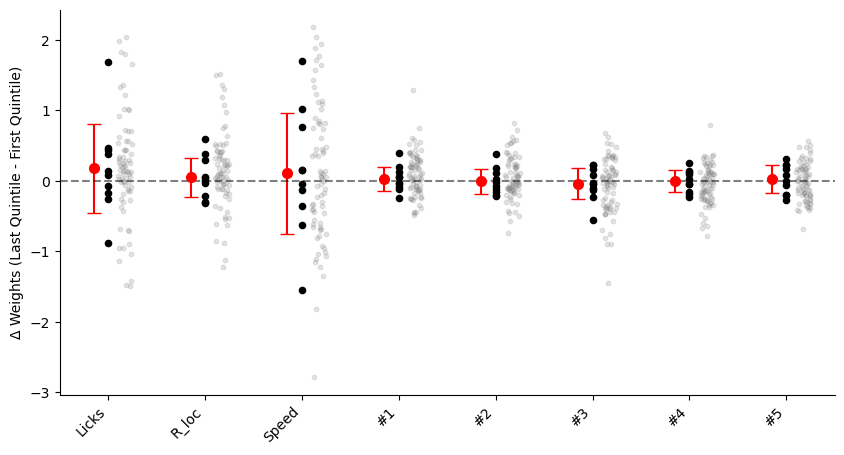

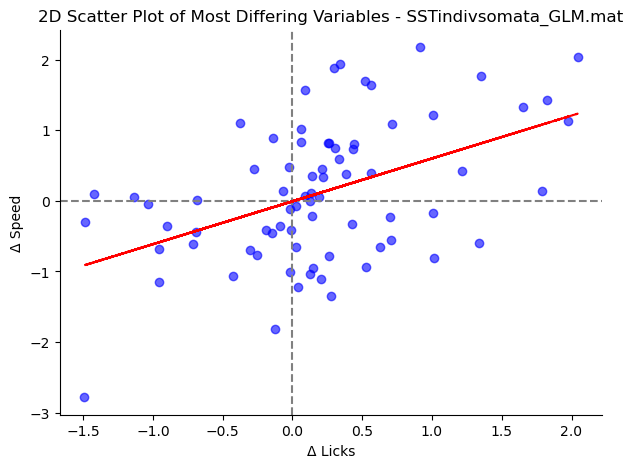

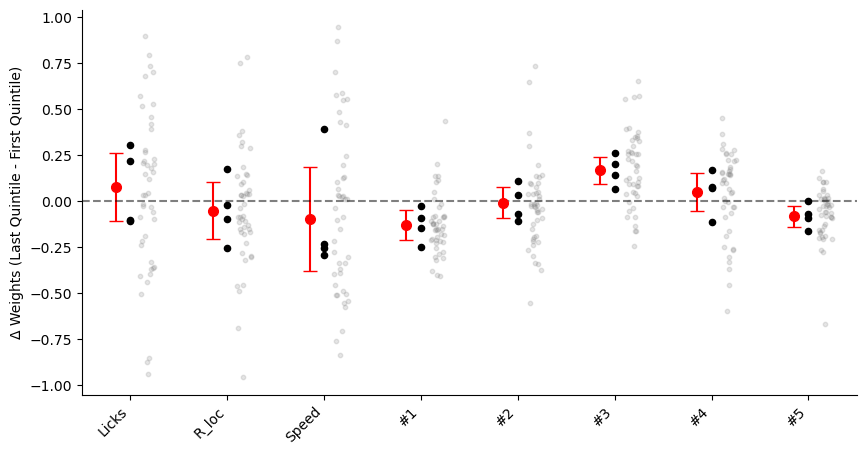

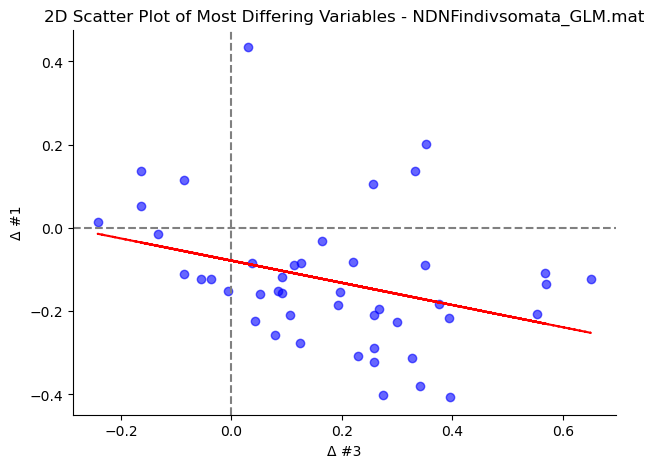

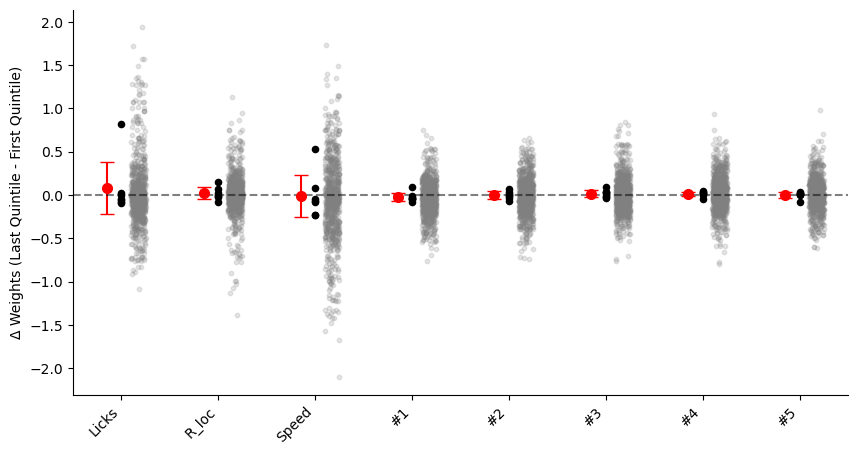

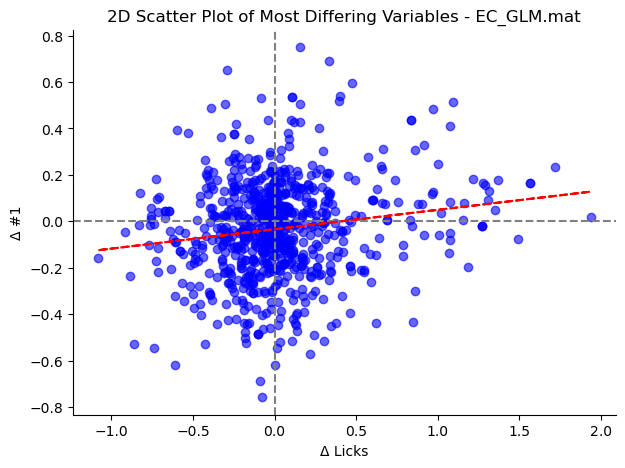

In [24]:
from GLM_regression import *
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 10,
                     'axes.spines.right': False,
                     'axes.spines.top': False,
                     'legend.frameon': False})


filepath_list = ["SSTindivsomata_GLM.mat", "NDNFindivsomata_GLM.mat", "EC_GLM.mat"]

def plot_delta_weights_summary(delta_weights, variable_list, model_name=None, save=False, ax=None):
    if ax is None:
        fig, ax = plt.subplots(1, 1)

    animal_averages = []
    jitter = 0.25

    for animal_key in delta_weights:
        neuron_weights = []
        for neuron_nr in range(len(delta_weights[animal_key])):
            neuron_weights.append(delta_weights[animal_key][neuron_nr])
            jittered_x = np.arange(len(variable_list)) + np.random.uniform(0.1, jitter, len(variable_list))
            ax.scatter(jittered_x, delta_weights[animal_key][neuron_nr], color='grey', alpha=0.2, s=10)

        neuron_weights = np.array(neuron_weights)
        mean_weights = np.mean(neuron_weights, axis=0)
        animal_averages.append(mean_weights)
        ax.scatter(range(len(variable_list)), mean_weights, color='black', label=f'Animal {animal_key}', s=20)

    animal_averages = np.array(animal_averages)
    global_mean = np.mean(animal_averages, axis=0)
    global_std = np.std(animal_averages, axis=0)
    global_sem = global_std / np.sqrt(len(animal_averages))
    ax.errorbar(np.arange(len(variable_list))-0.15, global_mean, yerr=global_std, fmt='o', color='red', ecolor='red', 
                capsize=5, label='Average of all animals', markersize=7)

    
    absolute_distances = np.abs(global_mean)
    max_index = np.argmax(absolute_distances)
    second_max_index = np.argsort(absolute_distances)[-2]

    ax.set_xticks(range(len(variable_list)), variable_list, rotation=45, ha='right')
    ax.set_ylabel('Δ Weights (Last Quintile - First Quintile)')
    ax.hlines(0, -0.5, len(variable_list)-0.5, linestyles='--', color='black', alpha=0.5)
    ax.set_xlim([-0.5, len(variable_list)-0.5])

    if model_name is not None and save:
        fig.savefig(f"{model_name}_delta_weights.png", dpi=300)

    return max_index, second_max_index

for filepath in filepath_list:
    reorganized_data, variable_list = load_data(filepath)  # Load data for each dataset
    
    GLM_params_first = fit_GLM(reorganized_data, quintile=1, regression='ridge')
    GLM_params_last = fit_GLM(reorganized_data, quintile=5, regression='ridge')
    
    delta_weights = {}
    
    for animal in reorganized_data:
        delta_weights[animal] = []
        for i in range(len(GLM_params_first[animal])):
            weights_first = GLM_params_first[animal][i]['weights']
            weights_last = GLM_params_last[animal][i]['weights']
            
            delta = weights_last - weights_first
            delta_weights[animal].append(delta)
    
    # Plot and save the figure for the current dataset
    fig, ax = plt.subplots(figsize=(10, 5))
    max_index, second_max_index = plot_delta_weights_summary(delta_weights, variable_list[1:], model_name=filepath.split('.')[0], ax=ax)

    # Prepare data for the 2D scatter plot of the most varying variables
    x_data = np.concatenate([np.array(delta_weights[animal])[:, max_index] for animal in delta_weights])
    y_data = np.concatenate([np.array(delta_weights[animal])[:, second_max_index] for animal in delta_weights])

    # Plot 2D scatter with best fit line
    fig, ax2 = plt.subplots(figsize=(7, 5))
    ax2.scatter(x_data, y_data, color='blue', alpha=0.6)
    ax2.set_xlabel(f"Δ {variable_list[1:][max_index]}")
    ax2.set_ylabel(f"Δ {variable_list[1:][second_max_index]}")
    ax2.axhline(0, color='gray', linestyle='--')
    ax2.axvline(0, color='gray', linestyle='--')

    # Add line of best fit
    m, b = np.polyfit(x_data, y_data, 1)
    ax2.plot(x_data, m*x_data + b, color='red', linestyle='--')
    ax2.set_title(f'2D Scatter Plot of Most Differing Variables - {filepath}')

    plt.show()



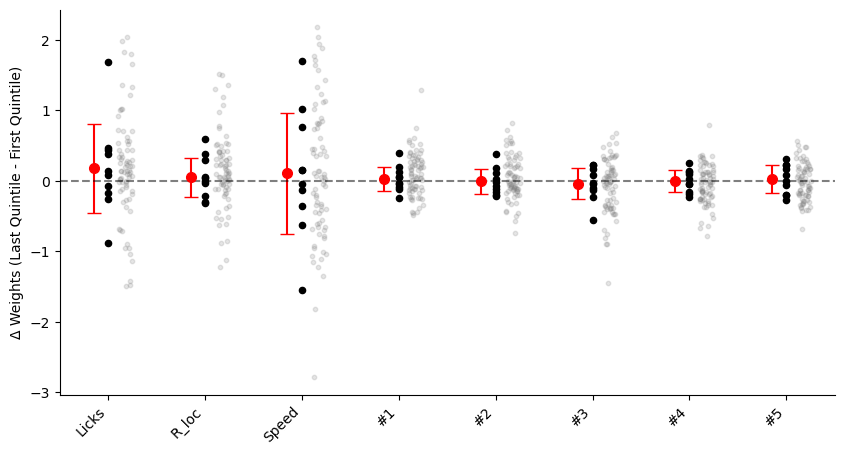

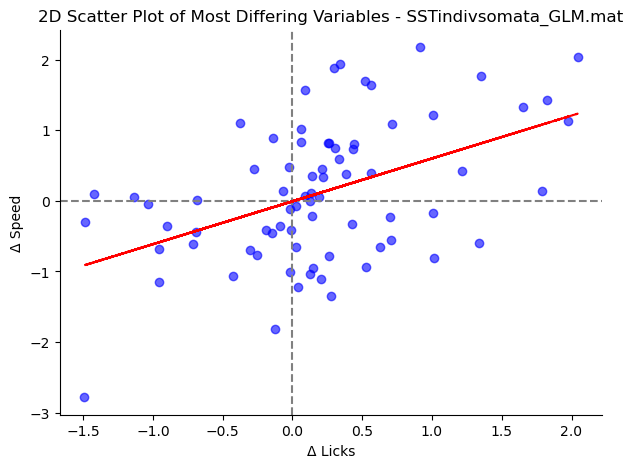

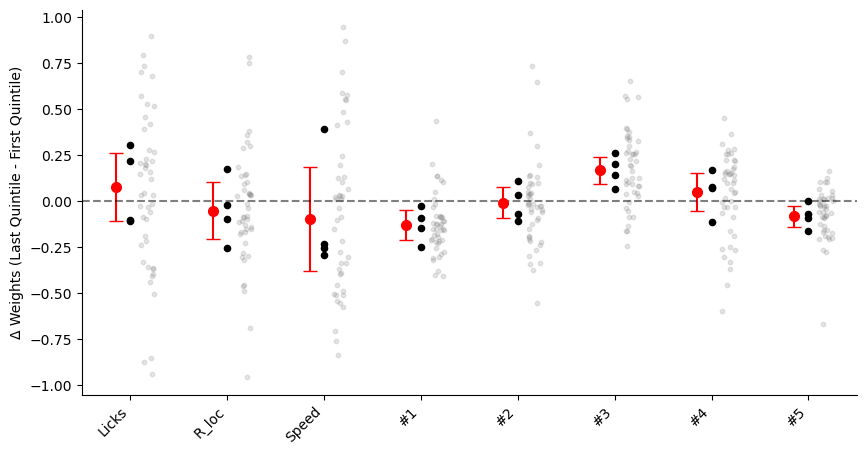

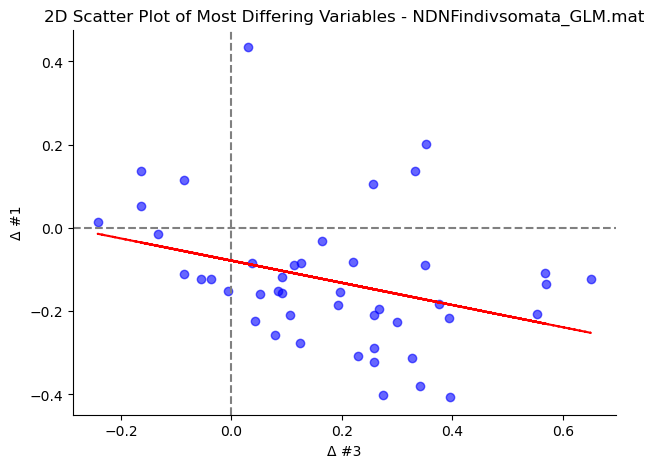

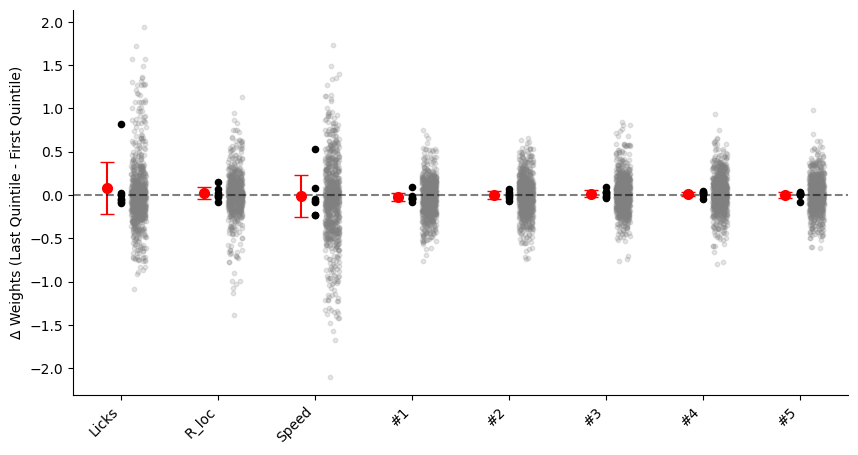

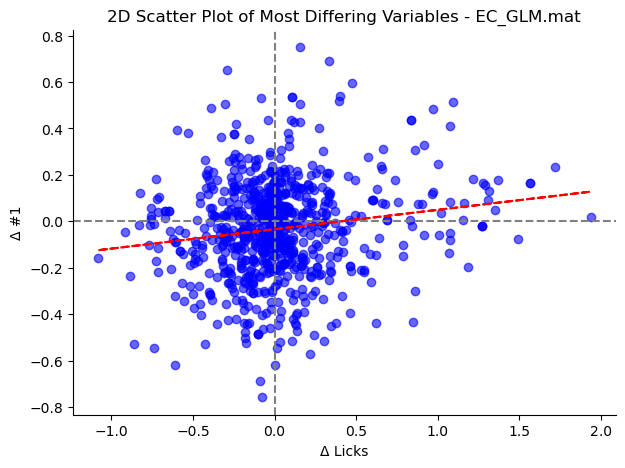

In [34]:
from GLM_regression import *
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 10,
                     'axes.spines.right': False,
                     'axes.spines.top': False,
                     'legend.frameon': False})


filepath_list = ["SSTindivsomata_GLM.mat", "NDNFindivsomata_GLM.mat", "EC_GLM.mat"]

def calculate_delta_weights(reorganized_data, GLM_params_first, GLM_params_last):
    delta_weights = {}

    for animal in reorganized_data:
        delta_weights[animal] = []
        for i in range(len(GLM_params_first[animal])):
            weights_first = GLM_params_first[animal][i]['weights']
            weights_last = GLM_params_last[animal][i]['weights']

            delta = weights_last - weights_first
            delta_weights[animal].append(delta)
    
    return delta_weights

def plot_delta_weights_summary(delta_weights, variable_list, model_name=None, save=False, ax=None):
    if ax is None:
        fig, ax = plt.subplots(1, 1)

    animal_averages = []
    jitter = 0.25

    for animal_key in delta_weights:
        neuron_weights = []
        for neuron_nr in range(len(delta_weights[animal_key])):
            neuron_weights.append(delta_weights[animal_key][neuron_nr])
            jittered_x = np.arange(len(variable_list)) + np.random.uniform(0.1, jitter, len(variable_list))
            ax.scatter(jittered_x, delta_weights[animal_key][neuron_nr], color='grey', alpha=0.2, s=10)

        neuron_weights = np.array(neuron_weights)
        mean_weights = np.mean(neuron_weights, axis=0)
        animal_averages.append(mean_weights)
        ax.scatter(range(len(variable_list)), mean_weights, color='black', label=f'Animal {animal_key}', s=20)

    animal_averages = np.array(animal_averages)
    global_mean = np.mean(animal_averages, axis=0)
    global_std = np.std(animal_averages, axis=0)
    global_sem = global_std / np.sqrt(len(animal_averages))
    ax.errorbar(np.arange(len(variable_list))-0.15, global_mean, yerr=global_std, fmt='o', color='red', ecolor='red', 
                capsize=5, label='Average of all animals', markersize=7)

    absolute_distances = np.abs(global_mean)
    max_index = np.argmax(absolute_distances)
    second_max_index = np.argsort(absolute_distances)[-2]

    ax.set_xticks(range(len(variable_list)), variable_list, rotation=45, ha='right')
    ax.set_ylabel('Δ Weights (Last Quintile - First Quintile)')
    ax.hlines(0, -0.5, len(variable_list)-0.5, linestyles='--', color='black', alpha=0.5)
    ax.set_xlim([-0.5, len(variable_list)-0.5])

    if model_name is not None and save:
        fig.savefig(f"{model_name}_delta_weights.png", dpi=300)

    return max_index, second_max_index

def get_delta_weights_and_plot(filepath_list):
    for filepath in filepath_list:
        reorganized_data, variable_list = load_data(filepath)  # Load data for each dataset

        GLM_params_first = fit_GLM(reorganized_data, quintile=1, regression='ridge')
        GLM_params_last = fit_GLM(reorganized_data, quintile=5, regression='ridge')

        delta_weights = calculate_delta_weights(reorganized_data, GLM_params_first, GLM_params_last)

        # Plot and save the figure for the current dataset
        fig, ax = plt.subplots(figsize=(10, 5))
        max_index, second_max_index = plot_delta_weights_summary(delta_weights, variable_list[1:], model_name=filepath.split('.')[0], ax=ax)

        # Prepare data for the 2D scatter plot of the most varying variables
        x_data = np.concatenate([np.array(delta_weights[animal])[:, max_index] for animal in delta_weights])
        y_data = np.concatenate([np.array(delta_weights[animal])[:, second_max_index] for animal in delta_weights])

        # Plot 2D scatter with best fit line
        fig, ax2 = plt.subplots(figsize=(7, 5))
        ax2.scatter(x_data, y_data, color='blue', alpha=0.6)
        ax2.set_xlabel(f"Δ {variable_list[1:][max_index]}")
        ax2.set_ylabel(f"Δ {variable_list[1:][second_max_index]}")
        ax2.axhline(0, color='gray', linestyle='--')
        ax2.axvline(0, color='gray', linestyle='--')

        # Add line of best fit
        m, b = np.polyfit(x_data, y_data, 1)
        ax2.plot(x_data, m*x_data + b, color='red', linestyle='--')
        ax2.set_title(f'2D Scatter Plot of Most Differing Variables - {filepath}')

        plt.show()

# Call the function to execute the workflow
get_delta_weights_and_plot(filepath_list)


Best neuron across all animals: 13
Animal with best neuron: animal_2
R2: 0.30246474098457954
pearson R2 overall: 0.30246492517111384
pearson R2 average: 0.9611549124994218


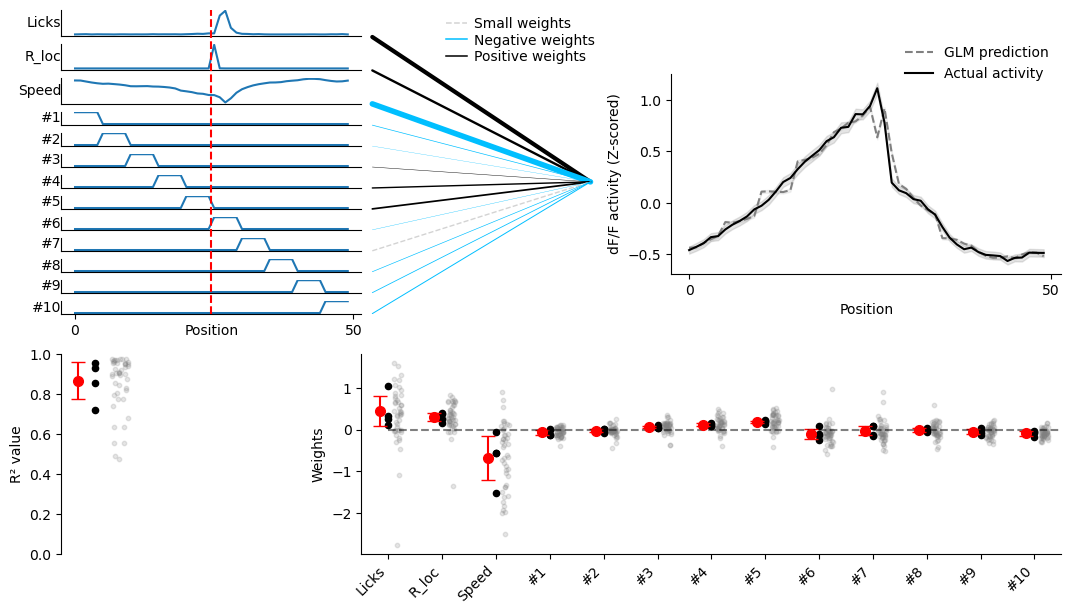

In [14]:
from GLM_regression import *
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 10,
                     'axes.spines.right': False,
                     'axes.spines.top': False,
                     'legend.frameon': False})


# filepath = "SSTindivsomata_GLM.mat"
filepath = "NDNFindivsomata_GLM.mat"

reorganized_data, variable_list = load_data(filepath)
GLM_params = fit_GLM(reorganized_data, quintile=None, regression='ridge', alphas=None)

def plot_example_neuron(reorganized_data, GLM_params, variable_list, neuron='best', animal='best', model_name=None):

    if animal == 'best':
        best_R2 = -np.inf
        best_neuron = None
        best_animal = None
        for animal_key in GLM_params:
            R2_values = [GLM_params[animal_key][i]['R2'] for i in GLM_params[animal_key]]
            max_R2 = max(R2_values)
            if max_R2 > best_R2:
                best_R2 = max_R2
                best_neuron = np.argmax(R2_values)
                best_animal = animal_key
        animal = best_animal
        neuron = best_neuron
        print(f"Best neuron across all animals: {neuron}")
        print(f"Animal with best neuron: {animal}")
        print(f"R2: {best_R2}")

    elif neuron == 'best':
        R2_values = [GLM_params[animal][i]['R2'] for i in GLM_params[animal]]
        neuron = np.argmax(R2_values)
        print(f"Best neuron within {animal}: {neuron}")
        print(f"R2: {GLM_params[animal][neuron]['R2']}")

    else:
        print(f"Selected neuron: {neuron}")
        print(f"Animal: {animal}")
        print(f"R2: {GLM_params[animal][neuron]['R2']}")

    weights = GLM_params[animal][neuron]['weights']
    
    neuron_data = reorganized_data[animal][neuron][:,:,1:]  
    neuron_data = neuron_data[:,:,~np.isnan(neuron_data).any(axis=(0,1))]

    flattened_data = []
    for i in range(neuron_data.shape[1]):
        if i == 0: # Z-score the neuron activity (df/f)
            neuron_data[:,i] = (neuron_data[:,i] - np.mean(neuron_data[:,i])) / np.std(neuron_data[:,i])
        else: # Normalize the other variables to [0,1]
            neuron_data[:,i] = (neuron_data[:,i] - np.min(neuron_data[:,i])) / (np.max(neuron_data[:,i]) - np.min(neuron_data[:,i]))
        flattened_data.append(neuron_data[:,i].flatten())
    flattened_data = np.stack(flattened_data, axis=1)
        
    input_variables = neuron_data[:,1:,:]
    neuron_activity = neuron_data[:,0 ,:]

    fig = plt.figure(figsize=(10,8))
    
    axes = gs.GridSpec(nrows=1, ncols=1, left=0, right=0.3, bottom=0.5)
    ax = fig.add_subplot(axes[0])
    ax.axis('off')
    avg_variables = np.mean(input_variables, axis=2)
    print(f"avg_variables shape: {avg_variables.shape}")
    plot_example_neuron_variables(avg_variables, variable_list, weights, ax=ax)


    axes = gs.GridSpec(nrows=1, ncols=1, left=0.3, right=0.54, bottom=0.5)
    ax = fig.add_subplot(axes[0])
    ax.axis('off')
    y1 = np.linspace(-0.54, -1.86, 3).tolist()
    y2 = np.linspace(-2.28, -6, 10).tolist()
    y = y1 + y2
    w_max = np.max(np.abs(weights))
    for i,w in enumerate(weights):
        if abs(w)<0.05:
            line, = ax.plot([0,1], [y[i],-3.4], color='lightgray', linestyle='--', linewidth=1)
        elif w < 0:
            line, = ax.plot([0,1], [y[i],-3.4], color='deepskyblue', linewidth=abs(w/w_max)*4)
        else:
            line, = ax.plot([0,1], [y[i],-3.4], color='black', linewidth=abs(w/w_max)*4)
        line.set_solid_capstyle('round')
    ax.set_ylim([-6,0])
    ax.plot([0,0], [0,0], color='lightgray', linewidth=1.1, linestyle='--', label='Small weights')
    ax.plot([0,0], [0,0], color='deepskyblue', linewidth=1.1, label='Negative weights')
    ax.plot([0,0], [0,0], color='black', linewidth=1.1, label='Positive weights')
    ax.legend(fontsize=10, loc='upper right', frameon=False, handlelength=1.5, handletextpad=0.5, labelspacing=0.2, borderpad=0)

    glm_model = GLM_params[animal][neuron]['model']
    flattened_input_variables = flattened_data[:,1:]
    predicted_activity = glm_model.predict(flattened_input_variables)

    pearson_R = np.corrcoef(predicted_activity, flattened_data[:,0])[0,1]
    print("pearson R2 overall:", pearson_R**2)

    predicted_activity = predicted_activity.reshape(neuron_activity.shape)
    avg_predicted_activity = np.mean(predicted_activity, axis=1)
    std_predicted_activity = np.std(predicted_activity, axis=1)
    sem_predicted_activity = std_predicted_activity / np.sqrt(predicted_activity.shape[1])
    avg_neuron_activity = np.mean(neuron_activity, axis=1)
    std_neuron_activity = np.std(neuron_activity, axis=1)
    sem_neuron_activity = std_neuron_activity / np.sqrt(neuron_activity.shape[1])

    pearson_R = np.corrcoef(avg_predicted_activity, avg_neuron_activity)[0,1]
    print("pearson R2 average:", pearson_R**2)

    axes = gs.GridSpec(nrows=1, ncols=1, left=0.61, right=1, top=0.8, bottom=0.55)
    ax = fig.add_subplot(axes[0])
    ax.plot(avg_predicted_activity, label='GLM prediction', c='gray', linestyle='--')
    ax.plot(avg_neuron_activity, label='Actual activity', c='k')
    ax.fill_between(np.arange(avg_neuron_activity.shape[0]), avg_neuron_activity-sem_neuron_activity, avg_neuron_activity+sem_neuron_activity, alpha=0.1, color='k')
    ax.fill_between(np.arange(avg_predicted_activity.shape[0]), avg_predicted_activity-sem_predicted_activity, avg_predicted_activity+sem_predicted_activity, alpha=0.1, color='gray')
    ax.set_xlabel("Position")
    ax.set_xticks([0,50])
    ax.set_ylabel("dF/F activity (Z-scored)")
    ax.legend(loc='upper right', bbox_to_anchor=(1, 1.2))

    axes = gs.GridSpec(nrows=1, ncols=1, top=0.45, bottom=0.2, left=0.3, right=1)
    ax = fig.add_subplot(axes[0])
    plot_GLM_summary_data(GLM_params, variable_list, ax=ax)

    axes = gs.GridSpec(nrows=1, ncols=1, top=0.45, bottom=0.2, left=0., right=0.2)
    ax = fig.add_subplot(axes[0])
    plot_R2_distribution(GLM_params, ax=ax)

    if model_name is not None:
        fig.savefig(f"figures/GLM_regression_{model_name}_{animal}_{neuron}.png", bbox_inches='tight', dpi=300)

plot_example_neuron = plot_example_neuron(reorganized_data, GLM_params, variable_list, neuron='best', animal='best', model_name=None)

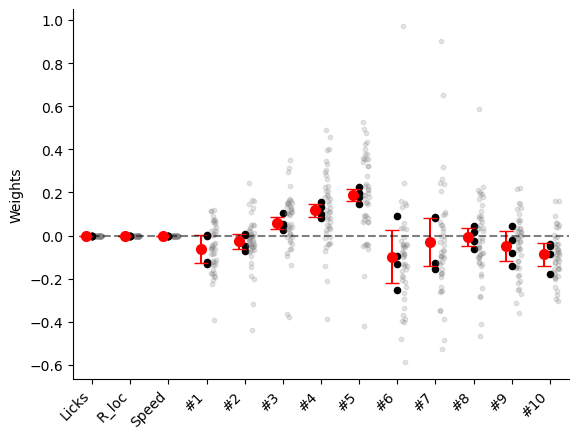

In [15]:
from GLM_regression_MF import *
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 10,
                     'axes.spines.right': False,
                     'axes.spines.top': False,
                     'legend.frameon': False})


# filepath = "SSTindivsomata_GLM.mat"
filepath = "NDNFindivsomata_GLM.mat"

reorganized_data, variable_list = load_data(filepath)
GLM_params = fit_GLM(reorganized_data, quintile=None, regression='ridge', alphas=None)

# remove anything thats not spatial information - want to only hand GLM spatial information 
zero_indices = [0, 1, 2]


def plot_GLM_summary_data(GLM_params, variable_list, zero_indices=zero_indices, ax=None):
    if ax is None:
        fig, ax = plt.subplots(1,1)

    animal_averages = []
    animal_stds = []
    jitter = 0.25

    for animal_key in GLM_params:
        neuron_weights = []
        for neuron_nr in range(len(GLM_params[animal_key])):
            weights = GLM_params[animal_key][neuron_nr]['weights']
            
            # Zero out specified weights
            #You pass a list of indices (e.g., [0, 2] to zero out the weights for the first and third variables).
            if zero_indices is not None:
                for index in zero_indices:
                    if index < len(weights):
                        weights[index] = 0.0
            
            neuron_weights.append(weights)
            jittered_x = np.arange(len(variable_list[1:])) + np.random.uniform(0.1, jitter, len(variable_list[1:]))
            ax.scatter(jittered_x, weights, color='grey', alpha=0.2, s=10)
        
        neuron_weights = np.array(neuron_weights)
        mean_weights = np.mean(neuron_weights, axis=0)
        std_weights = np.std(neuron_weights, axis=0)
        animal_averages.append(mean_weights)
        animal_stds.append(std_weights)
        ax.scatter(range(len(variable_list[1:])), mean_weights, color='black', label=f'Animal {animal_key}', s=20)

    animal_averages = np.array(animal_averages)
    animal_stds = np.array(animal_stds)

    global_mean = np.mean(animal_averages, axis=0)
    global_std = np.std(animal_averages, axis=0)
    ax.errorbar(np.arange(len(variable_list[1:]))-0.15, global_mean, yerr=global_std, fmt='o', color='red', ecolor='red', 
                capsize=5, label='Average of all animals', markersize=7)

    ax.set_xticks(range(len(variable_list[1:])), variable_list[1:], rotation=45, ha='right')
    ax.set_ylabel('Weights')
    ax.hlines(0, 0, len(variable_list[1:]), linestyles='--', color='black', alpha=0.5)
    ax.set_xlim([-0.5,len(variable_list[1:])-0.5])
    
    
plot_GLM_summary_data = plot_GLM_summary_data(GLM_params, variable_list, zero_indices=zero_indices, ax=None)

input_data shape(50, 13, 213)


AxisError: axis 1 is out of bounds for array of dimension 1

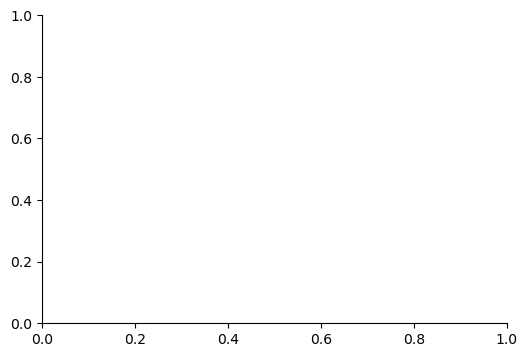

In [4]:
from GLM_regression import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs

plt.rcParams.update({'font.size': 10,
                     'axes.spines.right': False,
                     'axes.spines.top': False,
                     'legend.frameon': False})

filepath = "SSTindivsomata_GLM.mat"

# Load and fit the GLM model
reorganized_data, variable_list = load_data(filepath)
GLM_params = fit_GLM(reorganized_data, quintile=None, regression='ridge', alphas=None)

# Define zero-out indices (e.g., for Licks, R_loc, Speed)
zero_indices = [0]








def predict_with_zeroed_variables(GLM_params, reorganized_data, animal_key, neuron, zero_indices=None):
    weights = GLM_params[animal_key][neuron]['weights']
    intercept = GLM_params[animal_key][neuron]['intercept']

#have already created a generalized linear model and extract the weights and the intercept from it
#does it for the specific animal and neuron 
    
    
    # Prepare input data
    input_data = reorganized_data[animal_key][neuron]
    input_data = input_data[:, 1:, :]
    print(f"input_data shape{input_data.shape}")

#we want to train the GLM on 
#what if instead I just zeroed out variabled inside of this 
#### what is stopping me from just showing me different input data to test the model 


    if zero_indices is not None:
        for i in zero_indices:
            input_data[:, i, :] = 0  # Zero out specified variables

    # Remove any trials with NaNs before flattening
    valid_trials = ~np.isnan(input_data).any(axis=(1, 2))
    input_data = input_data[valid_trials]

    # Flatten input data and predict
    flattened_input = input_data.reshape(-1, input_data.shape[1])
    
    
# switch over to flattening the raw data and getting rid of raw data with nans in it 

    predicted_activity = np.dot(flattened_input, weights) + intercept
    predicted_activity = predicted_activity.reshape(input_data.shape[0], input_data.shape[2])

    return predicted_activity

# Create a new structure similar to GLM_params for storing predicted activity
def create_predicted_params_structure(GLM_params, reorganized_data, animal_key, neuron, predicted_activity):
    predicted_params = {}
    predicted_params[animal_key] = {}
    predicted_params[animal_key][neuron] = {
        'predicted_activity': predicted_activity,
        'weights': GLM_params[animal_key][neuron]['weights'],
        'intercept': GLM_params[animal_key][neuron]['intercept']
    }
    return predicted_params

# Predict activity with zeroed variables
animal_key = 'animal_1'
neuron = 1
predicted_activity = predict_with_zeroed_variables(GLM_params, reorganized_data, animal_key, neuron, zero_indices=zero_indices)

# Create the predicted params structure
predicted_params = create_predicted_params_structure(GLM_params, reorganized_data, animal_key, neuron, predicted_activity)


### the above would be the same thing as just calling glm params but with some variables x'd out 


# Modify plot_example_neuron to accept predicted_params
def plot_predicted_neuron(predicted_params, reorganized_data, variable_list, animal='best', neuron='best', model_name=None):
    animal_key = list(predicted_params.keys())[0]  # Assuming only one animal for simplicity
    neuron = list(predicted_params[animal_key].keys())[0]

    # Extract predicted activity
    predicted_activity = predicted_params[animal_key][neuron]['predicted_activity']

    # Prepare for plotting
    input_variables = reorganized_data[animal_key][neuron][:, 1:, :]
    neuron_activity = reorganized_data[animal_key][neuron][:, 0, :]

    # Plot prediction vs actual neuron activity
    fig, ax = plt.subplots(figsize=(6, 4))  # Adjusted size to be similar to the one in the image

    # Compute averages and standard errors
    avg_predicted_activity = np.mean(predicted_activity, axis=1)
    std_predicted_activity = np.std(predicted_activity, axis=1)
    sem_predicted_activity = std_predicted_activity / np.sqrt(predicted_activity.shape[1])
    neuron_activity = np.mean(neuron_activity, axis=1)
    std_neuron_activity = np.std(neuron_activity, axis=1)
    sem_neuron_activity = std_neuron_activity / np.sqrt(neuron_activity.shape[1])

    # Plot the data
    ax.plot(avg_predicted_activity, label='GLM prediction', c='gray', linestyle='--')
    ax.plot(avg_neuron_activity, label='Actual activity', c='k')
    ax.fill_between(np.arange(avg_neuron_activity.shape[0]), avg_neuron_activity - sem_neuron_activity,
                    avg_neuron_activity + sem_neuron_activity, alpha=0.1, color='k')
    ax.fill_between(np.arange(avg_predicted_activity.shape[0]), avg_predicted_activity - sem_predicted_activity,
                    avg_predicted_activity + sem_predicted_activity, alpha=0.1, color='gray')

    # Adjusting labels and aesthetics
    ax.set_xlabel("Position")
    ax.set_xticks([0, 50])  # Adjust as per your data
    ax.set_ylabel("dF/F activity (Z-scored)")
    ax.set_ylim([-1, 1])  # Adjust to match the plot in the image
    ax.legend(loc='upper right')

    plt.show()


# Plot the predicted neuron activity
plot_predicted_neuron(predicted_params, reorganized_data, variable_list, animal=animal_key, neuron=neuron)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Best neuron across all animals: 8
Animal with best neuron: animal_6
R2: 0.3767957795954673
pearson R2 overall: 0.37679581108752985
pearson R2 average: 0.9854873346065548


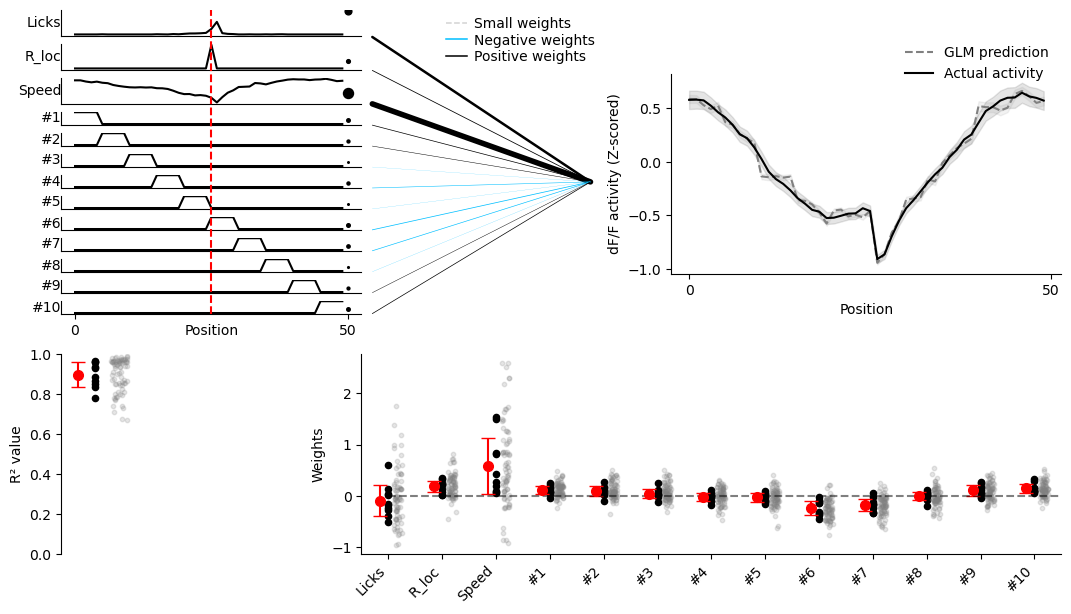

In [2]:
import mat73
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
from sklearn.linear_model import RidgeCV
%load_ext autoreload
%autoreload 2

from GLM_regression import *

plt.rcParams.update({'font.size': 10,
                    'axes.spines.right': False,
                    'axes.spines.top':   False,
                    'legend.frameon':       False,})

filepath = "SSTindivsomata_GLM.mat"
# filepath = "NDNFindivsomata_GLM.mat"
# filepath = "EC_GLM.mat"

reorganized_data, variable_list = load_data(filepath)
GLM_params = fit_GLM(reorganized_data, quintile=None, regression='ridge')

animal='animal_1'
plot_example_neuron = plot_example_neuron(reorganized_data, GLM_params, variable_list, neuron='best', animal='best', model_name=None)

In [1]:
from GLM_regression import *
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 10,
                     'axes.spines.right': False,
                     'axes.spines.top': False,
                     'legend.frameon': False})


# filepath = "SSTindivsomata_GLM.mat"
filepath = "NDNFindivsomata_GLM.mat"

reorganized_data, variable_list = load_data(filepath)
# GLM_params = fit_GLM(reorganized_data, quintile=None, regression='ridge', alphas=None)

# def plot_example_neuron(reorganized_data, GLM_params, variable_list, neuron='best', animal='best', model_name=None):
def plot_example_neuron(reorganized_data, variable_list, neuron='best', animal='best', model_name=None):

    if animal == 'best':
        best_R2 = -np.inf
        best_neuron = None
        best_animal = None
        for animal_key in GLM_params:
            R2_values = [GLM_params[animal_key][i]['R2'] for i in GLM_params[animal_key]]
            max_R2 = max(R2_values)
            if max_R2 > best_R2:
                best_R2 = max_R2
                best_neuron = np.argmax(R2_values)
                best_animal = animal_key
        animal = best_animal
        neuron = best_neuron
        print(f"Best neuron across all animals: {neuron}")
        print(f"Animal with best neuron: {animal}")
        print(f"R2: {best_R2}")

    elif neuron == 'best':
        R2_values = [GLM_params[animal][i]['R2'] for i in GLM_params[animal]]
        neuron = np.argmax(R2_values)
        print(f"Best neuron within {animal}: {neuron}")
        print(f"R2: {GLM_params[animal][neuron]['R2']}")

    else:
        print(f"Selected neuron: {neuron}")
        print(f"Animal: {animal}")
        print(f"R2: {GLM_params[animal][neuron]['R2']}")

    weights = GLM_params[animal][neuron]['weights']
    
    neuron_data = reorganized_data[animal][neuron][:,:,1:]  
    neuron_data = neuron_data[:,:,~np.isnan(neuron_data).any(axis=(0,1))]

#     input_variables = neuron_data[:,1:,:] #this code may become redundant 
    neuron_activity = neuron_data[:,0 ,:]

################################################################################## NEW 
# BE WARY THAT THIS IS HOW I AM TRAINING THE MODEL ON DIFFERENT INDICES 
    included_variables = np.arange(3, neuron_data.shape[1])
    neuron_data_filtered = neuron_data[:, included_variables, :]

    flattened_data_filtered = []
    for i in range(neuron_data_filtered.shape[1]):
        if i == 0: # Z-score the neuron activity (df/f)
            neuron_data_filtered[:,i] = (neuron_data_filtered[:,i] - np.mean(neuron_data_filtered[:,i])) / np.std(neuron_data_filtered[:,i])
        else: # Normalize the other variables to [0,1]
            neuron_data_filtered[:,i] = (neuron_data_filtered[:,i] - np.min(neuron_data_filtered[:,i])) / (np.max(neuron_data_filtered[:,i]) - np.min(neuron_data_filtered[:,i]))
        flattened_data_filtered.append(neuron_data_filtered[:,i].flatten())
    flattened_data_filtered = np.stack(flattened_data_filtered, axis=1)
    
    
    # Train GLM using filtered data- i was having errors because mismatch on 
    design_matrix_X = flattened_data_filtered[:, 1:]  # Use filtered variables
    neuron_activity = flattened_data_filtered[:, 0]  # Neuron activity as the dependent variable
    
    alphas = [0.1, 1, 10, 100, 1000, 5000]
    model = RidgeCV(alphas=alphas, cv=None)
    model.fit(design_matrix_X, neuron_activity)

    GLM_params[animal][neuron] = {
        'weights': model.coef_,
        'intercept': model.intercept_,
        'R2': model.score(design_matrix_X, neuron_activity),
        'model': model
    }

###################################################################################   
    
#     flattened_data = []
#     for i in range(neuron_data.shape[1]):
#         if i == 0: # Z-score the neuron activity (df/f)
#             neuron_data[:,i] = (neuron_data[:,i] - np.mean(neuron_data[:,i])) / np.std(neuron_data[:,i])
#         else: # Normalize the other variables to [0,1]
#             neuron_data[:,i] = (neuron_data[:,i] - np.min(neuron_data[:,i])) / (np.max(neuron_data[:,i]) - np.min(neuron_data[:,i]))
#         flattened_data.append(neuron_data[:,i].flatten())
#     flattened_data = np.stack(flattened_data, axis=1)
        
# #     input_variables = neuron_data[:,1:,:] #this code may become redundant 
#     neuron_activity = neuron_data[:,0 ,:]
#     neuron_data_filtered = neuron_data[:, included_indices, :]
    
    

    

    fig = plt.figure(figsize=(10,8))
    
    axes = gs.GridSpec(nrows=1, ncols=1, left=0, right=0.3, bottom=0.5)
    ax = fig.add_subplot(axes[0])
    ax.axis('off')
    avg_variables = np.mean(included_variables, axis=2)
    plot_example_neuron_variables(avg_variables, variable_list, ax=ax, weights=weights)


    axes = gs.GridSpec(nrows=1, ncols=1, left=0.3, right=0.54, bottom=0.5)
    ax = fig.add_subplot(axes[0])
    ax.axis('off')
    y1 = np.linspace(-0.54, -1.86, 3).tolist()
    y2 = np.linspace(-2.28, -6, 10).tolist()
    y = y1 + y2
    w_max = np.max(np.abs(weights))
    for i,w in enumerate(weights):
        if abs(w)<0.05:
            line, = ax.plot([0,1], [y[i],-3.4], color='lightgray', linestyle='--', linewidth=1)
        elif w < 0:
            line, = ax.plot([0,1], [y[i],-3.4], color='deepskyblue', linewidth=abs(w/w_max)*4)
        else:
            line, = ax.plot([0,1], [y[i],-3.4], color='black', linewidth=abs(w/w_max)*4)
        line.set_solid_capstyle('round')
    ax.set_ylim([-6,0])
    ax.plot([0,0], [0,0], color='lightgray', linewidth=1.1, linestyle='--', label='Small weights')
    ax.plot([0,0], [0,0], color='deepskyblue', linewidth=1.1, label='Negative weights')
    ax.plot([0,0], [0,0], color='black', linewidth=1.1, label='Positive weights')
    ax.legend(fontsize=10, loc='upper right', frameon=False, handlelength=1.5, handletextpad=0.5, labelspacing=0.2, borderpad=0)

    glm_model = GLM_params[animal][neuron]['model']
    flattened_input_variables = flattened_data_filtered[:,1:]
    predicted_activity = glm_model.predict(flattened_input_variables)

    pearson_R = np.corrcoef(predicted_activity, flattened_data_filtered[:,0])[0,1]
    print("pearson R2 overall:", pearson_R**2)

    predicted_activity = predicted_activity.reshape(neuron_activity.shape)
    avg_predicted_activity = np.mean(predicted_activity, axis=1)
    std_predicted_activity = np.std(predicted_activity, axis=1)
    sem_predicted_activity = std_predicted_activity / np.sqrt(predicted_activity.shape[1])
    avg_neuron_activity = np.mean(neuron_activity, axis=1)
    std_neuron_activity = np.std(neuron_activity, axis=1)
    sem_neuron_activity = std_neuron_activity / np.sqrt(neuron_activity.shape[1])

    pearson_R = np.corrcoef(avg_predicted_activity, avg_neuron_activity)[0,1]
    print("pearson R2 average:", pearson_R**2)

    axes = gs.GridSpec(nrows=1, ncols=1, left=0.61, right=1, top=0.8, bottom=0.55)
    ax = fig.add_subplot(axes[0])
    ax.plot(avg_predicted_activity, label='GLM prediction', c='gray', linestyle='--')
    ax.plot(avg_neuron_activity, label='Actual activity', c='k')
    ax.fill_between(np.arange(avg_neuron_activity.shape[0]), avg_neuron_activity-sem_neuron_activity, avg_neuron_activity+sem_neuron_activity, alpha=0.1, color='k')
    ax.fill_between(np.arange(avg_predicted_activity.shape[0]), avg_predicted_activity-sem_predicted_activity, avg_predicted_activity+sem_predicted_activity, alpha=0.1, color='gray')
    ax.set_xlabel("Position")
    ax.set_xticks([0,50])
    ax.set_ylabel("dF/F activity (Z-scored)")
    ax.legend(loc='upper right', bbox_to_anchor=(1, 1.2))

    axes = gs.GridSpec(nrows=1, ncols=1, top=0.45, bottom=0.2, left=0.3, right=1)
    ax = fig.add_subplot(axes[0])
    plot_GLM_summary_data(GLM_params, variable_list, ax=ax)

    axes = gs.GridSpec(nrows=1, ncols=1, top=0.45, bottom=0.2, left=0., right=0.2)
    ax = fig.add_subplot(axes[0])
    plot_R2_distribution(GLM_params, ax=ax)

    if model_name is not None:
        fig.savefig(f"figures/GLM_regression_{model_name}_{animal}_{neuron}.png", bbox_inches='tight', dpi=300)

plot_example_neuron = plot_example_neuron(reorganized_data, variable_list, neuron='best', animal='best', model_name=None)


# the problem with this code is that we have a mismatch in the number of variables vs the number of weights - i believe this 
# is becasue the number of weights was based on GLM params being handed in which i am not doing anymore but rather
# now it looks like I will be doing predicting a model within the plot example neuron now and therefore we no longer 
## have to hand one in 

NameError: name 'GLM_params' is not defined

 shape neuron_data_filtered (50, 10, 390)
weights shape: (10,)
pearson R2 overall: 0.007565317550125878
pearson R2 average: 0.21612695024578724


ValueError: x and y must be the same size

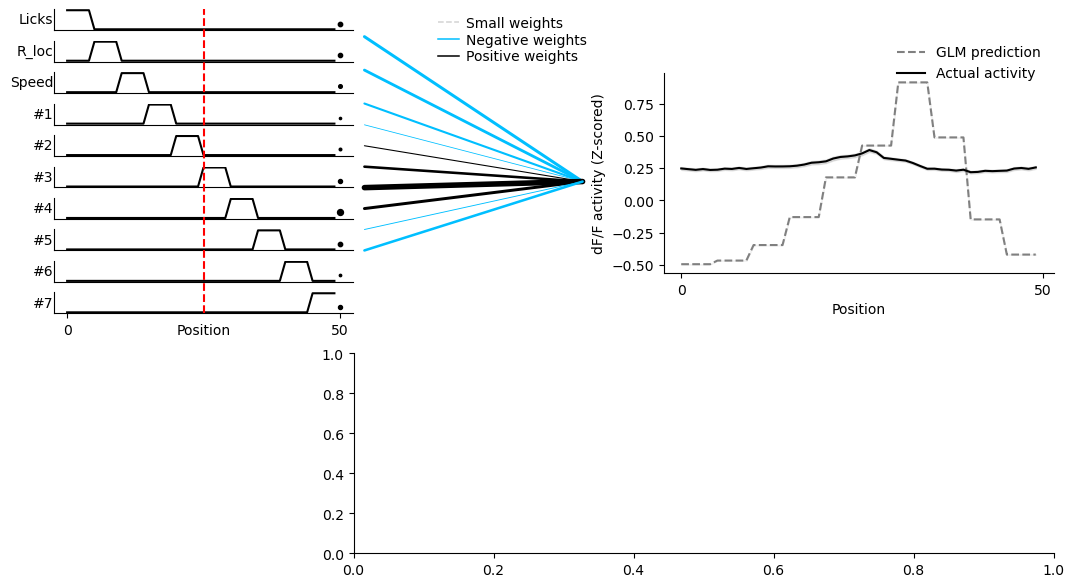

In [40]:
from GLM_regression import *
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 10,
                     'axes.spines.right': False,
                     'axes.spines.top': False,
                     'legend.frameon': False})


# filepath = "SSTindivsomata_GLM.mat"
filepath = "NDNFindivsomata_GLM.mat"

reorganized_data, variable_list = load_data(filepath)




def plot_example_neuron(reorganized_data, variable_list, neuron='best', animal='best', vars_to_remove=3, model_name=None):
    
    GLM_params = {}
    
    if animal == 'best' or neuron == 'best':
        best_R2 = -np.inf
        best_animal = None
        best_neuron = None
        for animal_key in reorganized_data:
            GLM_params[animal_key] = {} 
            for i, neuron_data in enumerate(reorganized_data[animal_key]):
                # Prepare data and train GLM
                neuron_data = reorganized_data[animal_key][i][:, :, 1:]
                neuron_data = neuron_data[:, :, ~np.isnan(neuron_data).any(axis=(0, 1))]
                
                
                def remove_variables(neuron_data, vars_to_remove):
                    all_data_excluding_activity_var = neuron_data[:, 1:, :]  # Removes the neuron activity
                    vars_to_exclude = np.arange(vars_to_remove, all_data_excluding_activity_var.shape[1])
                    neuron_data_filtered = all_data_excluding_activity_var[:, vars_to_exclude, :]
                    return neuron_data_filtered
                neuron_data_filtered = remove_variables(neuron_data, vars_to_remove)
                
            
#                 #z score the neuron activity (first variable)
#                 for j in range(neuron_data.shape[1]):
#                     if j == 0:  # Z-score neuron activity (df/f)
#                         neuron_data[:, j] = (neuron_data[:, j] - np.mean(neuron_data_filtered[:, j])) / np.std(neuron_data_filtered[:, j])
                
    
                #z scoring the neuron activity 
                neuron_activity = neuron_data[:, 0, :]  # This is the first variable
                neuron_activity_zscored = (neuron_activity - np.mean(neuron_activity)) / np.std(neuron_activity)
                
                flattened_data_filtered = []
                for j in range(neuron_data_filtered.shape[1]):
                    min_val = np.min(neuron_data_filtered[:, j])
                    max_val = np.max(neuron_data_filtered[:, j])
                    if max_val - min_val != 0:  # Avoid division by zero
                        neuron_data_filtered[:, j] = (neuron_data_filtered[:, j] - min_val) / (max_val - min_val)
                    flattened_data_filtered.append(neuron_data_filtered[:, j].flatten())
                
                flattened_data_filtered = np.stack(flattened_data_filtered, axis=1)
                
                # Combine Z-scored neuron activity with min-max normalized features
                flattened_data_filtered = np.column_stack((neuron_activity_zscored.flatten(), flattened_data_filtered))
                
                
                
                
                
                
                
                
                # Check for NaNs and remove rows with NaNs
                if np.isnan(flattened_data_filtered).any():
                    print("nans in flattened_data_filtered")
                    continue

                # Ensure that the design matrix has at least one feature
                if flattened_data_filtered.shape[1] <= 1:
                    print("No features available after preprocessing")
                    continue

                # Train GLM using filtered data
                design_matrix_X = flattened_data_filtered[:, 1:]  # Use filtered variables (skip the first column)
                neuron_activity_zscored_flattened = flattened_data_filtered[:, 0]  # Neuron activity as the dependent variable
                model = RidgeCV(alphas=[0.1, 1, 10, 100, 1000, 5000], cv=None)
                model.fit(design_matrix_X, neuron_activity_zscored_flattened)

                R2 = model.score(design_matrix_X, neuron_activity_zscored_flattened)
                GLM_params[animal_key][i] = {
                    'weights': model.coef_,
                    'intercept': model.intercept_,
                    'R2': model.score(design_matrix_X, neuron_activity_zscored_flattened),
                    'model': model
                }
                if R2 > best_R2:
                    best_R2 = R2
                    best_animal = animal_key
                    best_neuron = i

        animal = best_animal
        neuron = best_neuron
                    
        weights = GLM_params[animal][neuron]['weights']
        print(f" shape neuron_data_filtered {neuron_data_filtered.shape}")
        print(f"weights shape: {weights.shape}")   

        fig = plt.figure(figsize=(10,8))
        axes = gs.GridSpec(nrows=1, ncols=1, left=0, right=0.3, bottom=0.5)
        ax = fig.add_subplot(axes[0])
        ax.axis('off')

        # Calculate the average of the selected subset variables
        avg_variables = np.mean(neuron_data_filtered, axis=2)
        plot_example_neuron_variables(avg_variables, variable_list, ax=ax, weights=weights)

                
                
                
                
                
                


    
################### 


# # flatten and min max normalize the remiander of variables 
# #                 flattened_data_filtered = []
# #                 for j in range(neuron_data_filtered.shape[1]):
# #                     neuron_data_filtered[:, j] = (neuron_data_filtered[:, j] - np.min(neuron_data_filtered[:, j])) / (np.max(neuron_data_filtered[:, j]) - np.min(neuron_data_filtered[:, j]))
# #                 flattened_data_filtered.append(neuron_data_filtered[:, j].flatten())
# #                 flattened_data_filtered = np.stack(flattened_data_filtered, axis=1)

#                 # Check for NaNs and remove rows with NaNs
#                 if np.isnan(flattened_data_filtered).any():
#                     print("nans in flattened_data_filtered")
# #                 mask = ~np.isnan(flattened_data_filtered).any(axis=1)
# #                 flattened_data_filtered = flattened_data_filtered[mask, :]

#                 if flattened_data_filtered.shape[0] == 0:
#                      print("everything removed")
                    

#                 # Train GLM using filtered data
#                 design_matrix_X = flattened_data_filtered[:, 1:]  # Use filtered variables
#                 neuron_activity = flattened_data_filtered[:, 0]  # Neuron activity as the dependent variable
#                 model = RidgeCV(alphas=[0.1, 1, 10, 100, 1000, 5000], cv=None)
#                 model.fit(design_matrix_X, neuron_activity)

#                 R2 = model.score(design_matrix_X, neuron_activity)
#                 GLM_params[animal_key][i] = {
#                     'weights': model.coef_,
#                     'intercept': model.intercept_,
#                     'R2': model.score(design_matrix_X, neuron_activity),
#                     'model': model
#                 }
#                 if R2 > best_R2:
#                     best_R2 = R2
#                     best_animal = animal_key
#                     best_neuron = i

#         animal = best_animal
#         neuron = best_neuron
                    
#         weights = GLM_params[animal][neuron]['weights']
   

#     print(f" shape neuron_data_filtered {neuron_data_filtered.shape}")
#     print(f"weights shape: {weights.shape}")   
    
#     fig = plt.figure(figsize=(10,8))

#     axes = gs.GridSpec(nrows=1, ncols=1, left=0, right=0.3, bottom=0.5)
#     ax = fig.add_subplot(axes[0])
#     ax.axis('off')


# #     # Define which variables you want to include, for example, the first 5 variables
# #     included_variable_indices = np.arange(3)  # This selects the first 5 variables

# #     # Subset the input_variables using the defined indices
# #     input_variables_subset = input_variables[:, included_variable_indices, :]

#     # Now calculate the average of these subset variables
#     avg_variables = np.mean(neuron_data_filtered, axis=2)

    
    
# #     avg_variables = np.mean(included_variables, axis=2)
#     plot_example_neuron_variables(avg_variables, variable_list, ax=ax, weights=weights)

############################
    
    
    
    
    
    
    
    
    axes = gs.GridSpec(nrows=1, ncols=1, left=0.3, right=0.54, bottom=0.5)
    ax = fig.add_subplot(axes[0])
    ax.axis('off')
    y1 = np.linspace(-0.54, -1.86, 3).tolist()
    y2 = np.linspace(-2.28, -6, 10).tolist()
    y = y1 + y2
    w_max = np.max(np.abs(weights))
    for i,w in enumerate(weights):
        if abs(w)<0.05:
            line, = ax.plot([0,1], [y[i],-3.4], color='lightgray', linestyle='--', linewidth=1)
        elif w < 0:
            line, = ax.plot([0,1], [y[i],-3.4], color='deepskyblue', linewidth=abs(w/w_max)*4)
        else:
            line, = ax.plot([0,1], [y[i],-3.4], color='black', linewidth=abs(w/w_max)*4)
        line.set_solid_capstyle('round')
    ax.set_ylim([-6,0])
    ax.plot([0,0], [0,0], color='lightgray', linewidth=1.1, linestyle='--', label='Small weights')
    ax.plot([0,0], [0,0], color='deepskyblue', linewidth=1.1, label='Negative weights')
    ax.plot([0,0], [0,0], color='black', linewidth=1.1, label='Positive weights')
    ax.legend(fontsize=10, loc='upper right', frameon=False, handlelength=1.5, handletextpad=0.5, labelspacing=0.2, borderpad=0)

    glm_model = GLM_params[animal][neuron]['model']
    flattened_input_variables = flattened_data_filtered[:,1:]
    predicted_activity = glm_model.predict(flattened_input_variables)

    pearson_R = np.corrcoef(predicted_activity, flattened_data_filtered[:,0])[0,1]
    print("pearson R2 overall:", pearson_R**2)

    predicted_activity = predicted_activity.reshape(neuron_activity.shape)
    avg_predicted_activity = np.mean(predicted_activity, axis=1)
    std_predicted_activity = np.std(predicted_activity, axis=1)
    sem_predicted_activity = std_predicted_activity / np.sqrt(predicted_activity.shape[1])
    avg_neuron_activity = np.mean(neuron_activity, axis=1)
    std_neuron_activity = np.std(neuron_activity, axis=1)
    sem_neuron_activity = std_neuron_activity / np.sqrt(neuron_activity.shape[1])

    pearson_R = np.corrcoef(avg_predicted_activity, avg_neuron_activity)[0,1]
    print("pearson R2 average:", pearson_R**2)

    axes = gs.GridSpec(nrows=1, ncols=1, left=0.61, right=1, top=0.8, bottom=0.55)
    ax = fig.add_subplot(axes[0])
    ax.plot(avg_predicted_activity, label='GLM prediction', c='gray', linestyle='--')
    ax.plot(avg_neuron_activity, label='Actual activity', c='k')
    ax.fill_between(np.arange(avg_neuron_activity.shape[0]), avg_neuron_activity-sem_neuron_activity, avg_neuron_activity+sem_neuron_activity, alpha=0.1, color='k')
    ax.fill_between(np.arange(avg_predicted_activity.shape[0]), avg_predicted_activity-sem_predicted_activity, avg_predicted_activity+sem_predicted_activity, alpha=0.1, color='gray')
    ax.set_xlabel("Position")
    ax.set_xticks([0,50])
    ax.set_ylabel("dF/F activity (Z-scored)")
    ax.legend(loc='upper right', bbox_to_anchor=(1, 1.2))

    axes = gs.GridSpec(nrows=1, ncols=1, top=0.45, bottom=0.2, left=0.3, right=1)
    ax = fig.add_subplot(axes[0])
    plot_GLM_summary_data(GLM_params, variable_list, ax=ax)

    axes = gs.GridSpec(nrows=1, ncols=1, top=0.45, bottom=0.2, left=0., right=0.2)
    ax = fig.add_subplot(axes[0])
    plot_R2_distribution(GLM_params, ax=ax)

    if model_name is not None:
        fig.savefig(f"figures/GLM_regression_{model_name}_{animal}_{neuron}.png", bbox_inches='tight', dpi=300)
                    

plot_example_neuron(reorganized_data, variable_list, neuron='best', animal='best', model_name=None)            
                    
                    
                    
                    
                    
 # x and y anre not the same size for making a scattter plot of weights against variable indices                    
                    
                    
                    
                    
                    
                    
                    
                    
                    
                    
                    
                    
                    
                    
                    
                    
                    
                    
                    
                    
                    
                    
                    
                    
                    
                    
                    
                    
                    

#         print(f"Best neuron across all animals: {neuron}")
#         print(f"Animal with best neuron: {animal}")
#         print(f"R2: {best_R2}")

    # Add your plotting code here using `animal` and `neuron` variables
    # ...
     
#     neuron_data = reorganized_data[animal][neuron][:,:,1:]  
#     neuron_data = neuron_data[:,:,~np.isnan(neuron_data).any(axis=(0,1))]

# #     input_variables = neuron_data[:,1:,:] #this code may become redundant 
#     neuron_activity = neuron_data[:,0 ,:]

# ################################################################################## NEW 
# BE WARY THAT THIS IS HOW I AM TRAINING THE MODEL ON DIFFERENT INDICES 
#     included_variables = np.arange(3, neuron_data.shape[1])
#     neuron_data_filtered = neuron_data[:, included_variables, :]

#     flattened_data_filtered = []
#     for i in range(neuron_data_filtered.shape[1]):
#         if i == 0: # Z-score the neuron activity (df/f)
#             neuron_data_filtered[:,i] = (neuron_data_filtered[:,i] - np.mean(neuron_data_filtered[:,i])) / np.std(neuron_data_filtered[:,i])
#         else: # Normalize the other variables to [0,1]
#             neuron_data_filtered[:,i] = (neuron_data_filtered[:,i] - np.min(neuron_data_filtered[:,i])) / (np.max(neuron_data_filtered[:,i]) - np.min(neuron_data_filtered[:,i]))
#         flattened_data_filtered.append(neuron_data_filtered[:,i].flatten())
#     flattened_data_filtered = np.stack(flattened_data_filtered, axis=1)
    
    
#     # Train GLM using filtered data- i was having errors because mismatch on 
#     design_matrix_X = flattened_data_filtered[:, 1:]  # Use filtered variables
#     neuron_activity = flattened_data_filtered[:, 0]  # Neuron activity as the dependent variable
    
#     alphas = [0.1, 1, 10, 100, 1000, 5000]
#     model = RidgeCV(alphas=alphas, cv=None)
#     model.fit(design_matrix_X, neuron_activity)

#     GLM_params[animal][neuron] = {
#         'weights': model.coef_,
#         'intercept': model.intercept_,
#         'R2': model.score(design_matrix_X, neuron_activity),
#         'model': model
#     }

# ###################################################################################   
    
# #     flattened_data = []
# #     for i in range(neuron_data.shape[1]):
# #         if i == 0: # Z-score the neuron activity (df/f)
# #             neuron_data[:,i] = (neuron_data[:,i] - np.mean(neuron_data[:,i])) / np.std(neuron_data[:,i])
# #         else: # Normalize the other variables to [0,1]
# #             neuron_data[:,i] = (neuron_data[:,i] - np.min(neuron_data[:,i])) / (np.max(neuron_data[:,i]) - np.min(neuron_data[:,i]))
# #         flattened_data.append(neuron_data[:,i].flatten())
# #     flattened_data = np.stack(flattened_data, axis=1)
        
# # #     input_variables = neuron_data[:,1:,:] #this code may become redundant 
# #     neuron_activity = neuron_data[:,0 ,:]
# #     neuron_data_filtered = neuron_data[:, included_indices, :]
    
    

#     if animal == 'best':
#         best_R2 = -np.inf
#         best_neuron = None
#         best_animal = None
#         for animal_key in GLM_params:
#             R2_values = [GLM_params[animal_key][i]['R2'] for i in GLM_params[animal_key]]
#             max_R2 = max(R2_values)
#             if max_R2 > best_R2:
#                 best_R2 = max_R2
#                 best_neuron = np.argmax(R2_values)
#                 best_animal = animal_key
#         animal = best_animal
#         neuron = best_neuron
#         print(f"Best neuron across all animals: {neuron}")
#         print(f"Animal with best neuron: {animal}")
#         print(f"R2: {best_R2}")

#     elif neuron == 'best':
#         R2_values = [GLM_params[animal][i]['R2'] for i in GLM_params[animal]]
#         neuron = np.argmax(R2_values)
#         print(f"Best neuron within {animal}: {neuron}")
#         print(f"R2: {GLM_params[animal][neuron]['R2']}")

#     else:
#         print(f"Selected neuron: {neuron}")
#         print(f"Animal: {animal}")
#         print(f"R2: {GLM_params[animal][neuron]['R2']}")

#     weights = GLM_params[animal][neuron]['weights']

#     fig = plt.figure(figsize=(10,8))

#     axes = gs.GridSpec(nrows=1, ncols=1, left=0, right=0.3, bottom=0.5)
#     ax = fig.add_subplot(axes[0])
#     ax.axis('off')
#     avg_variables = np.mean(included_variables, axis=2)
#     plot_example_neuron_variables(avg_variables, variable_list, ax=ax, weights=weights)


#     axes = gs.GridSpec(nrows=1, ncols=1, left=0.3, right=0.54, bottom=0.5)
#     ax = fig.add_subplot(axes[0])
#     ax.axis('off')
#     y1 = np.linspace(-0.54, -1.86, 3).tolist()
#     y2 = np.linspace(-2.28, -6, 10).tolist()
#     y = y1 + y2
#     w_max = np.max(np.abs(weights))
#     for i,w in enumerate(weights):
#         if abs(w)<0.05:
#             line, = ax.plot([0,1], [y[i],-3.4], color='lightgray', linestyle='--', linewidth=1)
#         elif w < 0:
#             line, = ax.plot([0,1], [y[i],-3.4], color='deepskyblue', linewidth=abs(w/w_max)*4)
#         else:
#             line, = ax.plot([0,1], [y[i],-3.4], color='black', linewidth=abs(w/w_max)*4)
#         line.set_solid_capstyle('round')
#     ax.set_ylim([-6,0])
#     ax.plot([0,0], [0,0], color='lightgray', linewidth=1.1, linestyle='--', label='Small weights')
#     ax.plot([0,0], [0,0], color='deepskyblue', linewidth=1.1, label='Negative weights')
#     ax.plot([0,0], [0,0], color='black', linewidth=1.1, label='Positive weights')
#     ax.legend(fontsize=10, loc='upper right', frameon=False, handlelength=1.5, handletextpad=0.5, labelspacing=0.2, borderpad=0)

#     glm_model = GLM_params[animal][neuron]['model']
#     flattened_input_variables = flattened_data_filtered[:,1:]
#     predicted_activity = glm_model.predict(flattened_input_variables)

#     pearson_R = np.corrcoef(predicted_activity, flattened_data_filtered[:,0])[0,1]
#     print("pearson R2 overall:", pearson_R**2)

#     predicted_activity = predicted_activity.reshape(neuron_activity.shape)
#     avg_predicted_activity = np.mean(predicted_activity, axis=1)
#     std_predicted_activity = np.std(predicted_activity, axis=1)
#     sem_predicted_activity = std_predicted_activity / np.sqrt(predicted_activity.shape[1])
#     avg_neuron_activity = np.mean(neuron_activity, axis=1)
#     std_neuron_activity = np.std(neuron_activity, axis=1)
#     sem_neuron_activity = std_neuron_activity / np.sqrt(neuron_activity.shape[1])

#     pearson_R = np.corrcoef(avg_predicted_activity, avg_neuron_activity)[0,1]
#     print("pearson R2 average:", pearson_R**2)

#     axes = gs.GridSpec(nrows=1, ncols=1, left=0.61, right=1, top=0.8, bottom=0.55)
#     ax = fig.add_subplot(axes[0])
#     ax.plot(avg_predicted_activity, label='GLM prediction', c='gray', linestyle='--')
#     ax.plot(avg_neuron_activity, label='Actual activity', c='k')
#     ax.fill_between(np.arange(avg_neuron_activity.shape[0]), avg_neuron_activity-sem_neuron_activity, avg_neuron_activity+sem_neuron_activity, alpha=0.1, color='k')
#     ax.fill_between(np.arange(avg_predicted_activity.shape[0]), avg_predicted_activity-sem_predicted_activity, avg_predicted_activity+sem_predicted_activity, alpha=0.1, color='gray')
#     ax.set_xlabel("Position")
#     ax.set_xticks([0,50])
#     ax.set_ylabel("dF/F activity (Z-scored)")
#     ax.legend(loc='upper right', bbox_to_anchor=(1, 1.2))

#     axes = gs.GridSpec(nrows=1, ncols=1, top=0.45, bottom=0.2, left=0.3, right=1)
#     ax = fig.add_subplot(axes[0])
#     plot_GLM_summary_data(GLM_params, variable_list, ax=ax)

#     axes = gs.GridSpec(nrows=1, ncols=1, top=0.45, bottom=0.2, left=0., right=0.2)
#     ax = fig.add_subplot(axes[0])
#     plot_R2_distribution(GLM_params, ax=ax)

#     if model_name is not None:
#         fig.savefig(f"figures/GLM_regression_{model_name}_{animal}_{neuron}.png", bbox_inches='tight', dpi=300)

# plot_example_neuron = plot_example_neuron(reorganized_data, variable_list, neuron='best', animal='best', model_name=None)


# the problem with this code is that we have a mismatch in the number of variables vs the number of weights - i believe this 
# is becasue the number of weights was based on GLM params being handed in which i am not doing anymore but rather
# now it looks like I will be doing predicting a model within the plot example neuron now and therefore we no longer 

 shape neuron_data_filtered (50, 10, 390)
weights shape: (10,)
pearson R2 average: 0.04583398026577618


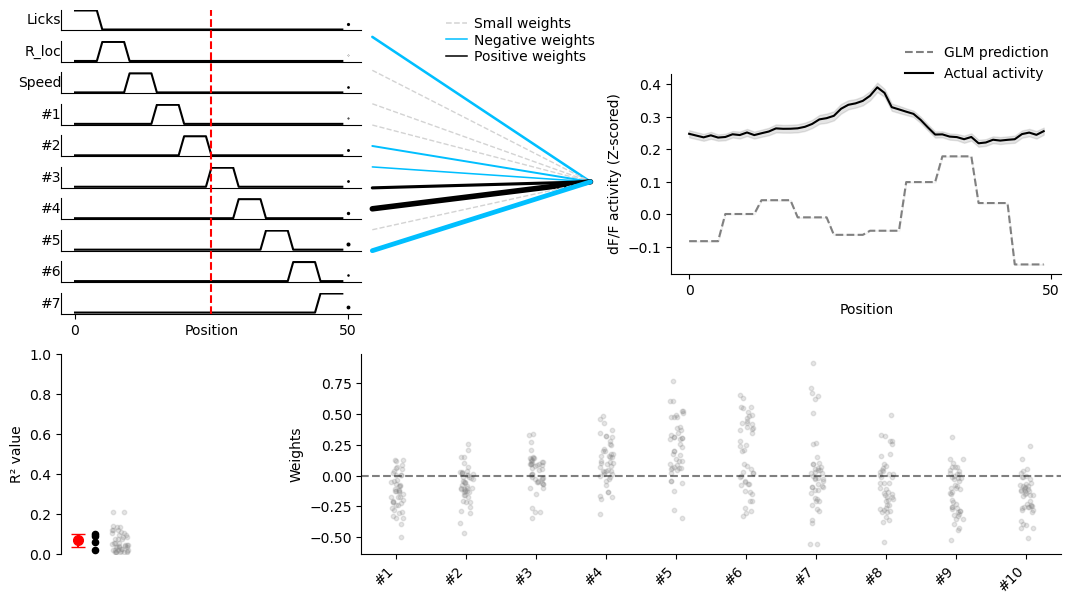

In [12]:
from GLM_regression import *
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 10,
                     'axes.spines.right': False,
                     'axes.spines.top': False,
                     'legend.frameon': False})


# filepath = "SSTindivsomata_GLM.mat"
filepath = "NDNFindivsomata_GLM.mat"

reorganized_data, variable_list = load_data(filepath)


def plot_example_neuron_vars_removed(reorganized_data, variable_list, neuron='best', animal='best', vars_to_remove=3, model_name=None):
    
    GLM_params = {}
    
    if animal == 'best' or neuron == 'best':
        best_R2 = -np.inf
        best_animal = None
        best_neuron = None
        for animal_key in reorganized_data:
            GLM_params[animal_key] = {} 
            for i, neuron_data in enumerate(reorganized_data[animal_key]):
                # Prepare data and train GLM
                neuron_data = reorganized_data[animal_key][i][:, :, 1:]
                neuron_data = neuron_data[:, :, ~np.isnan(neuron_data).any(axis=(0, 1))]
                
                
                def remove_variables(neuron_data, vars_to_remove):
                    all_data_excluding_activity_var = neuron_data[:, 1:, :]  # Removes the neuron activity
                    vars_to_exclude = np.arange(vars_to_remove, all_data_excluding_activity_var.shape[1])
                    neuron_data_filtered = all_data_excluding_activity_var[:, vars_to_exclude, :]
                    return neuron_data_filtered
                neuron_data_filtered = remove_variables(neuron_data, vars_to_remove)
                
            
#                 #z score the neuron activity (first variable)
#                 for j in range(neuron_data.shape[1]):
#                     if j == 0:  # Z-score neuron activity (df/f)
#                         neuron_data[:, j] = (neuron_data[:, j] - np.mean(neuron_data_filtered[:, j])) / np.std(neuron_data_filtered[:, j])
                
    
                #z scoring the neuron activity 
                neuron_activity = neuron_data[:, 0, :]  # This is the first variable
                neuron_activity_zscored = (neuron_activity - np.mean(neuron_activity)) / np.std(neuron_activity)
                
                flattened_data_filtered = []
                for j in range(neuron_data_filtered.shape[1]):
                    min_val = np.min(neuron_data_filtered[:, j])
                    max_val = np.max(neuron_data_filtered[:, j])
                    if max_val - min_val != 0:  # Avoid division by zero
                        neuron_data_filtered[:, j] = (neuron_data_filtered[:, j] - min_val) / (max_val - min_val)
                    flattened_data_filtered.append(neuron_data_filtered[:, j].flatten())
                
                flattened_data_filtered = np.stack(flattened_data_filtered, axis=1)
                
                # Combine Z-scored neuron activity with min-max normalized features
                flattened_data_filtered = np.column_stack((neuron_activity_zscored.flatten(), flattened_data_filtered))
                
                
                # Check for NaNs and remove rows with NaNs
                if np.isnan(flattened_data_filtered).any():
                    print("nans in flattened_data_filtered")
                    continue

                # Ensure that the design matrix has at least one feature
                if flattened_data_filtered.shape[1] <= 1:
                    print("No features available after preprocessing")
                    continue
                
                # Flatten neuron_activity to match the shape of predicted_activity
                neuron_activity_flattened = neuron_activity.flatten()
                
                # Train GLM using filtered data
                design_matrix_X = flattened_data_filtered[:, 1:]  # Use filtered variables (skip the first column)
                neuron_activity_zscored_flattened = flattened_data_filtered[:, 0]  # Neuron activity as the dependent variable
                model = RidgeCV(alphas=[0.1, 1, 10, 100, 1000, 5000], cv=None)
                model.fit(design_matrix_X, neuron_activity_zscored_flattened)
                
                
                # Predict activity and calculate R²
                predicted_activity = model.predict(design_matrix_X)
                R2 = model.score(design_matrix_X, neuron_activity_flattened)
                
                predicted_activity = (predicted_activity - np.max(predicted_activity)) / (np.max(predicted_activity) - np.min(predicted_activity))
                
                pearson_R = np.corrcoef(predicted_activity, neuron_activity_flattened)[0, 1]
                
                
                
                GLM_params[animal_key][i] = {
                    'weights': model.coef_,
                    'intercept': model.intercept_,
                    'R2': R2,  # Store the R² value
                    'R2_trialavg': pearson_R ** 2,
                    'model': model
}
                

                if R2 > best_R2:
                    best_R2 = R2
                    best_animal = animal_key
                    best_neuron = i

        animal = best_animal
        neuron = best_neuron
                    
        weights = GLM_params[animal][neuron]['weights']
        print(f" shape neuron_data_filtered {neuron_data_filtered.shape}")
        print(f"weights shape: {weights.shape}")   

        fig = plt.figure(figsize=(10,8))
        axes = gs.GridSpec(nrows=1, ncols=1, left=0, right=0.3, bottom=0.5)
        ax = fig.add_subplot(axes[0])
        ax.axis('off')

        # Calculate the average of the selected subset variables
        avg_variables = np.mean(neuron_data_filtered, axis=2)
        plot_example_neuron_variables(avg_variables, variable_list, ax=ax, weights=weights)

    
    axes = gs.GridSpec(nrows=1, ncols=1, left=0.3, right=0.54, bottom=0.5)
    ax = fig.add_subplot(axes[0])
    ax.axis('off')
    y1 = np.linspace(-0.54, -1.86, 3).tolist()
    y2 = np.linspace(-2.28, -6, 10).tolist()
    y = y1 + y2
    w_max = np.max(np.abs(weights))
    for i,w in enumerate(weights):
        if abs(w)<0.05:
            line, = ax.plot([0,1], [y[i],-3.4], color='lightgray', linestyle='--', linewidth=1)
        elif w < 0:
            line, = ax.plot([0,1], [y[i],-3.4], color='deepskyblue', linewidth=abs(w/w_max)*4)
        else:
            line, = ax.plot([0,1], [y[i],-3.4], color='black', linewidth=abs(w/w_max)*4)
        line.set_solid_capstyle('round')
    ax.set_ylim([-6,0])
    ax.plot([0,0], [0,0], color='lightgray', linewidth=1.1, linestyle='--', label='Small weights')
    ax.plot([0,0], [0,0], color='deepskyblue', linewidth=1.1, label='Negative weights')
    ax.plot([0,0], [0,0], color='black', linewidth=1.1, label='Positive weights')
    ax.legend(fontsize=10, loc='upper right', frameon=False, handlelength=1.5, handletextpad=0.5, labelspacing=0.2, borderpad=0)

    glm_model = GLM_params[animal][neuron]['model']
    flattened_input_variables = flattened_data_filtered[:,1:]
    predicted_activity = glm_model.predict(flattened_input_variables)

#     pearson_R = np.corrcoef(predicted_activity, flattened_data_filtered[:,0])[0,1]
#     print("pearson R2 overall:", pearson_R**2)

    predicted_activity = predicted_activity.reshape(neuron_activity.shape)
    avg_predicted_activity = np.mean(predicted_activity, axis=1)
    std_predicted_activity = np.std(predicted_activity, axis=1)
    sem_predicted_activity = std_predicted_activity / np.sqrt(predicted_activity.shape[1])
    avg_neuron_activity = np.mean(neuron_activity, axis=1)
    std_neuron_activity = np.std(neuron_activity, axis=1)
    sem_neuron_activity = std_neuron_activity / np.sqrt(neuron_activity.shape[1])

    pearson_R = np.corrcoef(avg_predicted_activity, avg_neuron_activity)[0,1]
    print("pearson R2 average:", pearson_R**2)

    axes = gs.GridSpec(nrows=1, ncols=1, left=0.61, right=1, top=0.8, bottom=0.55)
    ax = fig.add_subplot(axes[0])
    ax.plot(avg_predicted_activity, label='GLM prediction', c='gray', linestyle='--')
    ax.plot(avg_neuron_activity, label='Actual activity', c='k')
    ax.fill_between(np.arange(avg_neuron_activity.shape[0]), avg_neuron_activity-sem_neuron_activity, avg_neuron_activity+sem_neuron_activity, alpha=0.1, color='k')
    ax.fill_between(np.arange(avg_predicted_activity.shape[0]), avg_predicted_activity-sem_predicted_activity, avg_predicted_activity+sem_predicted_activity, alpha=0.1, color='gray')
    ax.set_xlabel("Position")
    ax.set_xticks([0,50])
    ax.set_ylabel("dF/F activity (Z-scored)")
    ax.legend(loc='upper right', bbox_to_anchor=(1, 1.2))

    axes = gs.GridSpec(nrows=1, ncols=1, top=0.45, bottom=0.2, left=0.3, right=1)
    ax = fig.add_subplot(axes[0])
    
    
    
    def plot_GLM_summary_data(GLM_params, variable_list, vars_to_remove, ax):
        jitter = 0.1  # Jitter for better visualization

        for animal_key in GLM_params:
            for neuron_nr in GLM_params[animal_key]:
                weights = GLM_params[animal_key][neuron_nr]['weights']
                variable_indices = np.arange(len(weights))  # Length of weights, not variable_list[vars_to_remove:]

                # Add jitter to x-axis for better visualization
                jittered_x = variable_indices + np.random.uniform(-jitter, jitter, len(weights))

                ax.scatter(jittered_x, weights, color='grey', alpha=0.2, s=10)

        # Set the tick locations to match the number of weights
        ax.set_xticks(np.arange(len(weights)))

        # Adjust the labels to correspond to the remaining variables after removing the first `vars_to_remove` variables
        ax.set_xticklabels(variable_list[vars_to_remove + 1:], rotation=45, ha='right')
        # Note: `vars_to_remove + 1` skips the first variable (neural activity) and any additional variables you specified to remove.

        ax.set_ylabel('Weights')
        ax.hlines(0, -0.5, len(weights) - 0.5, linestyles='--', color='black', alpha=0.5)
        ax.set_xlim([-0.5, len(weights) - 0.5])

    
#     def plot_GLM_summary_data(GLM_params, variable_list, ax):
#         jitter = 0.1  # Jitter for better visualization

#         for animal_key in GLM_params:
#             for neuron_nr in GLM_params[animal_key]:
#                 weights = GLM_params[animal_key][neuron_nr]['weights']
#                 variable_indices = np.arange(len(weights))  # Length of weights, not variable_list[1:]

#                 # Add jitter to x-axis for better visualization
#                 jittered_x = variable_indices + np.random.uniform(-jitter, jitter, len(weights))

#                 ax.scatter(jittered_x, weights, color='grey', alpha=0.2, s=10)

#                 jittered_x = variable_indices + np.random.uniform(-jitter, jitter, len(weights))

#                 ax.scatter(jittered_x, weights, color='grey', alpha=0.2, s=10)



#        


        # ax.set_xticks(np.arange(neuron_data_filtered.shape[1]))
#         ax.set_xticklabels(variable_list[vars_to_remove:], rotation=45, ha='right')
#         ax.set_xticks(np.arange(len(variable_list[1:])))
#         ax.set_xticklabels(variable_list[1:], rotation=45, ha='right')
#         ax.set_ylabel('Weights')

#         ax.set_xticks(np.arange(len(weights)))

#         # Adjust the labels to correspond to the remaining variables after removing the first `vars_to_remove` variables
#         ax.set_xticklabels(variable_list[vars_to_remove:], rotation=45, ha='right')

#         ax.set_ylabel('Weights')
#         ax.hlines(0, -0.5, len(weights) - 0.5, linestyles='--', color='black', alpha=0.5)
#         ax.set_xlim([-0.5, len(weights) - 0.5])

        
#         ax.set_xlabel('Variables')
#         ax.hlines(0, -0.5, len(variable_list[1:])-0.5, linestyles='--', color='black', alpha=0.5)
#         ax.set_xlim([-0.5, len(variable_list[1:])-0.5])

    plot_GLM_summary_data(GLM_params, variable_list, vars_to_remove, ax=ax)

    axes = gs.GridSpec(nrows=1, ncols=1, top=0.45, bottom=0.2, left=0., right=0.2)
    ax = fig.add_subplot(axes[0])
    plot_R2_distribution(GLM_params, ax=ax)

    if model_name is not None:
        fig.savefig(f"figures/GLM_regression_{model_name}_{animal}_{neuron}.png", bbox_inches='tight', dpi=300)
                    

plot_example_neuron_vars_removed(reorganized_data, variable_list, neuron='best', animal='best', model_name=None)            
                    
                    
                    
                    

 shape neuron_data_filtered (50, 10, 390)
weights shape: (10,)


AxisError: axis 1 is out of bounds for array of dimension 1

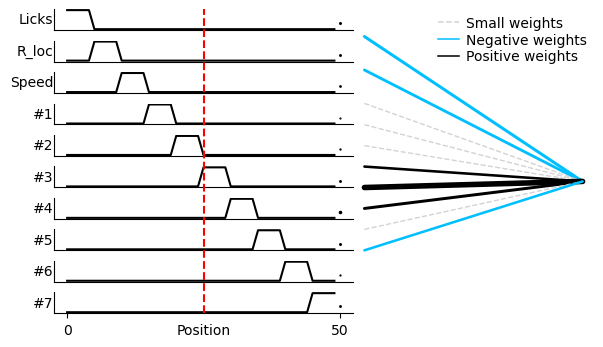

In [16]:
from GLM_regression import *
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 10,
                     'axes.spines.right': False,
                     'axes.spines.top': False,
                     'legend.frameon': False})


# filepath = "SSTindivsomata_GLM.mat"
filepath = "NDNFindivsomata_GLM.mat"

reorganized_data, variable_list = load_data(filepath)


def plot_example_neuron_vars_removed(reorganized_data, variable_list, neuron='best', animal='best', vars_to_remove=3, model_name=None):
    
    GLM_params = {}
    
    if animal == 'best' or neuron == 'best':
        best_R2 = -np.inf
        best_animal = None
        best_neuron = None
        for animal_key in reorganized_data:
            GLM_params[animal_key] = {} 
            for i, neuron_data in enumerate(reorganized_data[animal_key]):
                # Prepare data and train GLM
                neuron_data = reorganized_data[animal_key][i][:, :, 1:]
                neuron_data = neuron_data[:, :, ~np.isnan(neuron_data).any(axis=(0, 1))]
                
                def remove_variables(neuron_data, vars_to_remove):
                    all_data_excluding_activity_var = neuron_data[:, 1:, :]  # Removes the neuron activity
                    vars_to_exclude = np.arange(vars_to_remove, all_data_excluding_activity_var.shape[1])
                    neuron_data_filtered = all_data_excluding_activity_var[:, vars_to_exclude, :]
                    return neuron_data_filtered
                neuron_data_filtered = remove_variables(neuron_data, vars_to_remove)
                
                # Apply min-max normalization to all variables, including neuron activity
                min_val = np.min(neuron_data, axis=(0, 2), keepdims=True)
                max_val = np.max(neuron_data, axis=(0, 2), keepdims=True)
                neuron_data = (neuron_data - min_val) / (max_val - min_val)
                
                flattened_data_filtered = []
                for j in range(neuron_data_filtered.shape[1]):
                    flattened_data_filtered.append(neuron_data_filtered[:, j].flatten())
                
                flattened_data_filtered = np.stack(flattened_data_filtered, axis=1)
                
                # Combine min-max normalized neuron activity with other min-max normalized features
                flattened_data_filtered = np.column_stack((neuron_data[:, 0, :].flatten(), flattened_data_filtered))
                
                # Check for NaNs and remove rows with NaNs
                if np.isnan(flattened_data_filtered).any():
                    print("nans in flattened_data_filtered")
                    continue

                # Ensure that the design matrix has at least one feature
                if flattened_data_filtered.shape[1] <= 1:
                    print("No features available after preprocessing")
                    continue
                
                # Flatten neuron_activity to match the shape of predicted_activity
                neuron_activity_flattened = neuron_data[:, 0, :].flatten()
                
                # Train GLM using filtered data
                design_matrix_X = flattened_data_filtered[:, 1:]  # Use filtered variables (skip the first column)
                neuron_activity_flattened = flattened_data_filtered[:, 0]  # Neuron activity as the dependent variable
                model = RidgeCV(alphas=[0.1, 1, 10, 100, 1000, 5000], cv=None)
                model.fit(design_matrix_X, neuron_activity_flattened)
                
                # Predict activity
                predicted_activity = model.predict(design_matrix_X)
                
                # Apply min-max normalization to the predicted activity for fair comparison
                predicted_activity = (predicted_activity - np.min(predicted_activity)) / (np.max(predicted_activity) - np.min(predicted_activity))
                
                # Calculate R² and Pearson correlation
                R2 = model.score(design_matrix_X, neuron_activity_flattened)
                pearson_R = np.corrcoef(predicted_activity, neuron_activity_flattened)[0, 1]
                
                GLM_params[animal_key][i] = {
                    'weights': model.coef_,
                    'intercept': model.intercept_,
                    'R2': R2,  # Store the R² value
                    'R2_trialavg': pearson_R ** 2,
                    'model': model
                }
                
                if R2 > best_R2:
                    best_R2 = R2
                    best_animal = animal_key
                    best_neuron = i

        animal = best_animal
        neuron = best_neuron
                    
        weights = GLM_params[animal][neuron]['weights']
        print(f" shape neuron_data_filtered {neuron_data_filtered.shape}")
        print(f"weights shape: {weights.shape}")   

        fig = plt.figure(figsize=(10,8))
        axes = gs.GridSpec(nrows=1, ncols=1, left=0, right=0.3, bottom=0.5)
        ax = fig.add_subplot(axes[0])
        ax.axis('off')

        # Calculate the average of the selected subset variables
        avg_variables = np.mean(neuron_data_filtered, axis=2)
        plot_example_neuron_variables(avg_variables, variable_list, ax=ax, weights=weights)

    
    axes = gs.GridSpec(nrows=1, ncols=1, left=0.3, right=0.54, bottom=0.5)
    ax = fig.add_subplot(axes[0])
    ax.axis('off')
    y1 = np.linspace(-0.54, -1.86, 3).tolist()
    y2 = np.linspace(-2.28, -6, 10).tolist()
    y = y1 + y2
    w_max = np.max(np.abs(weights))
    for i,w in enumerate(weights):
        if abs(w)<0.05:
            line, = ax.plot([0,1], [y[i],-3.4], color='lightgray', linestyle='--', linewidth=1)
        elif w < 0:
            line, = ax.plot([0,1], [y[i],-3.4], color='deepskyblue', linewidth=abs(w/w_max)*4)
        else:
            line, = ax.plot([0,1], [y[i],-3.4], color='black', linewidth=abs(w/w_max)*4)
        line.set_solid_capstyle('round')
    ax.set_ylim([-6,0])
    ax.plot([0,0], [0,0], color='lightgray', linewidth=1.1, linestyle='--', label='Small weights')
    ax.plot([0,0], [0,0], color='deepskyblue', linewidth=1.1, label='Negative weights')
    ax.plot([0,0], [0,0], color='black', linewidth=1.1, label='Positive weights')
    ax.legend(fontsize=10, loc='upper right', frameon=False, handlelength=1.5, handletextpad=0.5, labelspacing=0.2, borderpad=0)

    glm_model = GLM_params[animal][neuron]['model']
    flattened_input_variables = flattened_data_filtered[:,1:]
    predicted_activity = glm_model.predict(flattened_input_variables)

    # Apply min-max normalization to the predicted activity again for consistency
    predicted_activity = (predicted_activity - np.min(predicted_activity)) / (np.max(predicted_activity) - np.min(predicted_activity))
    neuron_activity = neuron_data[:, 1, :]
    neuron_activity = (neuron_activity - np.max(neuron_activity)) - (np.max(neuron_activity) - np.min(neuron_activity))
    
    predicted_activity = predicted_activity.reshape(neuron_activity_flattened.shape)
    avg_predicted_activity = np.mean(predicted_activity, axis=1)
    std_predicted_activity = np.std(predicted_activity, axis=1)
    sem_predicted_activity = std_predicted_activity / np.sqrt(predicted_activity.shape[1])
    avg_neuron_activity = np.mean(neuron_activity_flattened, axis=1)
    std_neuron_activity = np.std(neuron_activity, axis=1)
    sem_neuron_activity = std_neuron_activity / np.sqrt(neuron_activity.shape[1])

    # Z-score the neuron activity if not already done
    # This line should ensure the neuron_activity is z-scored
    
#     neuron_activity_normalized = (neuron_activity - np.mean(neuron_activity, axis=1, keepdims=True)) / np.std(neuron_activity, axis=1, keepdims=True)

#     # Ensure the predictions and actual activity are on the same scale
#     predicted_activity = predicted_activity.reshape(neuron_activity.shape)
#     avg_predicted_activity = np.mean(predicted_activity, axis=1)
#     std_predicted_activity = np.std(predicted_activity, axis=1)
#     sem_predicted_activity = std_predicted_activity / np.sqrt(predicted_activity.shape[1])

#     # Now we use the z-scored neuron activity for the actual activity
#     avg_neuron_activity = np.mean(neuron_activity_zscored, axis=1)
#     std_neuron_activity = np.std(neuron_activity_zscored, axis=1)
#     sem_neuron_activity_zscored = std_neuron_activity_zscored / np.sqrt(neuron_activity_zscored.shape[1])

    
#     pearson_R = np.corrcoef(avg_predicted_activity, avg_neuron_activity_zscored)[0,1]
#     print("pearson R2 average:", pearson_R**2)
    
    pearson_R = np.corrcoef(avg_predicted_activity, avg_neuron_activity)[0,1]
    print("pearson R2 average:", pearson_R**2)

    axes = gs.GridSpec(nrows=1, ncols=1, left=0.61, right=1, top=0.8, bottom=0.55)
    ax = fig.add_subplot(axes[0])
    ax.plot(avg_predicted_activity, label='GLM prediction', c='gray', linestyle='--')
    ax.plot(avg_neuron_activity, label='Actual activity', c='k')
    ax.fill_between(np.arange(avg_neuron_activity.shape[0]), avg_neuron_activity-sem_neuron_activity, avg_neuron_activity+sem_neuron_activity, alpha=0.1, color='k')
    ax.fill_between(np.arange(avg_predicted_activity.shape[0]), avg_predicted_activity-sem_predicted_activity, avg_predicted_activity+sem_predicted_activity, alpha=0.1, color='gray')
    ax.set_xlabel("Position")
    ax.set_xticks([0,50])
    ax.set_ylabel("dF/F activity (Min-Max Scaled)")
    ax.legend(loc='upper right', bbox_to_anchor=(1, 1.2))


#     axes = gs.GridSpec(nrows=1, ncols=1, left=0.61, right=1, top=0.8, bottom=0.55)
#     ax = fig.add_subplot(axes[0])

#     # Ensure you're plotting the z-scored neural activity
#     ax.plot(avg_predicted_activity, label='GLM prediction', c='gray', linestyle='--')
#     ax.plot(avg_neuron_activity_zscored, label='Actual activity', c='k')

#     # Fill between using the standard errors of mean
#     ax.fill_between(np.arange(avg_neuron_activity.shape[0]), avg_neuron_activity-sem_neuron_activity, avg_neuron_activity_zscored+sem_neuron_activity_zscored, alpha=0.1, color='k')
#     ax.fill_between(np.arange(avg_predicted_activity.shape[0]), avg_predicted_activity-sem_predicted_activity, avg_predicted_activity+sem_predicted_activity, alpha=0.1, color='gray')

#     ax.set_xlabel("Position")
#     ax.set_xticks([0, 50])
#     ax.set_ylabel("dF/F activity (Z-scored)")
#     ax.legend(loc='upper right', bbox_to_anchor=(1, 1.2))



    axes = gs.GridSpec(nrows=1, ncols=1, top=0.45, bottom=0.2, left=0.3, right=1)
    ax = fig.add_subplot(axes[0])
    
    
    
    def plot_GLM_summary_data(GLM_params, variable_list, vars_to_remove, ax):
        jitter = 0.1  # Jitter for better visualization

        for animal_key in GLM_params:
            for neuron_nr in GLM_params[animal_key]:
                weights = GLM_params[animal_key][neuron_nr]['weights']
                variable_indices = np.arange(len(weights))  # Length of weights, not variable_list[vars_to_remove:]

                # Add jitter to x-axis for better visualization
                jittered_x = variable_indices + np.random.uniform(-jitter, jitter, len(weights))

                ax.scatter(jittered_x, weights, color='grey', alpha=0.2, s=10)

        # Set the tick locations to match the number of weights
        ax.set_xticks(np.arange(len(weights)))

        # Adjust the labels to correspond to the remaining variables after removing the first `vars_to_remove` variables
        ax.set_xticklabels(variable_list[vars_to_remove + 1:], rotation=45, ha='right')
        # Note: `vars_to_remove + 1` skips the first variable (neural activity) and any additional variables you specified to remove.

        ax.set_ylabel('Weights')
        ax.hlines(0, -0.5, len(weights) - 0.5, linestyles='--', color='black', alpha=0.5)
        ax.set_xlim([-0.5, len(weights) - 0.5])

    
    plot_GLM_summary_data(GLM_params, variable_list, vars_to_remove, ax=ax)

    axes = gs.GridSpec(nrows=1, ncols=1, top=0.45, bottom=0.2, left=0., right=0.2)
    ax = fig.add_subplot(axes[0])
    plot_R2_distribution(GLM_params, ax=ax)

    if model_name is not None:
        fig.savefig(f"figures/GLM_regression_{model_name}_{animal}_{neuron}.png", bbox_inches='tight', dpi=300)
                    

plot_example_neuron_vars_removed(reorganized_data, variable_list, neuron='best', animal='best', model_name=None)            


variable_list: ['Activity', 'Licks', 'R_loc', 'Speed', '#1', '#2', '#3', '#4', '#5', '#6', '#7', '#8', '#9', '#10']
neuron_data hape (50, 14, 52)
all_data_excluding_activity_var shape (50, 13, 52)
neuron_data hape (50, 14, 52)
all_data_excluding_activity_var shape (50, 13, 52)
neuron_data hape (50, 14, 52)
all_data_excluding_activity_var shape (50, 13, 52)
neuron_data hape (50, 14, 52)
all_data_excluding_activity_var shape (50, 13, 52)
neuron_data hape (50, 14, 52)
all_data_excluding_activity_var shape (50, 13, 52)
neuron_data hape (50, 14, 52)
all_data_excluding_activity_var shape (50, 13, 52)
neuron_data hape (50, 14, 52)
all_data_excluding_activity_var shape (50, 13, 52)
neuron_data hape (50, 14, 52)
all_data_excluding_activity_var shape (50, 13, 52)
neuron_data hape (50, 14, 52)
all_data_excluding_activity_var shape (50, 13, 52)
neuron_data hape (50, 14, 52)
all_data_excluding_activity_var shape (50, 13, 52)
neuron_data hape (50, 14, 52)
all_data_excluding_activity_var shape (50, 1

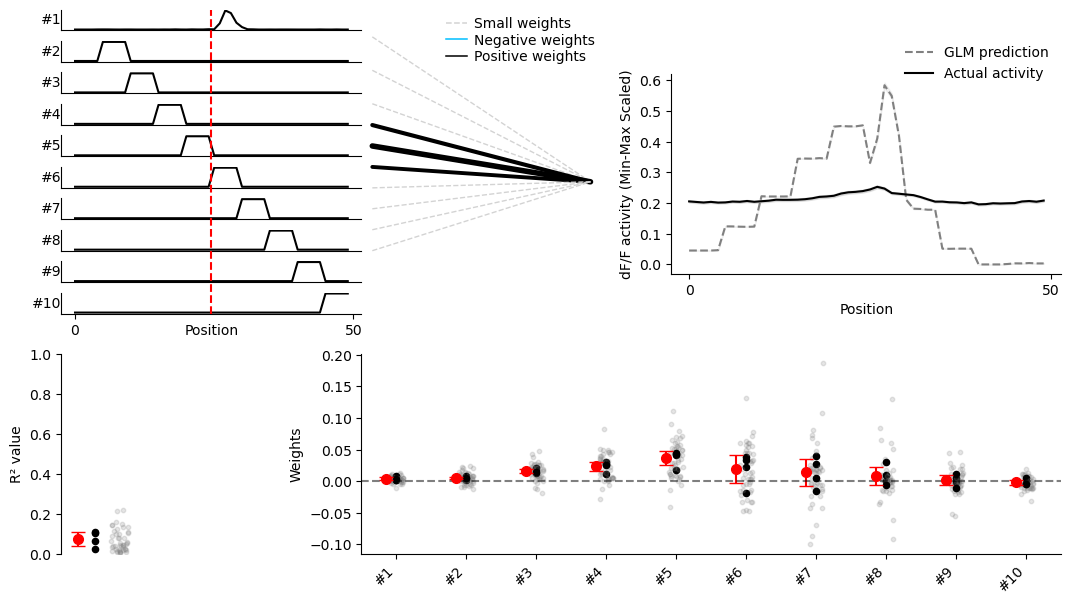

In [3]:
from GLM_regression import *
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 10,
                     'axes.spines.right': False,
                     'axes.spines.top': False,
                     'legend.frameon': False})


# filepath = "SSTindivsomata_GLM.mat"
filepath = "NDNFindivsomata_GLM.mat"

reorganized_data, variable_list = load_data(filepath)
print(f"variable_list: {variable_list}")

def plot_example_neuron_vars_removed(reorganized_data, variable_list, neuron='best', animal='best', vars_to_remove=[], model_name=None):

    """

    variable_list: ['Activity', 'Licks', 'R_loc', 'Speed', '#1', '#2', '#3', '#4', '#5', '#6', '#7', '#8', '#9', '#10']


    """



    GLM_params = {}
    
    if animal == 'best' or neuron == 'best':
        best_R2 = -np.inf
        best_animal = None
        best_neuron = None
        for animal_key in reorganized_data:
            GLM_params[animal_key] = {}
            for i, neuron_data in enumerate(reorganized_data[animal_key]):
                # Prepare data and train GLM
                neuron_data = reorganized_data[animal_key][i][:, :, 1:]
                neuron_data = neuron_data[:, :, ~np.isnan(neuron_data).any(axis=(0, 1))]
                print(f"neuron_data hape {neuron_data.shape}")
                
                
                def remove_variables(neuron_data, vars_to_remove):
                    # Exclude the first column, which is the neuron activity
                    all_data_excluding_activity_var = neuron_data[:, 1:, :]  # Shape: (num_time_points, num_variables - 1, num_trials)
                    print(f"all_data_excluding_activity_var shape {all_data_excluding_activity_var.shape}")
                    
                    
                    # Ensure vars_to_remove is a list, even if it's an integer
                    if isinstance(vars_to_remove, int):
                        vars_to_remove = [vars_to_remove]

                    if vars_to_remove is not None:
                        # Get the indices of the variables to remove based on their names
                        var_indices_to_remove = [variable_list.index(var) for var in vars_to_remove]
                        # Create an array of indices to keep, excluding the ones we want to remove
                        vars_to_exclude = np.delete(np.arange(all_data_excluding_activity_var.shape[1]), var_indices_to_remove)
                    else:
                        # If no variables are to be removed, just keep all the variables
                        vars_to_exclude = np.arange(all_data_excluding_activity_var.shape[1])

                    # Filter the neuron_data to exclude the selected variables
                    neuron_data_filtered = all_data_excluding_activity_var[:, vars_to_exclude, :]

                    return neuron_data_filtered

                # Handle case if vars_to_remove is None or passed as an integer
                neuron_data_filtered = remove_variables(neuron_data, vars_to_remove)

#                 def remove_variables(neuron_data, vars_to_remove):
#                     all_data_excluding_activity_var = neuron_data[:, 1:, :]  # Removes the neuron activity
#                     vars_to_exclude = np.arange(vars_to_remove, all_data_excluding_activity_var.shape[1])
#                     neuron_data_filtered = all_data_excluding_activity_var[:, vars_to_exclude, :]
#                     return neuron_data_filtered
#                 neuron_data_filtered = remove_variables(neuron_data, vars_to_remove)
                
                
#                 filtered_variable_list = variable_list[1:]  # Exclude the first variable, which is the neuron activity
#                 if vars_to_remove:
#                     filtered_variable_list = [var for var in filtered_variable_list if var not in vars_to_remove]
    
                
                
                # Apply min-max normalization to all variables, including neuron activity
                min_val = np.min(neuron_data, axis=(0, 2), keepdims=True)
                max_val = np.max(neuron_data, axis=(0, 2), keepdims=True)
                neuron_data = (neuron_data - min_val) / (max_val - min_val)
                
                flattened_data_filtered = []
                for j in range(neuron_data_filtered.shape[1]):
                    flattened_data_filtered.append(neuron_data_filtered[:, j].flatten())
                
                flattened_data_filtered = np.stack(flattened_data_filtered, axis=1)
                
                # Combine min-max normalized neuron activity with other min-max normalized features
                flattened_data_filtered = np.column_stack((neuron_data[:, 0, :].flatten(), flattened_data_filtered))
                
                # Check for NaNs and remove rows with NaNs
                if np.isnan(flattened_data_filtered).any():
                    print("nans in flattened_data_filtered")
                    continue

                # Ensure that the design matrix has at least one feature
                if flattened_data_filtered.shape[1] <= 1:
                    print("No features available after preprocessing")
                    continue
                
                # Flatten neuron_activity to match the shape of predicted_activity
                neuron_activity_flattened = neuron_data[:, 0, :].flatten()
                
                # Train GLM using filtered data
                design_matrix_X = flattened_data_filtered[:, 1:]  # Use filtered variables (skip the first column)
                neuron_activity_flattened = flattened_data_filtered[:, 0]  # Neuron activity as the dependent variable
                model = RidgeCV(alphas=[0.1, 1, 10, 100, 1000, 5000], cv=None)
                model.fit(design_matrix_X, neuron_activity_flattened)
                
                # Predict activity
                predicted_activity = model.predict(design_matrix_X)
                
                # Normalize the predicted activity for fair comparison
                predicted_activity = (predicted_activity - np.min(predicted_activity)) / (np.max(predicted_activity) - np.min(predicted_activity))
                
                # Calculate R² and Pearson correlation
                R2 = model.score(design_matrix_X, neuron_activity_flattened)
                pearson_R = np.corrcoef(predicted_activity, neuron_activity_flattened)[0, 1]
                
                GLM_params[animal_key][i] = {
                    'weights': model.coef_,
                    'intercept': model.intercept_,
                    'R2': R2,  # Store the R² value
                    'R2_trialavg': pearson_R ** 2,
                    'model': model
                }
                
                if R2 > best_R2:
                    best_R2 = R2
                    best_animal = animal_key
                    best_neuron = i

        animal = best_animal
        neuron = best_neuron
                    
        weights = GLM_params[animal][neuron]['weights']
        print(f" shape neuron_data_filtered {neuron_data_filtered.shape}")
        print(f"weights shape: {weights.shape}")   

        fig = plt.figure(figsize=(10,8))
        axes = gs.GridSpec(nrows=1, ncols=1, left=0, right=0.3, bottom=0.5)
        ax = fig.add_subplot(axes[0])
        ax.axis('off')

        # Calculate the average of the selected subset variables
        avg_variables = np.mean(neuron_data_filtered, axis=2)
        print(f"len(avg_variables) {len(avg_variables)}")
        print(f"type(avg_variables) {type(avg_variables)}")
#         plot_example_neuron_variables(avg_variables, variable_list, ax=ax, weights=weights)

        
            # Start with the full variable list minus 'Activity'
        variable_list_minus_activity = variable_list[1:]  # This excludes 'Activity'

        # Create keep_vars_list by removing specified variables
        keep_vars_list = [var for var in variable_list_minus_activity if var not in vars_to_remove]
        print(f"keep vars list {keep_vars_list}")

        # Check the lengths after filtering
        print(f"variable_list_minus_activity: {len(variable_list_minus_activity)}")
        print(f"keep_vars_list: {len(keep_vars_list)}")

        
#         def plot_example_neuron_variables(avg_variables, keep_vars_list, ax, weights=None):
#             variable_list = variable_list[1:]

#             fig = ax.get_figure()
#             height_ratios = np.ones(len(keep_vars_list))
#             height_ratios[-10:] = 0.5
#             axes = gs.GridSpecFromSubplotSpec(nrows=(len(keep_vars_list), ncols=1, subplot_spec=ax, hspace=0.5, height_ratios=height_ratios)
#             for i in range(len(keep_vars_list)):
#                 ax = fig.add_subplot(axes[i])
#                 ax.plot(avg_variables, color='k')
#                 ax.set_ylabel(keep_vars_list, rotation=0, ha='right', va='center', labelpad=0)
#                 ax.set_xticks([])
#                 ax.set_yticks([])
#                 if weights is not None:
#                     ax.scatter([50],[0.3], c='k', s=abs(weights[i])*20)
#             ax.set_xlabel('Position', labelpad=-10)
#             ax.set_xticks([0,50])

#             # Draw vertical line across all plots (remove axes and make the background transparent)
#             ax = fig.add_subplot(axes[:])
#             ax.vlines(24.5, 0, 1, linestyles='--', color='r')
#             ax.set_xlim([0, 49])
#             ax.set_ylim([0, 1])
#             ax.axis('off')
#             ax.patch.set_alpha(0)

#         plot_example_neuron_variables(avg_variables, keep_vars_list, ax, weights=None)

        def plot_example_neuron_variables(avg_variables, keep_vars_list, ax, weights=None):
            fig = ax.get_figure()

            # Define height ratios for each variable subplot
            height_ratios = np.ones(len(keep_vars_list))
            height_ratios[-10:] = 0.5  # Adjust the height for the last 10 variables (spatial bins)

            # Set up the grid for subplots
            axes = gs.GridSpecFromSubplotSpec(nrows=len(keep_vars_list), ncols=1, subplot_spec=ax, hspace=0.5, height_ratios=height_ratios)

            # Iterate through the variables and plot each one
            for i in range(len(keep_vars_list)):
                sub_ax = fig.add_subplot(axes[i])
                sub_ax.plot(avg_variables[:, i], color='k')  # Ensure correct indexing to plot the right variable

                # Set labels and ticks
                sub_ax.set_ylabel(keep_vars_list[i], rotation=0, ha='right', va='center', labelpad=0)
                sub_ax.set_xticks([])
                sub_ax.set_yticks([])

                # Plot weights as scatter points if provided
                if weights is not None:
                    sub_ax.scatter([50], [0.3], c='k', s=abs(weights[i]) * 20)

            # Set x-axis labels for the bottom plot
            sub_ax.set_xlabel('Position', labelpad=-10)
            sub_ax.set_xticks([0, 50])

            # Draw vertical line across all plots (for visual separation)
            overlay_ax = fig.add_subplot(axes[:])
            overlay_ax.vlines(24.5, 0, 1, linestyles='--', color='r')
            overlay_ax.set_xlim([0, 49])
            overlay_ax.set_ylim([0, 1])
            overlay_ax.axis('off')
            overlay_ax.patch.set_alpha(0)
            
        plot_example_neuron_variables(avg_variables, keep_vars_list, ax, weights=None)

    
    axes = gs.GridSpec(nrows=1, ncols=1, left=0.3, right=0.54, bottom=0.5)
    ax = fig.add_subplot(axes[0])
    ax.axis('off')
    y1 = np.linspace(-0.54, -1.86, 3).tolist()
    y2 = np.linspace(-2.28, -6, 10).tolist()
    y = y1 + y2
    w_max = np.max(np.abs(weights))
    for i,w in enumerate(weights):
        if abs(w)<0.05:
            line, = ax.plot([0,1], [y[i],-3.4], color='lightgray', linestyle='--', linewidth=1)
        elif w < 0:
            line, = ax.plot([0,1], [y[i],-3.4], color='deepskyblue', linewidth=abs(w/w_max)*4)
        else:
            line, = ax.plot([0,1], [y[i],-3.4], color='black', linewidth=abs(w/w_max)*4)
        line.set_solid_capstyle('round')
    ax.set_ylim([-6,0])
    ax.plot([0,0], [0,0], color='lightgray', linewidth=1.1, linestyle='--', label='Small weights')
    ax.plot([0,0], [0,0], color='deepskyblue', linewidth=1.1, label='Negative weights')
    ax.plot([0,0], [0,0], color='black', linewidth=1.1, label='Positive weights')
    ax.legend(fontsize=10, loc='upper right', frameon=False, handlelength=1.5, handletextpad=0.5, labelspacing=0.2, borderpad=0)

    glm_model = GLM_params[animal][neuron]['model']
    flattened_input_variables = flattened_data_filtered[:,1:]
    predicted_activity = glm_model.predict(flattened_input_variables)

    # Apply min-max normalization to the predicted activity again for consistency
    predicted_activity = (predicted_activity - np.min(predicted_activity)) / (np.max(predicted_activity) - np.min(predicted_activity))
    
    # Ensure the neuron activity is normalized too
    neuron_activity = neuron_data[:, 0, :]
    
    # Reshape activities for averaging
    predicted_activity = predicted_activity.reshape(neuron_activity.shape)
    avg_predicted_activity = np.mean(predicted_activity, axis=1)
    std_predicted_activity = np.std(predicted_activity, axis=1)
    sem_predicted_activity = std_predicted_activity / np.sqrt(predicted_activity.shape[1])
    
    avg_neuron_activity = np.mean(neuron_activity, axis=1)
    std_neuron_activity = np.std(neuron_activity, axis=1)
    sem_neuron_activity = std_neuron_activity / np.sqrt(neuron_activity.shape[1])

    pearson_R = np.corrcoef(avg_predicted_activity, avg_neuron_activity)[0,1]
    print("pearson R2 average:", pearson_R**2)

    axes = gs.GridSpec(nrows=1, ncols=1, left=0.61, right=1, top=0.8, bottom=0.55)
    ax = fig.add_subplot(axes[0])
    ax.plot(avg_predicted_activity, label='GLM prediction', c='gray', linestyle='--')
    ax.plot(avg_neuron_activity, label='Actual activity', c='k')
    ax.fill_between(np.arange(avg_neuron_activity.shape[0]), avg_neuron_activity-sem_neuron_activity, avg_neuron_activity+sem_neuron_activity, alpha=0.1, color='k')
    ax.fill_between(np.arange(avg_predicted_activity.shape[0]), avg_predicted_activity-sem_predicted_activity, avg_predicted_activity+sem_predicted_activity, alpha=0.1, color='gray')
    ax.set_xlabel("Position")
    ax.set_xticks([0,50])
    ax.set_ylabel("dF/F activity (Min-Max Scaled)")
    ax.legend(loc='upper right', bbox_to_anchor=(1, 1.2))

    axes = gs.GridSpec(nrows=1, ncols=1, top=0.45, bottom=0.2, left=0.3, right=1)
    ax = fig.add_subplot(axes[0])
         
    
    def plot_GLM_summary_data(GLM_params, keep_vars_list, vars_to_remove, ax):
        jitter = 0.1  # Jitter for better visualization

        animal_averages = []

        for animal_key in GLM_params:
            neuron_weights = []
            for neuron_nr in GLM_params[animal_key]:
                weights = GLM_params[animal_key][neuron_nr]['weights']
                variable_indices = np.arange(len(weights))  # Length of weights, not variable_list[vars_to_remove:]

                # Add jitter to x-axis for better visualization
                jittered_x = variable_indices + np.random.uniform(-jitter, jitter, len(weights))
                ax.scatter(jittered_x, weights, color='grey', alpha=0.2, s=10)

                neuron_weights.append(weights)

            # Calculate the mean weights for each animal
            neuron_weights = np.array(neuron_weights)
            mean_weights = np.mean(neuron_weights, axis=0)
            animal_averages.append(mean_weights)
            print(f" len(keep_vars_list): {len(keep_vars_list)} len(mean_weights) {len(mean_weights)}")
            ax.scatter(range(len(keep_vars_list)), mean_weights, color='black', label=f'Animal {animal_key}', s=20)
        
        
        # Calculate and plot the global mean (mean of all animals' means)
        animal_averages = np.array(animal_averages)
        global_mean = np.mean(animal_averages, axis=0)
        global_std = np.std(animal_averages, axis=0)
        ax.errorbar(np.arange(len(keep_vars_list)) - 0.15, global_mean, yerr=global_std, fmt='o', color='red', ecolor='red', capsize=5, label='Average of all animals', markersize=7)

        # Configure x-axis labels and other plot settings
#         ax.set_xticks(np.arange(len(variable_list[vars_to_remove + 1:])))
        
        
        ax.set_xticks(np.arange(len(keep_vars_list)))
        ax.set_xticklabels(keep_vars_list, rotation=45, ha='right')
        ax.set_ylabel('Weights')
        ax.hlines(0, -0.5, len(weights) - 0.5, linestyles='--', color='black', alpha=0.5)
        ax.set_xlim([-0.5, len(weights) - 0.5])

    plot_GLM_summary_data(GLM_params, keep_vars_list, vars_to_remove, ax)

    axes = gs.GridSpec(nrows=1, ncols=1, top=0.45, bottom=0.2, left=0., right=0.2)
    ax = fig.add_subplot(axes[0])
    plot_R2_distribution(GLM_params, ax=ax)

    if model_name is not None:
        fig.savefig(f"figures/GLM_regression_{model_name}_{animal}_{neuron}.png", bbox_inches='tight', dpi=300)
                    

plot_example_neuron_vars_removed(reorganized_data, variable_list, neuron='best', animal='best', vars_to_remove=['Licks', 'R_loc', 'Speed'], model_name=None)           


variable_list: ['Activity', 'Licks', 'R_loc', 'Speed', '#1', '#2', '#3', '#4', '#5', '#6', '#7', '#8', '#9', '#10']
Selected spatial_bin_indices: [4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
Filtered data shape: (50, 10, 52)
Selected spatial_bin_indices: [4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
Filtered data shape: (50, 10, 52)
Selected spatial_bin_indices: [4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
Filtered data shape: (50, 10, 52)
Selected spatial_bin_indices: [4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
Filtered data shape: (50, 10, 52)
Selected spatial_bin_indices: [4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
Filtered data shape: (50, 10, 52)
Selected spatial_bin_indices: [4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
Filtered data shape: (50, 10, 52)
Selected spatial_bin_indices: [4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
Filtered data shape: (50, 10, 52)
Selected spatial_bin_indices: [4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
Filtered data shape: (50, 10, 52)
Selected spatial_bin_indices: [4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
Filtered data shape: (50, 1

IndexError: list index out of range

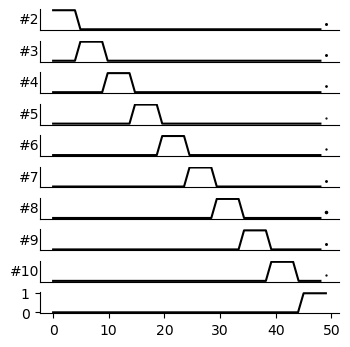

In [4]:
from GLM_regression import *
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 10,
                     'axes.spines.right': False,
                     'axes.spines.top': False,
                     'legend.frameon': False})

# filepath = "SSTindivsomata_GLM.mat"
filepath = "NDNFindivsomata_GLM.mat"

reorganized_data, variable_list = load_data(filepath)
print(f"variable_list: {variable_list}")

def plot_example_neuron_vars_removed(reorganized_data, variable_list, neuron='best', animal='best', model_name=None):

    GLM_params = {}
    
    if animal == 'best' or neuron == 'best':
        best_R2 = -np.inf
        best_animal = None
        best_neuron = None
        for animal_key in reorganized_data:
            GLM_params[animal_key] = {}
            for i, neuron_data in enumerate(reorganized_data[animal_key]):
                # Prepare data and train GLM
                neuron_data = reorganized_data[animal_key][i][:, :, 1:]
                neuron_data = neuron_data[:, :, ~np.isnan(neuron_data).any(axis=(0, 1))]

                # Manually select the columns corresponding to spatial bins
                spatial_bin_indices = list(range(4, 14))  # Assuming these indices correspond to #1 to #10
                neuron_data_filtered = neuron_data[:, spatial_bin_indices, :]

                # Print to verify data and indices
                print(f"Selected spatial_bin_indices: {spatial_bin_indices}")
                print(f"Filtered data shape: {neuron_data_filtered.shape}")
                
                # Apply min-max normalization to all variables, including neuron activity
                min_val = np.min(neuron_data, axis=(0, 2), keepdims=True)
                max_val = np.max(neuron_data, axis=(0, 2), keepdims=True)
                neuron_data = (neuron_data - min_val) / (max_val - min_val)
                
                flattened_data_filtered = []
                for j in range(neuron_data_filtered.shape[1]):
                    flattened_data_filtered.append(neuron_data_filtered[:, j].flatten())
                
                flattened_data_filtered = np.stack(flattened_data_filtered, axis=1)
                
                # Combine min-max normalized neuron activity with other min-max normalized features
                flattened_data_filtered = np.column_stack((neuron_data[:, 0, :].flatten(), flattened_data_filtered))
                
                # Check for NaNs and remove rows with NaNs
                if np.isnan(flattened_data_filtered).any():
                    print("nans in flattened_data_filtered")
                    continue

                # Ensure that the design matrix has at least one feature
                if flattened_data_filtered.shape[1] <= 1:
                    print("No features available after preprocessing")
                    continue
                
                # Flatten neuron_activity to match the shape of predicted_activity
                neuron_activity_flattened = neuron_data[:, 0, :].flatten()
                
                # Train GLM using filtered data
                design_matrix_X = flattened_data_filtered[:, 1:]  # Use filtered variables (skip the first column)
                neuron_activity_flattened = flattened_data_filtered[:, 0]  # Neuron activity as the dependent variable
                model = RidgeCV(alphas=[0.1, 1, 10, 100, 1000, 5000], cv=None)
                model.fit(design_matrix_X, neuron_activity_flattened)
                
                # Predict activity
                predicted_activity = model.predict(design_matrix_X)
                
                # Normalize the predicted activity for fair comparison
                predicted_activity = (predicted_activity - np.min(predicted_activity)) / (np.max(predicted_activity) - np.min(predicted_activity))
                
                # Calculate R² and Pearson correlation
                R2 = model.score(design_matrix_X, neuron_activity_flattened)
                pearson_R = np.corrcoef(predicted_activity, neuron_activity_flattened)[0, 1]
                
                GLM_params[animal_key][i] = {
                    'weights': model.coef_,
                    'intercept': model.intercept_,
                    'R2': R2,  # Store the R² value
                    'R2_trialavg': pearson_R ** 2,
                    'model': model
                }
                
                if R2 > best_R2:
                    best_R2 = R2
                    best_animal = animal_key
                    best_neuron = i

        animal = best_animal
        neuron = best_neuron
                    
        weights = GLM_params[animal][neuron]['weights']
        print(f" shape neuron_data_filtered {neuron_data_filtered.shape}")
        print(f"weights shape: {weights.shape}")   

        fig = plt.figure(figsize=(10,8))
        axes = gs.GridSpec(nrows=1, ncols=1, left=0, right=0.3, bottom=0.5)
        ax = fig.add_subplot(axes[0])
        ax.axis('off')

        # Calculate the average of the selected subset variables
        avg_variables = np.mean(neuron_data_filtered, axis=2)

        # Manually set the labels to correspond to the spatial bins
        spatial_bin_labels = [f"#{i}" for i in range(1, 11)]

        # Plot the data
        plot_example_neuron_variables(avg_variables, spatial_bin_labels, ax=ax, weights=weights)

    axes = gs.GridSpec(nrows=1, ncols=1, left=0.3, right=0.54, bottom=0.5)
    ax = fig.add_subplot(axes[0])
    ax.axis('off')
    y1 = np.linspace(-0.54, -1.86, 3).tolist()
    y2 = np.linspace(-2.28, -6, 10).tolist()
    y = y1 + y2
    w_max = np.max(np.abs(weights))
    for i,w in enumerate(weights):
        if abs(w)<0.05:
            line, = ax.plot([0,1], [y[i],-3.4], color='lightgray', linestyle='--', linewidth=1)
        elif w < 0:
            line, = ax.plot([0,1], [y[i],-3.4], color='deepskyblue', linewidth=abs(w/w_max)*4)
        else:
            line, = ax.plot([0,1], [y[i],-3.4], color='black', linewidth=abs(w/w_max)*4)
        line.set_solid_capstyle('round')
    ax.set_ylim([-6,0])
    ax.plot([0,0], [0,0], color='lightgray', linewidth=1.1, linestyle='--', label='Small weights')
    ax.plot([0,0], [0,0], color='deepskyblue', linewidth=1.1, label='Negative weights')
    ax.plot([0,0], [0,0], color='black', linewidth=1.1, label='Positive weights')
    ax.legend(fontsize=10, loc='upper right', frameon=False, handlelength=1.5, handletextpad=0.5, labelspacing=0.2, borderpad=0)

    glm_model = GLM_params[animal][neuron]['model']
    flattened_input_variables = flattened_data_filtered[:,1:]
    predicted_activity = glm_model.predict(flattened_input_variables)

    # Apply min-max normalization to the predicted activity again for consistency
    predicted_activity = (predicted_activity - np.min(predicted_activity)) / (np.max(predicted_activity) - np.min(predicted_activity))
    
    # Ensure the neuron activity is normalized too
    neuron_activity = neuron_data[:, 0, :]
    
    # Reshape activities for averaging
    predicted_activity = predicted_activity.reshape(neuron_activity.shape)
    avg_predicted_activity = np.mean(predicted_activity, axis=1)
    std_predicted_activity = np.std(predicted_activity, axis=1)
    sem_predicted_activity = std_predicted_activity / np.sqrt(predicted_activity.shape[1])
    
    avg_neuron_activity = np.mean(neuron_activity, axis=1)
    std_neuron_activity = np.std(neuron_activity, axis=1)
    sem_neuron_activity = std_neuron_activity / np.sqrt(neuron_activity.shape[1])

    pearson_R = np.corrcoef(avg_predicted_activity, avg_neuron_activity)[0,1]
    print("pearson R2 average:", pearson_R**2)

    axes = gs.GridSpec(nrows=1, ncols=1, left=0.61, right=1, top=0.8, bottom=0.55)
    ax = fig.add_subplot(axes[0])
    ax.plot(avg_predicted_activity, label='GLM prediction', c='gray', linestyle='--')
    ax.plot(avg_neuron_activity, label='Actual activity', c='k')
    ax.fill_between(np.arange(avg_neuron_activity.shape[0]), avg_neuron_activity-sem_neuron_activity, avg_neuron_activity+sem_neuron_activity, alpha=0.1, color='k')
    ax.fill_between(np.arange(avg_predicted_activity.shape[0]), avg_predicted_activity-sem_predicted_activity, avg_predicted_activity+sem_predicted_activity, alpha=0.1, color='gray')
    ax.set_xlabel("Position")
    ax.set_xticks([0,50])
    ax.set_ylabel("dF/F activity (Min-Max Scaled)")
    ax.legend(loc='upper right', bbox_to_anchor=(1, 1.2))

    axes = gs.GridSpec(nrows=1, ncols=1, top=0.45, bottom=0.2, left=0.3, right=1)
    ax = fig.add_subplot(axes[0])
    
    def plot_GLM_summary_data(GLM_params, keep_vars_list, vars_to_remove, ax):
        jitter = 0.1  # Jitter for better visualization

        animal_averages = []

        for animal_key in GLM_params:
            neuron_weights = []
            for neuron_nr in GLM_params[animal_key]:
                weights = GLM_params[animal_key][neuron_nr]['weights']
                variable_indices = np.arange(len(weights))  # Length of weights, not variable_list[vars_to_remove:]

                # Add jitter to x-axis for better visualization
                jittered_x = variable_indices + np.random.uniform(-jitter, jitter, len(weights))
                ax.scatter(jittered_x, weights, color='grey', alpha=0.2, s=10)

                neuron_weights.append(weights)

            # Calculate the mean weights for each animal
            neuron_weights = np.array(neuron_weights)
            mean_weights = np.mean(neuron_weights, axis=0)
            animal_averages.append(mean_weights)
            print(f" len(keep_vars_list): {len(keep_vars_list)} len(mean_weights) {len(mean_weights)}")
            ax.scatter(range(len(keep_vars_list)), mean_weights, color='black', label=f'Animal {animal_key}', s=20)
        
        
        # Calculate and plot the global mean (mean of all animals' means)
        animal_averages = np.array(animal_averages)
        global_mean = np.mean(animal_averages, axis=0)
        global_std = np.std(animal_averages, axis=0)
        ax.errorbar(np.arange(len(keep_vars_list)) - 0.15, global_mean, yerr=global_std, fmt='o', color='red', ecolor='red', capsize=5, label='Average of all animals', markersize=7)

        # Configure x-axis labels and other plot settings
#         ax.set_xticks(np.arange(len(variable_list[vars_to_remove + 1:])))
        
        
        ax.set_xticks(np.arange(len(keep_vars_list)))
        ax.set_xticklabels(keep_vars_list, rotation=45, ha='right')
        ax.set_ylabel('Weights')
        ax.hlines(0, -0.5, len(weights) - 0.5, linestyles='--', color='black', alpha=0.5)
        ax.set_xlim([-0.5, len(weights) - 0.5])

    plot_GLM_summary_data(GLM_params, keep_vars_list, vars_to_remove, ax)

    axes = gs.GridSpec(nrows=1, ncols=1, top=0.45, bottom=0.2, left=0., right=0.2)
    ax = fig.add_subplot(axes[0])
    plot_R2_distribution(GLM_params, ax=ax)

    if model_name is not None:
        fig.savefig(f"figures/GLM_regression_{model_name}_{animal}_{neuron}.png", bbox_inches='tight', dpi=300)
                    

    
# Run the function
plot_example_neuron_vars_removed(reorganized_data, variable_list, neuron='best', animal='best', model_name=None)


variable_list: ['Activity', 'Licks', 'R_loc', 'Speed', '#1', '#2', '#3', '#4', '#5', '#6', '#7', '#8', '#9', '#10']
Selected spatial_bin_indices: [4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
Filtered data shape: (50, 10, 52)
Selected spatial_bin_indices: [4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
Filtered data shape: (50, 10, 52)
Selected spatial_bin_indices: [4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
Filtered data shape: (50, 10, 52)
Selected spatial_bin_indices: [4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
Filtered data shape: (50, 10, 52)
Selected spatial_bin_indices: [4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
Filtered data shape: (50, 10, 52)
Selected spatial_bin_indices: [4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
Filtered data shape: (50, 10, 52)
Selected spatial_bin_indices: [4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
Filtered data shape: (50, 10, 52)
Selected spatial_bin_indices: [4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
Filtered data shape: (50, 10, 52)
Selected spatial_bin_indices: [4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
Filtered data shape: (50, 1

IndexError: list index out of range

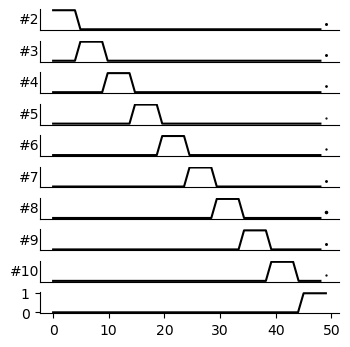

In [8]:
from GLM_regression import *
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 10,
                     'axes.spines.right': False,
                     'axes.spines.top': False,
                     'legend.frameon': False})

# filepath = "SSTindivsomata_GLM.mat"
filepath = "NDNFindivsomata_GLM.mat"

reorganized_data, variable_list = load_data(filepath)
print(f"variable_list: {variable_list}")

def plot_example_neuron_vars_removed(reorganized_data, variable_list, neuron='best', animal='best', model_name=None):

    GLM_params = {}

    if animal == 'best' or neuron == 'best':
        best_R2 = -np.inf
        best_animal = None
        best_neuron = None
        for animal_key in reorganized_data:
            GLM_params[animal_key] = {}
            for i, neuron_data in enumerate(reorganized_data[animal_key]):
                # Prepare data and train GLM
                neuron_data = reorganized_data[animal_key][i][:, :, 1:]
                neuron_data = neuron_data[:, :, ~np.isnan(neuron_data).any(axis=(0, 1))]

                # Manually select the columns corresponding to spatial bins
                spatial_bin_indices = list(range(4, 14))  # Assuming these indices correspond to #1 to #10
                neuron_data_filtered = neuron_data[:, spatial_bin_indices, :]

                # Print to verify data and indices
                print(f"Selected spatial_bin_indices: {spatial_bin_indices}")
                print(f"Filtered data shape: {neuron_data_filtered.shape}")

                # Apply min-max normalization to all variables, including neuron activity
                min_val = np.min(neuron_data, axis=(0, 2), keepdims=True)
                max_val = np.max(neuron_data, axis=(0, 2), keepdims=True)
                neuron_data = (neuron_data - min_val) / (max_val - min_val)

                flattened_data_filtered = []
                for j in range(neuron_data_filtered.shape[1]):
                    flattened_data_filtered.append(neuron_data_filtered[:, j].flatten())

                flattened_data_filtered = np.stack(flattened_data_filtered, axis=1)

                # Combine min-max normalized neuron activity with other min-max normalized features
                flattened_data_filtered = np.column_stack((neuron_data[:, 0, :].flatten(), flattened_data_filtered))

                # Check for NaNs and remove rows with NaNs
                if np.isnan(flattened_data_filtered).any():
                    print("nans in flattened_data_filtered")
                    continue

                # Ensure that the design matrix has at least one feature
                if flattened_data_filtered.shape[1] <= 1:
                    print("No features available after preprocessing")
                    continue

                # Flatten neuron_activity to match the shape of predicted_activity
                neuron_activity_flattened = neuron_data[:, 0, :].flatten()

                # Train GLM using filtered data
                design_matrix_X = flattened_data_filtered[:, 1:]  # Use filtered variables (skip the first column)
                neuron_activity_flattened = flattened_data_filtered[:, 0]  # Neuron activity as the dependent variable
                model = RidgeCV(alphas=[0.1, 1, 10, 100, 1000, 5000], cv=None)
                model.fit(design_matrix_X, neuron_activity_flattened)

                # Predict activity
                predicted_activity = model.predict(design_matrix_X)

                # Normalize the predicted activity for fair comparison
                predicted_activity = (predicted_activity - np.min(predicted_activity)) / (np.max(predicted_activity) - np.min(predicted_activity))

                # Calculate R² and Pearson correlation
                R2 = model.score(design_matrix_X, neuron_activity_flattened)
                pearson_R = np.corrcoef(predicted_activity, neuron_activity_flattened)[0, 1]

                GLM_params[animal_key][i] = {
                    'weights': model.coef_,
                    'intercept': model.intercept_,
                    'R2': R2,  # Store the R² value
                    'R2_trialavg': pearson_R ** 2,
                    'model': model
                }

                if R2 > best_R2:
                    best_R2 = R2
                    best_animal = animal_key
                    best_neuron = i

        animal = best_animal
        neuron = best_neuron

        weights = GLM_params[animal][neuron]['weights']
        print(f" shape neuron_data_filtered {neuron_data_filtered.shape}")
        print(f"weights shape: {weights.shape}")

        fig = plt.figure(figsize=(10, 8))
        axes = gs.GridSpec(nrows=1, ncols=1, left=0, right=0.3, bottom=0.5)
        ax = fig.add_subplot(axes[0])
        ax.axis('off')

        # Calculate the average of the selected subset variables
        avg_variables = np.mean(neuron_data_filtered, axis=2)

        # Ensure that the number of spatial_bin_labels matches the number of variables in avg_variables
        spatial_bin_labels = [f"#{i}" for i in range(1, avg_variables.shape[1] + 1)]

        # Plot the data
        plot_example_neuron_variables(avg_variables, spatial_bin_labels, ax=ax, weights=weights)

    axes = gs.GridSpec(nrows=1, ncols=1, left=0.3, right=0.54, bottom=0.5)
    ax = fig.add_subplot(axes[0])
    ax.axis('off')
    y1 = np.linspace(-0.54, -1.86, 3).tolist()
    y2 = np.linspace(-2.28, -6, 10).tolist()
    y = y1 + y2
    w_max = np.max(np.abs(weights))
    for i, w in enumerate(weights):
        if abs(w) < 0.05:
            line, = ax.plot([0, 1], [y[i], -3.4], color='lightgray', linestyle='--', linewidth=1)
        elif w < 0:
            line, = ax.plot([0, 1], [y[i], -3.4], color='deepskyblue', linewidth=abs(w/w_max) * 4)
        else:
            line, = ax.plot([0, 1], [y[i], -3.4], color='black', linewidth=abs(w/w_max) * 4)
        line.set_solid_capstyle('round')
    ax.set_ylim([-6, 0])
    ax.plot([0, 0], [0, 0], color='lightgray', linewidth=1.1, linestyle='--', label='Small weights')
    ax.plot([0, 0], [0, 0], color='deepskyblue', linewidth=1.1, label='Negative weights')
    ax.plot([0, 0], [0, 0], color='black', linewidth=1.1, label='Positive weights')
    ax.legend(fontsize=10, loc='upper right', frameon=False, handlelength=1.5, handletextpad=0.5, labelspacing=0.2, borderpad=0)

    glm_model = GLM_params[animal][neuron]['model']
    flattened_input_variables = flattened_data_filtered[:, 1:]
    predicted_activity = glm_model.predict(flattened_input_variables)

    # Apply min-max normalization to the predicted activity again for consistency
    predicted_activity = (predicted_activity - np.min(predicted_activity)) / (np.max(predicted_activity) - np.min(predicted_activity))

    # Ensure the neuron activity is normalized too
    neuron_activity = neuron_data[:, 0, :]

    # Reshape activities for averaging
    predicted_activity = predicted_activity.reshape(neuron_activity.shape)
    avg_predicted_activity = np.mean(predicted_activity, axis=1)
    std_predicted_activity = np.std(predicted_activity, axis=1)
    sem_predicted_activity = std_predicted_activity / np.sqrt(predicted_activity.shape[1])

    avg_neuron_activity = np.mean(neuron_activity, axis=1)
    std_neuron_activity = np.std(neuron_activity, axis=1)
    sem_neuron_activity = std_neuron_activity / np.sqrt(neuron_activity.shape[1])

    pearson_R = np.corrcoef(avg_predicted_activity, avg_neuron_activity)[0, 1]
    print("pearson R2 average:", pearson_R ** 2)

    axes = gs.GridSpec(nrows=1, ncols=1, left=0.61, right=1, top=0.8, bottom=0.55)
    ax = fig.add_subplot(axes[0])
    ax.plot(avg_predicted_activity, label='GLM prediction', c='gray', linestyle='--')
    ax.plot(avg_neuron_activity, label='Actual activity', c='k')
    ax.fill_between(np.arange(avg_neuron_activity.shape[0]), avg_neuron_activity-sem_neuron_activity, avg_neuron_activity+sem_neuron_activity, alpha=0.1, color='k')
    ax.fill_between(np.arange(avg_predicted_activity.shape[0]), avg_predicted_activity-sem_predicted_activity, avg_predicted_activity+sem_predicted_activity, alpha=0.1, color='gray')
    ax.set_xlabel("Position")
    ax.set_xticks([0, 50])
    ax.set_ylabel("dF/F activity (Min-Max Scaled)")
    ax.legend(loc='upper right', bbox_to_anchor=(1, 1.2))

    axes = gs.GridSpec(nrows=1, ncols=1, top=0.45, bottom=0.2, left=0.3, right=1)
    ax = fig.add_subplot(axes[0])

    def plot_GLM_summary_data(GLM_params, keep_vars_list, vars_to_remove, ax):
        jitter = 0.1  # Jitter for better visualization

        animal_averages = []

        for animal_key in GLM_params:
            neuron_weights = []
            for neuron_nr in GLM_params[animal_key]:
                weights = GLM_params[animal_key][neuron_nr]['weights']
                variable_indices = np.arange(len(weights))  # Length of weights, not variable_list[vars_to_remove:]

                # Add jitter to x-axis for better visualization
                jittered_x = variable_indices + np.random.uniform(-jitter, jitter, len(weights))
                ax.scatter(jittered_x, weights, color='grey', alpha=0.2, s=10)

                neuron_weights.append(weights)

            # Calculate the mean weights for each animal
            neuron_weights = np.array(neuron_weights)
            mean_weights = np.mean(neuron_weights, axis=0)
            animal_averages.append(mean_weights)
            print(f" len(keep_vars_list): {len(keep_vars_list)} len(mean_weights) {len(mean_weights)}")
            ax.scatter(range(len(keep_vars_list)), mean_weights, color='black', label=f'Animal {animal_key}', s=20)

        # Calculate and plot the global mean (mean of all animals' means)
        animal_averages = np.array(animal_averages)
        global_mean = np.mean(animal_averages, axis=0)
        global_std = np.std(animal_averages, axis=0)
        ax.errorbar(np.arange(len(keep_vars_list)) - 0.15, global_mean, yerr=global_std, fmt='o', color='red', ecolor='red', capsize=5, label='Average of all animals', markersize=7)

        # Configure x-axis labels and other plot settings
        ax.set_xticks(np.arange(len(keep_vars_list)))
        ax.set_xticklabels(keep_vars_list, rotation=45, ha='right')
        ax.set_ylabel('Weights')
        ax.hlines(0, -0.5, len(weights) - 0.5, linestyles='--', color='black', alpha=0.5)
        ax.set_xlim([-0.5, len(weights) - 0.5])

    plot_GLM_summary_data(GLM_params, spatial_bin_labels, [], ax)

    axes = gs.GridSpec(nrows=1, ncols=1, top=0.45, bottom=0.2, left=0., right=0.2)
    ax = fig.add_subplot(axes[0])
    plot_R2_distribution(GLM_params, ax=ax)

    if model_name is not None:
        fig.savefig(f"figures/GLM_regression_{model_name}_{animal}_{neuron}.png", bbox_inches='tight', dpi=300)


# Run the function
plot_example_neuron_vars_removed(reorganized_data, variable_list, neuron='best', animal='best', model_name=None)


variable_list: ['Activity', 'Licks', 'R_loc', 'Speed', '#1', '#2', '#3', '#4', '#5', '#6', '#7', '#8', '#9', '#10']
shape neuron_data_filtered (50, 10, 390)
weights shape: (10,)


IndexError: list index out of range

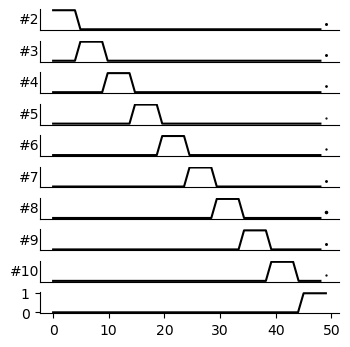

In [10]:
from GLM_regression import *
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 10,
                     'axes.spines.right': False,
                     'axes.spines.top': False,
                     'legend.frameon': False})

# Load data
filepath = "NDNFindivsomata_GLM.mat"
reorganized_data, variable_list = load_data(filepath)
print(f"variable_list: {variable_list}")

def plot_example_neuron_vars_removed(reorganized_data, variable_list, neuron='best', animal='best', model_name=None):
    GLM_params = {}

    if animal == 'best' or neuron == 'best':
        best_R2 = -np.inf
        best_animal = None
        best_neuron = None
        for animal_key in reorganized_data:
            GLM_params[animal_key] = {}
            for i, neuron_data in enumerate(reorganized_data[animal_key]):
                neuron_data = reorganized_data[animal_key][i][:, :, 1:]  # Remove the 0th index (neuron activity)
                neuron_data = neuron_data[:, :, ~np.isnan(neuron_data).any(axis=(0, 1))]

                # Hardcode indices to remove: 0th for activity, next 3 for Licks, R_loc, Speed
                indices_to_remove = [0, 1, 2, 3]
                remaining_indices = list(range(4, neuron_data.shape[1]))

                # Filter the data to keep only the remaining indices (which represent position)
                neuron_data_filtered = neuron_data[:, remaining_indices, :]

                min_val = np.min(neuron_data, axis=(0, 2), keepdims=True)
                max_val = np.max(neuron_data, axis=(0, 2), keepdims=True)
                neuron_data = (neuron_data - min_val) / (max_val - min_val)

                flattened_data_filtered = []
                for j in range(neuron_data_filtered.shape[1]):
                    flattened_data_filtered.append(neuron_data_filtered[:, j].flatten())

                flattened_data_filtered = np.stack(flattened_data_filtered, axis=1)

                # Combine normalized neuron activity with filtered features
                flattened_data_filtered = np.column_stack((neuron_data[:, 0, :].flatten(), flattened_data_filtered))

                if np.isnan(flattened_data_filtered).any():
                    print("nans in flattened_data_filtered")
                    continue

                if flattened_data_filtered.shape[1] <= 1:
                    print("No features available after preprocessing")
                    continue

                neuron_activity_flattened = neuron_data[:, 0, :].flatten()

                # Train GLM using only the position data
                design_matrix_X = flattened_data_filtered[:, 1:]  # Use filtered variables (skip the first column)
                neuron_activity_flattened = flattened_data_filtered[:, 0]
                model = RidgeCV(alphas=[0.1, 1, 10, 100, 1000, 5000], cv=None)
                model.fit(design_matrix_X, neuron_activity_flattened)

                predicted_activity = model.predict(design_matrix_X)
                predicted_activity = (predicted_activity - np.min(predicted_activity)) / (np.max(predicted_activity) - np.min(predicted_activity))

                R2 = model.score(design_matrix_X, neuron_activity_flattened)
                pearson_R = np.corrcoef(predicted_activity, neuron_activity_flattened)[0, 1]

                GLM_params[animal_key][i] = {
                    'weights': model.coef_,
                    'intercept': model.intercept_,
                    'R2': R2,
                    'R2_trialavg': pearson_R ** 2,
                    'model': model
                }

                if R2 > best_R2:
                    best_R2 = R2
                    best_animal = animal_key
                    best_neuron = i

        animal = best_animal
        neuron = best_neuron

        weights = GLM_params[animal][neuron]['weights']
        print(f"shape neuron_data_filtered {neuron_data_filtered.shape}")
        print(f"weights shape: {weights.shape}")

        fig = plt.figure(figsize=(10, 8))
        axes = gs.GridSpec(nrows=1, ncols=1, left=0, right=0.3, bottom=0.5)
        ax = fig.add_subplot(axes[0])
        ax.axis('off')

        # Calculate the average of the selected subset variables (position bins)
        avg_variables = np.mean(neuron_data_filtered, axis=2)

        # Generate labels for the position bins
        spatial_bin_labels = [f"#{i}" for i in range(1, avg_variables.shape[1] + 1)]

        # Plot the data
        plot_example_neuron_variables(avg_variables, spatial_bin_labels, ax=ax, weights=weights)

    axes = gs.GridSpec(nrows=1, ncols=1, left=0.3, right=0.54, bottom=0.5)
    ax = fig.add_subplot(axes[0])
    ax.axis('off')
    y1 = np.linspace(-0.54, -1.86, 3).tolist()
    y2 = np.linspace(-2.28, -6, 10).tolist()
    y = y1 + y2
    w_max = np.max(np.abs(weights))
    for i, w in enumerate(weights):
        if abs(w) < 0.05:
            line, = ax.plot([0, 1], [y[i], -3.4], color='lightgray', linestyle='--', linewidth=1)
        elif w < 0:
            line, = ax.plot([0, 1], [y[i], -3.4], color='deepskyblue', linewidth=abs(w/w_max) * 4)
        else:
            line, = ax.plot([0, 1], [y[i], -3.4], color='black', linewidth=abs(w/w_max) * 4)
        line.set_solid_capstyle('round')
    ax.set_ylim([-6, 0])
    ax.plot([0, 0], [0, 0], color='lightgray', linewidth=1.1, linestyle='--', label='Small weights')
    ax.plot([0, 0], [0, 0], color='deepskyblue', linewidth=1.1, label='Negative weights')
    ax.plot([0, 0], [0, 0], color='black', linewidth=1.1, label='Positive weights')
    ax.legend(fontsize=10, loc='upper right', frameon=False, handlelength=1.5, handletextpad=0.5, labelspacing=0.2, borderpad=0)

    glm_model = GLM_params[animal][neuron]['model']
    flattened_input_variables = flattened_data_filtered[:, 1:]
    predicted_activity = glm_model.predict(flattened_input_variables)

    predicted_activity = (predicted_activity - np.min(predicted_activity)) / (np.max(predicted_activity) - np.min(predicted_activity))

    neuron_activity = neuron_data[:, 0, :]

    predicted_activity = predicted_activity.reshape(neuron_activity.shape)
    avg_predicted_activity = np.mean(predicted_activity, axis=1)
    std_predicted_activity = np.std(predicted_activity, axis=1)
    sem_predicted_activity = std_predicted_activity / np.sqrt(predicted_activity.shape[1])

    avg_neuron_activity = np.mean(neuron_activity, axis=1)
    std_neuron_activity = np.std(neuron_activity, axis=1)
    sem_neuron_activity = std_neuron_activity / np.sqrt(neuron_activity.shape[1])

    pearson_R = np.corrcoef(avg_predicted_activity, avg_neuron_activity)[0, 1]
    print("pearson R2 average:", pearson_R ** 2)

    axes = gs.GridSpec(nrows=1, ncols=1, left=0.61, right=1, top=0.8, bottom=0.55)
    ax = fig.add_subplot(axes[0])
    ax.plot(avg_predicted_activity, label='GLM prediction', c='gray', linestyle='--')
    ax.plot(avg_neuron_activity, label='Actual activity', c='k')
    ax.fill_between(np.arange(avg_neuron_activity.shape[0]), avg_neuron_activity-sem_neuron_activity, avg_neuron_activity+sem_neuron_activity, alpha=0.1, color='k')
    ax.fill_between(np.arange(avg_predicted_activity.shape[0]), avg_predicted_activity-sem_predicted_activity, avg_predicted_activity+sem_predicted_activity, alpha=0.1, color='gray')
    ax.set_xlabel("Position")
    ax.set_xticks([0, 50])
    ax.set_ylabel("dF/F activity (Min-Max Scaled)")
    ax.legend(loc='upper right', bbox_to_anchor=(1, 1.2))

    axes = gs.GridSpec(nrows=1, ncols=1, top=0.45, bottom=0.2, left=0.3, right=1)
    ax = fig.add_subplot(axes[0])

    def plot_GLM_summary_data(GLM_params, spatial_bin_labels, ax):
        jitter = 0.1

        animal_averages = []

        for animal_key in GLM_params:
            neuron_weights = []
            for neuron_nr in GLM_params[animal_key]:
                weights = GLM_params[animal_key][neuron_nr]['weights']
                variable_indices = np.arange(len(weights))

                jittered_x = variable_indices + np.random.uniform(-jitter, jitter, len(weights))
                ax.scatter(jittered_x, weights, color='grey', alpha=0.2, s=10)

                neuron_weights.append(weights)

            neuron_weights = np.array(neuron_weights)
            mean_weights = np.mean(neuron_weights, axis=0)
            animal_averages.append(mean_weights)
            ax.scatter(range(len(spatial_bin_labels)), mean_weights, color='black', label=f'Animal {animal_key}', s=20)

        animal_averages = np.array(animal_averages)
        global_mean = np.mean(animal_averages, axis=0)
        global_std = np.std(animal_averages, axis=0)
        ax.errorbar(np.arange(len(spatial_bin_labels)) - 0.15, global_mean, yerr=global_std, fmt='o', color='red', ecolor='red', capsize=5, label='Average of all animals', markersize=7)

        ax.set_xticks(np.arange(len(spatial_bin_labels)))
        ax.set_xticklabels(spatial_bin_labels, rotation=45, ha='right')
        ax.set_ylabel('Weights')
        ax.hlines(0, -0.5, len(weights) - 0.5, linestyles='--', color='black', alpha=0.5)
        ax.set_xlim([-0.5, len(weights) - 0.5])

    plot_GLM_summary_data(GLM_params, spatial_bin_labels, ax)

    axes = gs.GridSpec(nrows=1, ncols=1, top=0.45, bottom=0.2, left=0., right=0.2)
    ax = fig.add_subplot(axes[0])
    plot_R2_distribution(GLM_params, ax=ax)

    if model_name is not None:
        fig.savefig(f"figures/GLM_regression_{model_name}_{animal}_{neuron}.png", bbox_inches='tight', dpi=300)


# Run the function
plot_example_neuron_vars_removed(reorganized_data, variable_list, neuron='best', animal='best', model_name=None)


variable_list: ['Activity', 'Licks', 'R_loc', 'Speed', '#1', '#2', '#3', '#4', '#5', '#6', '#7', '#8', '#9', '#10']
shape neuron_data_filtered (50, 10, 390)
weights shape: (10,)
  avg_variables shape (50, 10)
 spatial_bin_labels ['#1', '#2', '#3', '#4', '#5', '#6', '#7', '#8', '#9', '#10']


IndexError: list index out of range

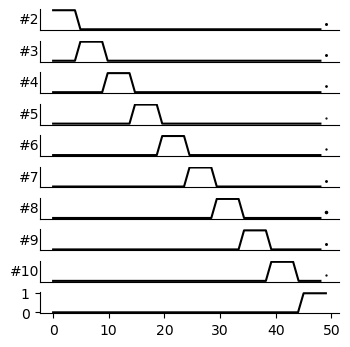

In [12]:
from GLM_regression import *
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 10,
                     'axes.spines.right': False,
                     'axes.spines.top': False,
                     'legend.frameon': False})

# Load data
filepath = "NDNFindivsomata_GLM.mat"
reorganized_data, variable_list = load_data(filepath)
print(f"variable_list: {variable_list}")

def plot_example_neuron_vars_removed(reorganized_data, variable_list, neuron='best', animal='best', model_name=None):
    GLM_params = {}

    if animal == 'best' or neuron == 'best':
        best_R2 = -np.inf
        best_animal = None
        best_neuron = None
        for animal_key in reorganized_data:
            GLM_params[animal_key] = {}
            for i, neuron_data in enumerate(reorganized_data[animal_key]):
                neuron_data = reorganized_data[animal_key][i][:, :, 1:]  # Remove the 0th index (neuron activity)
                neuron_data = neuron_data[:, :, ~np.isnan(neuron_data).any(axis=(0, 1))]

                # Hardcode indices to remove: 0th for activity, next 3 for Licks, R_loc, Speed
                indices_to_remove = [0, 1, 2, 3]
                remaining_indices = list(range(4, neuron_data.shape[1]))

                # Filter the data to keep only the remaining indices (which represent position)
                neuron_data_filtered = neuron_data[:, remaining_indices, :]

                min_val = np.min(neuron_data, axis=(0, 2), keepdims=True)
                max_val = np.max(neuron_data, axis=(0, 2), keepdims=True)
                neuron_data = (neuron_data - min_val) / (max_val - min_val)

                flattened_data_filtered = []
                for j in range(neuron_data_filtered.shape[1]):
                    flattened_data_filtered.append(neuron_data_filtered[:, j].flatten())

                flattened_data_filtered = np.stack(flattened_data_filtered, axis=1)

                # Combine normalized neuron activity with filtered features
                flattened_data_filtered = np.column_stack((neuron_data[:, 0, :].flatten(), flattened_data_filtered))

                if np.isnan(flattened_data_filtered).any():
                    print("nans in flattened_data_filtered")
                    continue

                if flattened_data_filtered.shape[1] <= 1:
                    print("No features available after preprocessing")
                    continue

                neuron_activity_flattened = neuron_data[:, 0, :].flatten()

                # Train GLM using only the position data
                design_matrix_X = flattened_data_filtered[:, 1:]  # Use filtered variables (skip the first column)
                neuron_activity_flattened = flattened_data_filtered[:, 0]
                model = RidgeCV(alphas=[0.1, 1, 10, 100, 1000, 5000], cv=None)
                model.fit(design_matrix_X, neuron_activity_flattened)

                predicted_activity = model.predict(design_matrix_X)
                predicted_activity = (predicted_activity - np.min(predicted_activity)) / (np.max(predicted_activity) - np.min(predicted_activity))

                R2 = model.score(design_matrix_X, neuron_activity_flattened)
                pearson_R = np.corrcoef(predicted_activity, neuron_activity_flattened)[0, 1]

                GLM_params[animal_key][i] = {
                    'weights': model.coef_,
                    'intercept': model.intercept_,
                    'R2': R2,
                    'R2_trialavg': pearson_R ** 2,
                    'model': model
                }

                if R2 > best_R2:
                    best_R2 = R2
                    best_animal = animal_key
                    best_neuron = i

        animal = best_animal
        neuron = best_neuron

        weights = GLM_params[animal][neuron]['weights']
        print(f"shape neuron_data_filtered {neuron_data_filtered.shape}")
        print(f"weights shape: {weights.shape}")

        fig = plt.figure(figsize=(10, 8))
        axes = gs.GridSpec(nrows=1, ncols=1, left=0, right=0.3, bottom=0.5)
        ax = fig.add_subplot(axes[0])
        ax.axis('off')

        # Calculate the average of the selected subset variables (position bins)
        avg_variables = np.mean(neuron_data_filtered, axis=2)
        print(f"  avg_variables shape {avg_variables.shape}")

        # Generate labels for the position bins
        spatial_bin_labels = [f"#{i}" for i in range(1, avg_variables.shape[1] + 1)]
        print(f" spatial_bin_labels {spatial_bin_labels}")
        if len(spatial_bin_labels) != avg_variables.shape[1]:
            raise ValueError("Mismatch between number of spatial bin labels and the shape of avg_variables")

        # Plot the data
        plot_example_neuron_variables(avg_variables, spatial_bin_labels, ax=ax, weights=weights)

    axes = gs.GridSpec(nrows=1, ncols=1, left=0.3, right=0.54, bottom=0.5)
    ax = fig.add_subplot(axes[0])
    ax.axis('off')
    y1 = np.linspace(-0.54, -1.86, 3).tolist()
    y2 = np.linspace(-2.28, -6, 10).tolist()
    y = y1 + y2
    w_max = np.max(np.abs(weights))
    for i, w in enumerate(weights):
        if abs(w) < 0.05:
            line, = ax.plot([0, 1], [y[i], -3.4], color='lightgray', linestyle='--', linewidth=1)
        elif w < 0:
            line, = ax.plot([0, 1], [y[i], -3.4], color='deepskyblue', linewidth=abs(w/w_max) * 4)
        else:
            line, = ax.plot([0, 1], [y[i], -3.4], color='black', linewidth=abs(w/w_max) * 4)
        line.set_solid_capstyle('round')
    ax.set_ylim([-6, 0])
    ax.plot([0, 0], [0, 0], color='lightgray', linewidth=1.1, linestyle='--', label='Small weights')
    ax.plot([0, 0], [0, 0], color='deepskyblue', linewidth=1.1, label='Negative weights')
    ax.plot([0, 0], [0, 0], color='black', linewidth=1.1, label='Positive weights')
    ax.legend(fontsize=10, loc='upper right', frameon=False, handlelength=1.5, handletextpad=0.5, labelspacing=0.2, borderpad=0)

    glm_model = GLM_params[animal][neuron]['model']
    flattened_input_variables = flattened_data_filtered[:, 1:]
    predicted_activity = glm_model.predict(flattened_input_variables)

    predicted_activity = (predicted_activity - np.min(predicted_activity)) / (np.max(predicted_activity) - np.min(predicted_activity))

    neuron_activity = neuron_data[:, 0, :]

    predicted_activity = predicted_activity.reshape(neuron_activity.shape)
    avg_predicted_activity = np.mean(predicted_activity, axis=1)
    std_predicted_activity = np.std(predicted_activity, axis=1)
    sem_predicted_activity = std_predicted_activity / np.sqrt(predicted_activity.shape[1])

    avg_neuron_activity = np.mean(neuron_activity, axis=1)
    std_neuron_activity = np.std(neuron_activity, axis=1)
    sem_neuron_activity = std_neuron_activity / np.sqrt(neuron_activity.shape[1])

    pearson_R = np.corrcoef(avg_predicted_activity, avg_neuron_activity)[0, 1]
    print("pearson R2 average:", pearson_R ** 2)

    axes = gs.GridSpec(nrows=1, ncols=1, left=0.61, right=1, top=0.8, bottom=0.55)
    ax = fig.add_subplot(axes[0])
    ax.plot(avg_predicted_activity, label='GLM prediction', c='gray', linestyle='--')
    ax.plot(avg_neuron_activity, label='Actual activity', c='k')
    ax.fill_between(np.arange(avg_neuron_activity.shape[0]), avg_neuron_activity-sem_neuron_activity, avg_neuron_activity+sem_neuron_activity, alpha=0.1, color='k')
    ax.fill_between(np.arange(avg_predicted_activity.shape[0]), avg_predicted_activity-sem_predicted_activity, avg_predicted_activity+sem_predicted_activity, alpha=0.1, color='gray')
    ax.set_xlabel("Position")
    ax.set_xticks([0, 50])
    ax.set_ylabel("dF/F activity (Min-Max Scaled)")
    ax.legend(loc='upper right', bbox_to_anchor=(1, 1.2))

    axes = gs.GridSpec(nrows=1, ncols=1, top=0.45, bottom=0.2, left=0.3, right=1)
    ax = fig.add_subplot(axes[0])

    def plot_GLM_summary_data(GLM_params, spatial_bin_labels, ax):
        jitter = 0.1

        animal_averages = []

        for animal_key in GLM_params:
            neuron_weights = []
            for neuron_nr in GLM_params[animal_key]:
                weights = GLM_params[animal_key][neuron_nr]['weights']
                variable_indices = np.arange(len(weights))

                jittered_x = variable_indices + np.random.uniform(-jitter, jitter, len(weights))
                ax.scatter(jittered_x, weights, color='grey', alpha=0.2, s=10)

                neuron_weights.append(weights)

            neuron_weights = np.array(neuron_weights)
            mean_weights = np.mean(neuron_weights, axis=0)
            animal_averages.append(mean_weights)
            ax.scatter(range(len(spatial_bin_labels)), mean_weights, color='black', label=f'Animal {animal_key}', s=20)

        animal_averages = np.array(animal_averages)
        global_mean = np.mean(animal_averages, axis=0)
        global_std = np.std(animal_averages, axis=0)
        ax.errorbar(np.arange(len(spatial_bin_labels)) - 0.15, global_mean, yerr=global_std, fmt='o', color='red', ecolor='red', capsize=5, label='Average of all animals', markersize=7)

        ax.set_xticks(np.arange(len(spatial_bin_labels)))
        ax.set_xticklabels(spatial_bin_labels, rotation=45, ha='right')
        ax.set_ylabel('Weights')
        ax.hlines(0, -0.5, len(weights) - 0.5, linestyles='--', color='black', alpha=0.5)
        ax.set_xlim([-0.5, len(weights) - 0.5])

    plot_GLM_summary_data(GLM_params, spatial_bin_labels, ax)

    axes = gs.GridSpec(nrows=1, ncols=1, top=0.45, bottom=0.2, left=0., right=0.2)
    ax = fig.add_subplot(axes[0])
    plot_R2_distribution(GLM_params, ax=ax)

    if model_name is not None:
        fig.savefig(f"figures/GLM_regression_{model_name}_{animal}_{neuron}.png", bbox_inches='tight', dpi=300)

# Run the function
plot_example_neuron_vars_removed(reorganized_data, variable_list, neuron='best', animal='best', model_name=None)


variable_list: ['Activity', 'Licks', 'R_loc', 'Speed', '#1', '#2', '#3', '#4', '#5', '#6', '#7', '#8', '#9', '#10']
shape neuron_data_filtered (50, 10, 390)
weights shape: (10,)
  avg_variables shape (50, 10)
 spatial_bin_labels ['#1', '#2', '#3', '#4', '#5', '#6', '#7', '#8', '#9', '#10']
pearson R2 average: 0.21612695024769765


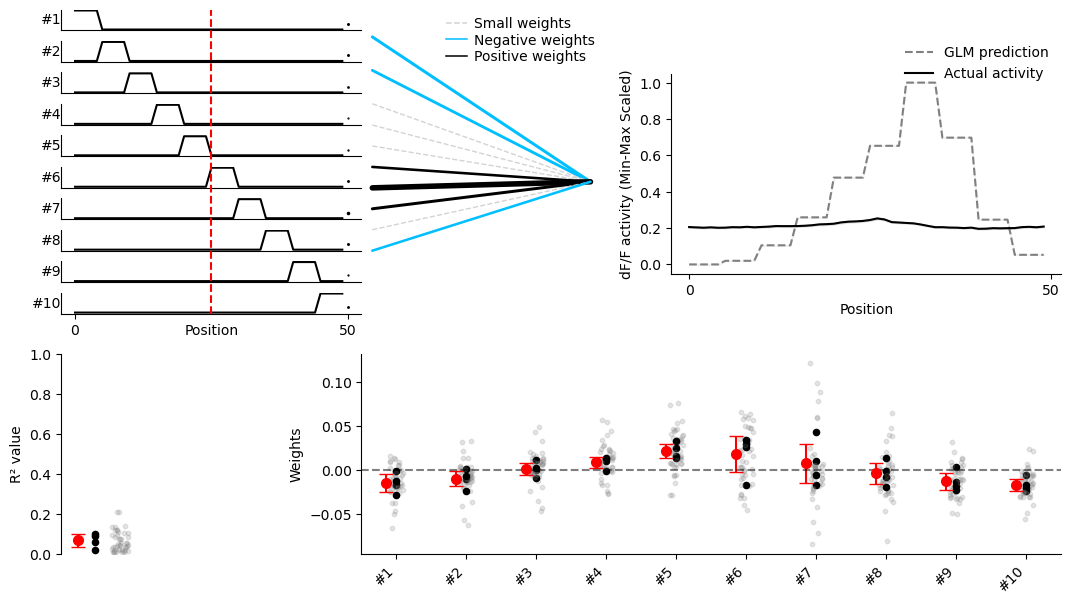

In [17]:
from GLM_regression import *
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 10,
                     'axes.spines.right': False,
                     'axes.spines.top': False,
                     'legend.frameon': False})

# Load data
filepath = "NDNFindivsomata_GLM.mat"
reorganized_data, variable_list = load_data(filepath)
print(f"variable_list: {variable_list}")

def plot_example_neuron_vars_removed(reorganized_data, variable_list, neuron='best', animal='best', model_name=None):
    GLM_params = {}

    if animal == 'best' or neuron == 'best':
        best_R2 = -np.inf
        best_animal = None
        best_neuron = None
        for animal_key in reorganized_data:
            GLM_params[animal_key] = {}
            for i, neuron_data in enumerate(reorganized_data[animal_key]):
                neuron_data = reorganized_data[animal_key][i][:, :, 1:]  # Remove the 0th index (neuron activity)
                neuron_data = neuron_data[:, :, ~np.isnan(neuron_data).any(axis=(0, 1))]

                # Hardcode indices to remove: 0th for activity, next 3 for Licks, R_loc, Speed
                indices_to_remove = [0, 1, 2, 4]
                remaining_indices = list(range(4, neuron_data.shape[1]))

                # Filter the data to keep only the remaining indices (which represent position)
                neuron_data_filtered = neuron_data[:, remaining_indices, :]

                min_val = np.min(neuron_data, axis=(0, 2), keepdims=True)
                max_val = np.max(neuron_data, axis=(0, 2), keepdims=True)
                neuron_data = (neuron_data - min_val) / (max_val - min_val)

                flattened_data_filtered = []
                for j in range(neuron_data_filtered.shape[1]):
                    flattened_data_filtered.append(neuron_data_filtered[:, j].flatten())

                flattened_data_filtered = np.stack(flattened_data_filtered, axis=1)

                # Combine normalized neuron activity with filtered features
                flattened_data_filtered = np.column_stack((neuron_data[:, 0, :].flatten(), flattened_data_filtered))

                if np.isnan(flattened_data_filtered).any():
                    print("nans in flattened_data_filtered")
                    continue

                if flattened_data_filtered.shape[1] <= 1:
                    print("No features available after preprocessing")
                    continue

                neuron_activity_flattened = neuron_data[:, 0, :].flatten()

                # Train GLM using only the position data
                design_matrix_X = flattened_data_filtered[:, 1:]  # Use filtered variables (skip the first column)
                neuron_activity_flattened = flattened_data_filtered[:, 0]
                model = RidgeCV(alphas=[0.1, 1, 10, 100, 1000, 5000], cv=None)
                model.fit(design_matrix_X, neuron_activity_flattened)

                predicted_activity = model.predict(design_matrix_X)
                predicted_activity = (predicted_activity - np.min(predicted_activity)) / (np.max(predicted_activity) - np.min(predicted_activity))

                R2 = model.score(design_matrix_X, neuron_activity_flattened)
                pearson_R = np.corrcoef(predicted_activity, neuron_activity_flattened)[0, 1]

                GLM_params[animal_key][i] = {
                    'weights': model.coef_,
                    'intercept': model.intercept_,
                    'R2': R2,
                    'R2_trialavg': pearson_R ** 2,
                    'model': model
                }

                if R2 > best_R2:
                    best_R2 = R2
                    best_animal = animal_key
                    best_neuron = i

        animal = best_animal
        neuron = best_neuron

        weights = GLM_params[animal][neuron]['weights']
        print(f"shape neuron_data_filtered {neuron_data_filtered.shape}")
        print(f"weights shape: {weights.shape}")

        fig = plt.figure(figsize=(10, 8))
        axes = gs.GridSpec(nrows=1, ncols=1, left=0, right=0.3, bottom=0.5)
        ax = fig.add_subplot(axes[0])
        ax.axis('off')

        # Calculate the average of the selected subset variables (position bins)
        avg_variables = np.mean(neuron_data_filtered, axis=2)
        print(f"  avg_variables shape {avg_variables.shape}")

        # Generate labels for the position bins
        spatial_bin_labels = [f"#{i}" for i in range(1, avg_variables.shape[1] + 1)]
        print(f" spatial_bin_labels {spatial_bin_labels}")
        if len(spatial_bin_labels) != avg_variables.shape[1]:
            raise ValueError("Mismatch between number of spatial bin labels and the shape of avg_variables")
            
        def plotting_example_neuron_variables(avg_variables, keep_vars_list, ax, weights=None):
            fig = ax.get_figure()

            # Define height ratios for each variable subplot
            height_ratios = np.ones(len(keep_vars_list))

            # Set up the grid for subplots
            axes = gs.GridSpecFromSubplotSpec(nrows=len(keep_vars_list), ncols=1, subplot_spec=ax, hspace=0.5, height_ratios=height_ratios)

            # Iterate through the variables and plot each one
            for i in range(len(keep_vars_list)):
                sub_ax = fig.add_subplot(axes[i])
                sub_ax.plot(avg_variables[:, i], color='k')  # Ensure correct indexing to plot the right variable

                # Set labels and ticks
                sub_ax.set_ylabel(keep_vars_list[i], rotation=0, ha='right', va='center', labelpad=0)
                sub_ax.set_xticks([])
                sub_ax.set_yticks([])

                # Plot weights as scatter points if provided
                if weights is not None:
                    sub_ax.scatter([50], [0.3], c='k', s=abs(weights[i]) * 20)

            # Set x-axis labels for the bottom plot
            sub_ax.set_xlabel('Position', labelpad=-10)
            sub_ax.set_xticks([0, 50])

            # Draw vertical line across all plots (for visual separation)
            overlay_ax = fig.add_subplot(axes[:])
            overlay_ax.vlines(24.5, 0, 1, linestyles='--', color='r')
            overlay_ax.set_xlim([0, 49])
            overlay_ax.set_ylim([0, 1])
            overlay_ax.axis('off')
            overlay_ax.patch.set_alpha(0)

        # Plot the data
        plotting_example_neuron_variables(avg_variables, spatial_bin_labels, ax=ax, weights=weights)

        
#         def plotting_example_neuron_variables(avg_variables, keep_vars_list, ax, weights=None):
#             fig = ax.get_figure()

#             # Define height ratios for each variable subplot
#             height_ratios = np.ones(len(keep_vars_list))
#             height_ratios[-10:] = 0.5  # Adjust the height for the last 10 variables (spatial bins)

#             # Set up the grid for subplots
#             axes = gs.GridSpecFromSubplotSpec(nrows=len(keep_vars_list), ncols=1, subplot_spec=ax, hspace=0.5, height_ratios=height_ratios)

#             # Iterate through the variables and plot each one
#             for i in range(len(keep_vars_list)):
#                 sub_ax = fig.add_subplot(axes[i])
#                 sub_ax.plot(avg_variables[:, i], color='k')  # Ensure correct indexing to plot the right variable

#                 # Set labels and ticks
#                 sub_ax.set_ylabel(keep_vars_list[i], rotation=0, ha='right', va='center', labelpad=0)
#                 sub_ax.set_xticks([])
#                 sub_ax.set_yticks([])

#                 # Plot weights as scatter points if provided
#                 if weights is not None:
#                     sub_ax.scatter([50], [0.3], c='k', s=abs(weights[i]) * 20)

#             # Set x-axis labels for the bottom plot
#             sub_ax.set_xlabel('Position', labelpad=-10)
#             sub_ax.set_xticks([0, 50])

#             # Draw vertical line across all plots (for visual separation)
#             overlay_ax = fig.add_subplot(axes[:])
#             overlay_ax.vlines(24.5, 0, 1, linestyles='--', color='r')
#             overlay_ax.set_xlim([0, 49])
#             overlay_ax.set_ylim([0, 1])
#             overlay_ax.axis('off')
#             overlay_ax.patch.set_alpha(0)
            
# #         plotting_example_neuron_variables(avg_variables, keep_vars_list, ax, weights=None)

#         # Plot the data
#         plot_example_neuron_variables(avg_variables, spatial_bin_labels, ax=ax, weights=weights)

    axes = gs.GridSpec(nrows=1, ncols=1, left=0.3, right=0.54, bottom=0.5)
    ax = fig.add_subplot(axes[0])
    ax.axis('off')
    y1 = np.linspace(-0.54, -1.86, 3).tolist()
    y2 = np.linspace(-2.28, -6, 10).tolist()
    y = y1 + y2
    w_max = np.max(np.abs(weights))
    for i, w in enumerate(weights):
        if abs(w) < 0.05:
            line, = ax.plot([0, 1], [y[i], -3.4], color='lightgray', linestyle='--', linewidth=1)
        elif w < 0:
            line, = ax.plot([0, 1], [y[i], -3.4], color='deepskyblue', linewidth=abs(w/w_max) * 4)
        else:
            line, = ax.plot([0, 1], [y[i], -3.4], color='black', linewidth=abs(w/w_max) * 4)
        line.set_solid_capstyle('round')
    ax.set_ylim([-6, 0])
    ax.plot([0, 0], [0, 0], color='lightgray', linewidth=1.1, linestyle='--', label='Small weights')
    ax.plot([0, 0], [0, 0], color='deepskyblue', linewidth=1.1, label='Negative weights')
    ax.plot([0, 0], [0, 0], color='black', linewidth=1.1, label='Positive weights')
    ax.legend(fontsize=10, loc='upper right', frameon=False, handlelength=1.5, handletextpad=0.5, labelspacing=0.2, borderpad=0)

    glm_model = GLM_params[animal][neuron]['model']
    flattened_input_variables = flattened_data_filtered[:, 1:]
    predicted_activity = glm_model.predict(flattened_input_variables)

    predicted_activity = (predicted_activity - np.min(predicted_activity)) / (np.max(predicted_activity) - np.min(predicted_activity))

    neuron_activity = neuron_data[:, 0, :]

    predicted_activity = predicted_activity.reshape(neuron_activity.shape)
    avg_predicted_activity = np.mean(predicted_activity, axis=1)
    std_predicted_activity = np.std(predicted_activity, axis=1)
    sem_predicted_activity = std_predicted_activity / np.sqrt(predicted_activity.shape[1])

    avg_neuron_activity = np.mean(neuron_activity, axis=1)
    std_neuron_activity = np.std(neuron_activity, axis=1)
    sem_neuron_activity = std_neuron_activity / np.sqrt(neuron_activity.shape[1])

    pearson_R = np.corrcoef(avg_predicted_activity, avg_neuron_activity)[0, 1]
    print("pearson R2 average:", pearson_R ** 2)

    axes = gs.GridSpec(nrows=1, ncols=1, left=0.61, right=1, top=0.8, bottom=0.55)
    ax = fig.add_subplot(axes[0])
    ax.plot(avg_predicted_activity, label='GLM prediction', c='gray', linestyle='--')
    ax.plot(avg_neuron_activity, label='Actual activity', c='k')
    ax.fill_between(np.arange(avg_neuron_activity.shape[0]), avg_neuron_activity-sem_neuron_activity, avg_neuron_activity+sem_neuron_activity, alpha=0.1, color='k')
    ax.fill_between(np.arange(avg_predicted_activity.shape[0]), avg_predicted_activity-sem_predicted_activity, avg_predicted_activity+sem_predicted_activity, alpha=0.1, color='gray')
    ax.set_xlabel("Position")
    ax.set_xticks([0, 50])
    ax.set_ylabel("dF/F activity (Min-Max Scaled)")
    ax.legend(loc='upper right', bbox_to_anchor=(1, 1.2))

    axes = gs.GridSpec(nrows=1, ncols=1, top=0.45, bottom=0.2, left=0.3, right=1)
    ax = fig.add_subplot(axes[0])

    def plot_GLM_summary_data(GLM_params, spatial_bin_labels, ax):
        jitter = 0.1

        animal_averages = []

        for animal_key in GLM_params:
            neuron_weights = []
            for neuron_nr in GLM_params[animal_key]:
                weights = GLM_params[animal_key][neuron_nr]['weights']
                variable_indices = np.arange(len(weights))

                jittered_x = variable_indices + np.random.uniform(-jitter, jitter, len(weights))
                ax.scatter(jittered_x, weights, color='grey', alpha=0.2, s=10)

                neuron_weights.append(weights)

            neuron_weights = np.array(neuron_weights)
            mean_weights = np.mean(neuron_weights, axis=0)
            animal_averages.append(mean_weights)
            ax.scatter(range(len(spatial_bin_labels)), mean_weights, color='black', label=f'Animal {animal_key}', s=20)

        animal_averages = np.array(animal_averages)
        global_mean = np.mean(animal_averages, axis=0)
        global_std = np.std(animal_averages, axis=0)
        ax.errorbar(np.arange(len(spatial_bin_labels)) - 0.15, global_mean, yerr=global_std, fmt='o', color='red', ecolor='red', capsize=5, label='Average of all animals', markersize=7)

        ax.set_xticks(np.arange(len(spatial_bin_labels)))
        ax.set_xticklabels(spatial_bin_labels, rotation=45, ha='right')
        ax.set_ylabel('Weights')
        ax.hlines(0, -0.5, len(weights) - 0.5, linestyles='--', color='black', alpha=0.5)
        ax.set_xlim([-0.5, len(weights) - 0.5])

    plot_GLM_summary_data(GLM_params, spatial_bin_labels, ax)

    axes = gs.GridSpec(nrows=1, ncols=1, top=0.45, bottom=0.2, left=0., right=0.2)
    ax = fig.add_subplot(axes[0])
    plot_R2_distribution(GLM_params, ax=ax)

    if model_name is not None:
        fig.savefig(f"figures/GLM_regression_{model_name}_{animal}_{neuron}.png", bbox_inches='tight', dpi=300)


plot_example_neuron_vars_removed(reorganized_data, variable_list, neuron='best', animal='best', model_name=None)


In [36]:
from GLM_regression import *
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 10,
                     'axes.spines.right': False,
                     'axes.spines.top': False,
                     'legend.frameon': False})

# Load data
filepath = "NDNFindivsomata_GLM.mat"
reorganized_data, variable_list = load_data(filepath)
print(f"variable_list: {variable_list}")

def plot_example_neuron_vars_removed(reorganized_data, variable_list, neuron='best', animal='best', model_name=None):
    GLM_params = {}

    if animal == 'best' or neuron == 'best':
        best_R2 = -np.inf
        best_animal = None
        best_neuron = None
        for animal_key in reorganized_data:
            GLM_params[animal_key] = {}
            for i, neuron_data in enumerate(reorganized_data[animal_key]):
                neuron_data_full = reorganized_data[animal_key][i][:, :, 1:]  # Remove the 0th index (neuron activity)
                neuron_data_full = neuron_data_full[:, :, ~np.isnan(neuron_data_full).any(axis=(0, 1))]

                # Hardcode indices to remove for GLM: 0th for activity, next 3 for Licks, R_loc, Speed
                indices_to_remove = [0, 1, 2, 4]
                remaining_indices = list(range(4, neuron_data_full.shape[1]))

                # Filter the data to keep only the remaining indices (which represent position)
                neuron_data_filtered = neuron_data_full[:, remaining_indices, :]

                min_val = np.min(neuron_data_full, axis=(0, 2), keepdims=True)
                max_val = np.max(neuron_data_full, axis=(0, 2), keepdims=True)
                neuron_data_full = (neuron_data_full - min_val) / (max_val - min_val)

                flattened_data_filtered = []
                for j in range(neuron_data_filtered.shape[1]):
                    flattened_data_filtered.append(neuron_data_filtered[:, j].flatten())

                flattened_data_filtered = np.stack(flattened_data_filtered, axis=1)

                # Combine normalized neuron activity with filtered features for GLM
                flattened_data_filtered = np.column_stack((neuron_data_full[:, 0, :].flatten(), flattened_data_filtered))

                if np.isnan(flattened_data_filtered).any():
                    print("nans in flattened_data_filtered")
                    continue

                if flattened_data_filtered.shape[1] <= 1:
                    print("No features available after preprocessing")
                    continue

                neuron_activity_flattened = neuron_data_full[:, 0, :].flatten()

                # Train GLM using only the position data
                design_matrix_X = flattened_data_filtered[:, 1:]  # Use filtered variables (skip the first column)
                neuron_activity_flattened = flattened_data_filtered[:, 0]
                model = RidgeCV(alphas=[0.1, 1, 10, 100, 1000, 5000], cv=None)
                model.fit(design_matrix_X, neuron_activity_flattened)

                predicted_activity = model.predict(design_matrix_X)
                predicted_activity = (predicted_activity - np.min(predicted_activity)) / (np.max(predicted_activity) - np.min(predicted_activity))

                R2 = model.score(design_matrix_X, neuron_activity_flattened)
                pearson_R = np.corrcoef(predicted_activity, neuron_activity_flattened)[0, 1]

                GLM_params[animal_key][i] = {
                    'weights': model.coef_,
                    'intercept': model.intercept_,
                    'R2': R2,
                    'R2_trialavg': pearson_R ** 2,
                    'model': model
                }

                if R2 > best_R2:
                    best_R2 = R2
                    best_animal = animal_key
                    best_neuron = i

        animal = best_animal
        neuron = best_neuron

        weights = GLM_params[animal][neuron]['weights']
        print(f"shape neuron_data_filtered {neuron_data_filtered.shape}")
        print(f"weights shape: {weights.shape}")
        
        # Initialize a full-length weights array with zeros
        full_weights = np.zeros(len(variable_list) - 1)  # -1 because you're excluding 'Activity'
        
        included_indices = [i - 1 for i in remaining_indices if i - 1 < len(weights)]  # Adjust for zero-indexing

        # Fill in the weights only for the variables that were included in the GLM
        full_weights[included_indices] = weights


#         # Fill in the weights only for the variables that were included in the GLM
#         included_indices = list(set(range(len(full_weights))) - set(indices_to_remove[1:]))  # Adjusting indices to match the exclusion
#         full_weights[included_indices] = weights


        fig = plt.figure(figsize=(10, 8))
        axes = gs.GridSpec(nrows=1, ncols=1, left=0, right=0.3, bottom=0.5)
        ax = fig.add_subplot(axes[0])
        ax.axis('off')

        # Calculate the average of the full set of variables for plotting (excluding 'Activity')
        avg_variables_full = np.mean(neuron_data_full[:, 1:], axis=2)  # Exclude the first variable, which was activity
        print(f"  avg_variables_full shape {avg_variables_full.shape}")

        # Generate labels for all the variables (excluding 'Activity')
        full_variable_labels = variable_list[1:]  # Skip 'Activity' and use remaining variables
        print(f" full_variable_labels {full_variable_labels}")
        if len(full_variable_labels) != avg_variables_full.shape[1]:
            raise ValueError("Mismatch between number of full variable labels and the shape of avg_variables_full")
            
        def plotting_example_neuron_variables(avg_variables, keep_vars_list, ax, weights=None):
            fig = ax.get_figure()

            # Define height ratios for each variable subplot
            height_ratios = np.ones(len(keep_vars_list))

            # Set up the grid for subplots
            axes = gs.GridSpecFromSubplotSpec(nrows=len(keep_vars_list), ncols=1, subplot_spec=ax, hspace=0.5, height_ratios=height_ratios)

            # Iterate through the variables and plot each one
            for i in range(len(keep_vars_list)):
                sub_ax = fig.add_subplot(axes[i])
                sub_ax.plot(avg_variables[:, i], color='k')  # Ensure correct indexing to plot the right variable

                # Set labels and ticks
                sub_ax.set_ylabel(keep_vars_list[i], rotation=0, ha='right', va='center', labelpad=0)
                sub_ax.set_xticks([])
                sub_ax.set_yticks([])

                # Plot weights as scatter points if provided
                if weights is not None:
                    sub_ax.scatter([50], [0.3], c='k', s=abs(weights[i]) * 20)

            # Set x-axis labels for the bottom plot
            sub_ax.set_xlabel('Position', labelpad=-10)
            sub_ax.set_xticks([0, 50])

            # Draw vertical line across all plots (for visual separation)
            overlay_ax = fig.add_subplot(axes[:])
            overlay_ax.vlines(24.5, 0, 1, linestyles='--', color='r')
            overlay_ax.set_xlim([0, 49])
            overlay_ax.set_ylim([0, 1])
            overlay_ax.axis('off')
            overlay_ax.patch.set_alpha(0)

        # Plot the data with all variables except for 'Activity'
        plotting_example_neuron_variables(avg_variables_full, full_variable_labels, ax=ax)

    axes = gs.GridSpec(nrows=1, ncols=1, left=0.3, right=0.54, bottom=0.5)
    ax = fig.add_subplot(axes[0])
    ax.axis('off')
    y1 = np.linspace(-0.54, -1.86, 3).tolist()
    y2 = np.linspace(-2.28, -6, 10).tolist()
    y = y1 + y2
    w_max = np.max(np.abs(weights))
    
        
#############################################################    
    
    # Update the plotting code to use full_weights instead of weights
    for i, w in enumerate(full_weights):
        if abs(w) < 0.05:
            line, = ax.plot([0, 1], [y[i], -3.4], color='lightgray', linestyle='--', linewidth=1)
        elif w < 0:
            line, = ax.plot([0, 1], [y[i], -3.4], color='deepskyblue', linewidth=abs(w/w_max) * 4)
        else:
            line, = ax.plot([0, 1], [y[i], -3.4], color='black', linewidth=abs(w/w_max) * 4)
        line.set_solid_capstyle('round')

    ax.legend(fontsize=10, loc='upper right', frameon=False, handlelength=1.5, handletextpad=0.5, labelspacing=0.2, borderpad=0)

#############################################################    
    
#     for i, w in enumerate(weights):
#         if abs(w) < 0.05:
#             line, = ax.plot([0, 1], [y[i], -3.4], color='lightgray', linestyle='--', linewidth=1)
#         elif w < 0:
#             line, = ax.plot([0, 1], [y[i], -3.4], color='deepskyblue', linewidth=abs(w/w_max) * 4)
#         else:
#             line, = ax.plot([0, 1], [y[i], -3.4], color='black', linewidth=abs(w/w_max) * 4)
#         line.set_solid_capstyle('round')
#     ax.set_ylim([-6, 0])
    ax.plot([0, 0], [0, 0], color='lightgray', linewidth=1.1, linestyle='--', label='Small weights')
    ax.plot([0, 0], [0, 0], color='deepskyblue', linewidth=1.1, label='Negative weights')
    ax.plot([0, 0], [0, 0], color='black', linewidth=1.1, label='Positive weights')

    
#############################################################    
    
    # Update the plotting code to use full_weights instead of weights
    for i, w in enumerate(full_weights):
        if abs(w) < 0.05:
            line, = ax.plot([0, 1], [y[i], -3.4], color='lightgray', linestyle='--', linewidth=1)
        elif w < 0:
            line, = ax.plot([0, 1], [y[i], -3.4], color='deepskyblue', linewidth=abs(w/w_max) * 4)
        else:
            line, = ax.plot([0, 1], [y[i], -3.4], color='black', linewidth=abs(w/w_max) * 4)
        line.set_solid_capstyle('round')

    ax.legend(fontsize=10, loc='upper right', frameon=False, handlelength=1.5, handletextpad=0.5, labelspacing=0.2, borderpad=0)

#############################################################    
    
    
    
    glm_model = GLM_params[animal][neuron]['model']
    flattened_input_variables = flattened_data_filtered[:, 1:]
    predicted_activity = glm_model.predict(flattened_input_variables)

    predicted_activity = (predicted_activity - np.min(predicted_activity)) / (np.max(predicted_activity) - np.min(predicted_activity))

    neuron_activity = neuron_data_full[:, 0, :]

    predicted_activity = predicted_activity.reshape(neuron_activity.shape)
    avg_predicted_activity = np.mean(predicted_activity, axis=1)
    std_predicted_activity = np.std(predicted_activity, axis=1)
    sem_predicted_activity = std_predicted_activity / np.sqrt(predicted_activity.shape[1])

    avg_neuron_activity = np.mean(neuron_activity, axis=1)
    std_neuron_activity = np.std(neuron_activity, axis=1)
    sem_neuron_activity = std_neuron_activity / np.sqrt(neuron_activity.shape[1])

    pearson_R = np.corrcoef(avg_predicted_activity, avg_neuron_activity)[0, 1]
    print("pearson R2 average:", pearson_R ** 2)

    axes = gs.GridSpec(nrows=1, ncols=1, left=0.61, right=1, top=0.8, bottom=0.55)
    ax = fig.add_subplot(axes[0])
    ax.plot(avg_predicted_activity, label='GLM prediction', c='gray', linestyle='--')
    ax.plot(avg_neuron_activity, label='Actual activity', c='k')
    ax.fill_between(np.arange(avg_neuron_activity.shape[0]), avg_neuron_activity-sem_neuron_activity, avg_neuron_activity+sem_neuron_activity, alpha=0.1, color='k')
    ax.fill_between(np.arange(avg_predicted_activity.shape[0]), avg_predicted_activity-sem_predicted_activity, avg_predicted_activity+sem_predicted_activity, alpha=0.1, color='gray')
    ax.set_xlabel("Position")
    ax.set_xticks([0, 50])
    ax.set_ylabel("dF/F activity (Min-Max Scaled)")
    ax.legend(loc='upper right', bbox_to_anchor=(1, 1.2))

    axes = gs.GridSpec(nrows=1, ncols=1, top=0.45, bottom=0.2, left=0.3, right=1)
    ax = fig.add_subplot(axes[0])
    
    def plot_GLM_summary_data(GLM_params, spatial_bin_labels, ax, included_indices):
        jitter = 0.1
        animal_averages = []

        for animal_key in GLM_params:
            neuron_weights = []
            for neuron_nr in GLM_params[animal_key]:
                # Filter the weights to include only the selected variables
                weights = GLM_params[animal_key][neuron_nr]['weights'][included_indices]
                variable_indices = np.arange(len(weights))

                jittered_x = variable_indices + np.random.uniform(-jitter, jitter, len(weights))
                ax.scatter(jittered_x, weights, color='grey', alpha=0.2, s=10)
                neuron_weights.append(weights)

            neuron_weights = np.array(neuron_weights)
            mean_weights = np.mean(neuron_weights, axis=0)

            # Ensure the spatial_bin_labels are filtered to match the included weights
            filtered_spatial_bin_labels = [spatial_bin_labels[i] for i in included_indices]

            if len(filtered_spatial_bin_labels) != len(mean_weights):
                raise ValueError(f"Length mismatch: {len(filtered_spatial_bin_labels)} labels vs {len(mean_weights)} weights")

            animal_averages.append(mean_weights)
            ax.scatter(range(len(filtered_spatial_bin_labels)), mean_weights, color='black', label=f'Animal {animal_key}', s=20)

        animal_averages = np.array(animal_averages)
        global_mean = np.mean(animal_averages, axis=0)
        global_std = np.std(animal_averages, axis=0)
        ax.errorbar(np.arange(len(filtered_spatial_bin_labels)) - 0.15, global_mean, yerr=global_std, fmt='o', color='red', ecolor='red', capsize=5, label='Average of all animals', markersize=7)

        ax.set_xticks(np.arange(len(filtered_spatial_bin_labels)))
        ax.set_xticklabels(filtered_spatial_bin_labels, rotation=45, ha='right')
        ax.set_ylabel('Weights')
        ax.hlines(0, -0.5, len(weights) - 0.5, linestyles='--', color='black', alpha=0.5)
        ax.set_xlim([-0.5, len(weights) - 0.5])

    #Use `full_variable_labels` and filter it based on `included_indices`
    filtered_labels = [full_variable_labels[i] for i in included_indices]
    plot_GLM_summary_data(GLM_params, filtered_labels, ax, included_indices)


    
#     def plot_GLM_summary_data(GLM_params, spatial_bin_labels, ax, included_indices):
#         jitter = 0.1
#         animal_averages = []

#         for animal_key in GLM_params:
#             neuron_weights = []
#             for neuron_nr in GLM_params[animal_key]:
#                 # Filter the weights to include only the selected variables
#                 weights = GLM_params[animal_key][neuron_nr]['weights'][included_indices]
#                 variable_indices = np.arange(len(weights))

#                 jittered_x = variable_indices + np.random.uniform(-jitter, jitter, len(weights))
#                 ax.scatter(jittered_x, weights, color='grey', alpha=0.2, s=10)
#                 neuron_weights.append(weights)

#             neuron_weights = np.array(neuron_weights)
#             mean_weights = np.mean(neuron_weights, axis=0)

#             # Ensure the spatial_bin_labels are filtered to match the included weights
#             filtered_spatial_bin_labels = [spatial_bin_labels[i] for i in included_indices]

#             if len(filtered_spatial_bin_labels) != len(mean_weights):
#                 raise ValueError(f"Length mismatch: {len(filtered_spatial_bin_labels)} labels vs {len(mean_weights)} weights")

#             animal_averages.append(mean_weights)
#             ax.scatter(range(len(filtered_spatial_bin_labels)), mean_weights, color='black', label=f'Animal {animal_key}', s=20)

#         animal_averages = np.array(animal_averages)
#         global_mean = np.mean(animal_averages, axis=0)
#         global_std = np.std(animal_averages, axis=0)
#         ax.errorbar(np.arange(len(filtered_spatial_bin_labels)) - 0.15, global_mean, yerr=global_std, fmt='o', color='red', ecolor='red', capsize=5, label='Average of all animals', markersize=7)

#         ax.set_xticks(np.arange(len(filtered_spatial_bin_labels)))
#         ax.set_xticklabels(filtered_spatial_bin_labels, rotation=45, ha='right')
#         ax.set_ylabel('Weights')
#         ax.hlines(0, -0.5, len(weights) - 0.5, linestyles='--', color='black', alpha=0.5)
#         ax.set_xlim([-0.5, len(weights) - 0.5])

#     plot_GLM_summary_data(GLM_params, full_variable_labels, ax, included_indices)

#     def plot_GLM_summary_data(GLM_params, spatial_bin_labels, ax, included_indices):
#         jitter = 0.1

#         animal_averages = []
        
        
        
#         for animal_key in GLM_params:
#             neuron_weights = []
#             for neuron_nr in GLM_params[animal_key]:
#                 weights = GLM_params[animal_key][neuron_nr]['weights'][included_indices]
#                 print(f"weights len {len(weights)}")
#                 variable_indices = np.arange(len(weights))
                

#                 jittered_x = variable_indices + np.random.uniform(-jitter, jitter, len(weights))
#                 ax.scatter(jittered_x, weights, color='grey', alpha=0.2, s=10)

#                 neuron_weights.append(weights)

#             neuron_weights = np.array(neuron_weights)
#             mean_weights = np.mean(neuron_weights, axis=0)
#             animal_averages.append(mean_weights)
            
#             filtered_spatial_bin_labels = [spatial_bin_labels[i] for i in included_indices]
            
#             ax.scatter(range(len(spatial_bin_labels)), mean_weights, color='black', label=f'Animal {animal_key}', s=20)

#         animal_averages = np.array(animal_averages)
#         global_mean = np.mean(animal_averages, axis=0)
#         global_std = np.std(animal_averages, axis=0)
#         ax.errorbar(np.arange(len(spatial_bin_labels)) - 0.15, global_mean, yerr=global_std, fmt='o', color='red', ecolor='red', capsize=5, label='Average of all animals', markersize=7)

#         ax.set_xticks(np.arange(len(spatial_bin_labels)))
#         ax.set_xticklabels(spatial_bin_labels, rotation=45, ha='right')
#         ax.set_ylabel('Weights')
#         ax.hlines(0, -0.5, len(weights) - 0.5, linestyles='--', color='black', alpha=0.5)
#         ax.set_xlim([-0.5, len(weights) - 0.5])

#     plot_GLM_summary_data(GLM_params, full_variable_labels, ax)

#     axes = gs.GridSpec(nrows=1, ncols=1, top=0.45, bottom=0.2, left=0., right=0.2)
#     ax = fig.add_subplot(axes[0])
#     plot_R2_distribution(GLM_params, ax=ax)

#     if model_name is not None:
#         fig.savefig(f"figures/GLM_regression_{model_name}_{animal}_{neuron}.png", bbox_inches='tight', dpi=300)


plot_example_neuron_vars_removed(reorganized_data, variable_list, neuron='best', animal='best', model_name=None)



variable_list: ['Activity', 'Licks', 'R_loc', 'Speed', '#1', '#2', '#3', '#4', '#5', '#6', '#7', '#8', '#9', '#10']
shape neuron_data_filtered (50, 10, 390)
weights shape: (10,)


ValueError: shape mismatch: value array of shape (10,) could not be broadcast to indexing result of shape (7,)

variable_list: ['Activity', 'Licks', 'R_loc', 'Speed', '#1', '#2', '#3', '#4', '#5', '#6', '#7', '#8', '#9', '#10']
Best neuron across all animals: 13
Animal with best neuron: animal_2
R2: 0.30246474098457954
pearson R2 overall: 0.1146433189944878
pearson R2 average: 0.48269454023465114


FileNotFoundError: [Errno 2] No such file or directory: 'figures/GLM_regression_NDNFindivsomata_GLM_animal_2_13.png'

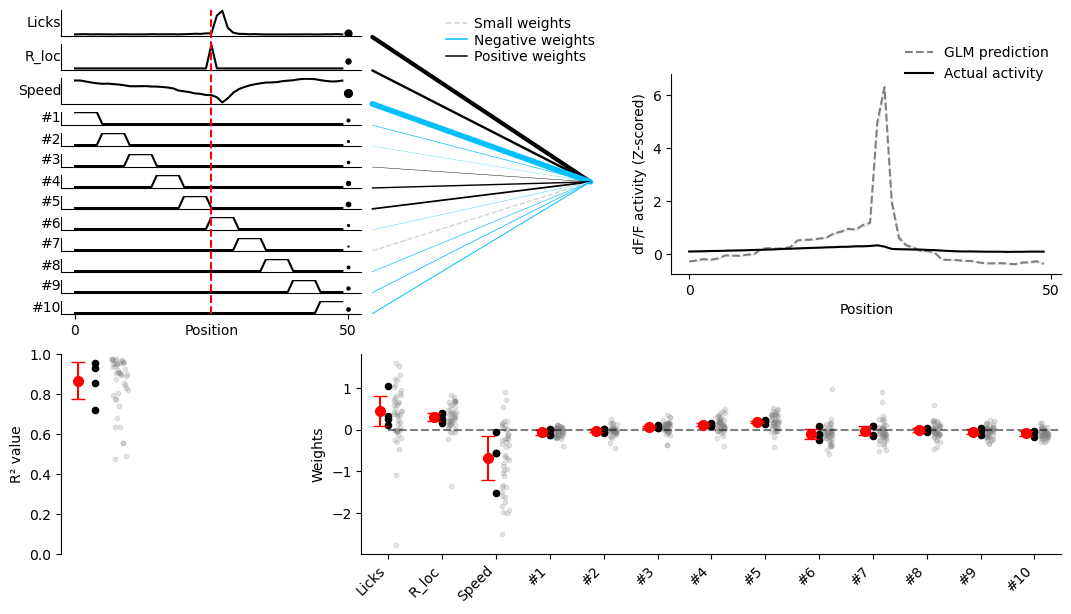

In [26]:
from GLM_regression import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV
import scipy.stats as stats

plt.rcParams.update({'font.size': 10,
                     'axes.spines.right': False,
                     'axes.spines.top': False,
                     'legend.frameon': False})

# Load data
filepath = "NDNFindivsomata_GLM.mat"
reorganized_data, variable_list = load_data(filepath)
print(f"variable_list: {variable_list}")

def plot_example_neuron(reorganized_data, GLM_params, variable_list, neuron='best', animal='best', model_name=None):
    if animal == 'best':
        best_R2 = -np.inf
        best_neuron = None
        best_animal = None
        for animal_key in GLM_params:
            R2_values = [GLM_params[animal_key][i]['R2'] for i in GLM_params[animal_key]]
            max_R2 = max(R2_values)
            if max_R2 > best_R2:
                best_R2 = max_R2
                best_neuron = np.argmax(R2_values)
                best_animal = animal_key
        animal = best_animal
        neuron = best_neuron
        print(f"Best neuron across all animals: {neuron}")
        print(f"Animal with best neuron: {animal}")
        print(f"R2: {best_R2}")

    elif neuron == 'best':
        R2_values = [GLM_params[animal][i]['R2'] for i in GLM_params[animal]]
        neuron = np.argmax(R2_values)
        print(f"Best neuron within {animal}: {neuron}")
        print(f"R2: {GLM_params[animal][neuron]['R2']}")

    else:
        print(f"Selected neuron: {neuron}")
        print(f"Animal: {animal}")
        print(f"R2: {GLM_params[animal][neuron]['R2']}")

    weights = GLM_params[animal][neuron]['weights']

    neuron_data = reorganized_data[animal][neuron][:, :, 1:]  # Skip activity (already z-scored and normalized)
    neuron_data = neuron_data[:, :, ~np.isnan(neuron_data).any(axis=(0, 1))]

    flattened_data = []
    for i in range(neuron_data.shape[1]):
        flattened_data.append(neuron_data[:, i].flatten())
    flattened_data = np.stack(flattened_data, axis=1)

    input_variables = neuron_data[:, 1:, :]
    neuron_activity = neuron_data[:, 0, :]

    fig = plt.figure(figsize=(10, 8))

    axes = gs.GridSpec(nrows=1, ncols=1, left=0, right=0.3, bottom=0.5)
    ax = fig.add_subplot(axes[0])
    ax.axis('off')
    avg_variables = np.mean(input_variables, axis=2)
    plot_example_neuron_variables(avg_variables, variable_list, ax=ax, weights=weights)

    axes = gs.GridSpec(nrows=1, ncols=1, left=0.3, right=0.54, bottom=0.5)
    ax = fig.add_subplot(axes[0])
    ax.axis('off')
    y1 = np.linspace(-0.54, -1.86, 3).tolist()
    y2 = np.linspace(-2.28, -6, 10).tolist()
    y = y1 + y2
    w_max = np.max(np.abs(weights))
    for i, w in enumerate(weights):
        if abs(w) < 0.05:
            line, = ax.plot([0, 1], [y[i], -3.4], color='lightgray', linestyle='--', linewidth=1)
        elif w < 0:
            line, = ax.plot([0, 1], [y[i], -3.4], color='deepskyblue', linewidth=abs(w / w_max) * 4)
        else:
            line, = ax.plot([0, 1], [y[i], -3.4], color='black', linewidth=abs(w / w_max) * 4)
        line.set_solid_capstyle('round')
    ax.set_ylim([-6, 0])
    ax.plot([0, 0], [0, 0], color='lightgray', linewidth=1.1, linestyle='--', label='Small weights')
    ax.plot([0, 0], [0, 0], color='deepskyblue', linewidth=1.1, label='Negative weights')
    ax.plot([0, 0], [0, 0], color='black', linewidth=1.1, label='Positive weights')
    ax.legend(fontsize=10, loc='upper right', frameon=False, handlelength=1.5, handletextpad=0.5, labelspacing=0.2,
              borderpad=0)

    glm_model = GLM_params[animal][neuron]['model']
    flattened_input_variables = flattened_data[:, 1:]
    predicted_activity = glm_model.predict(flattened_input_variables)

    pearson_R = np.corrcoef(predicted_activity, flattened_data[:, 0])[0, 1]
    print("pearson R2 overall:", pearson_R ** 2)

    predicted_activity = predicted_activity.reshape(neuron_activity.shape)
    avg_predicted_activity = np.mean(predicted_activity, axis=1)
    std_predicted_activity = np.std(predicted_activity, axis=1)
    sem_predicted_activity = std_predicted_activity / np.sqrt(predicted_activity.shape[1])
    avg_neuron_activity = np.mean(neuron_activity, axis=1)
    std_neuron_activity = np.std(neuron_activity, axis=1)
    sem_neuron_activity = std_neuron_activity / np.sqrt(neuron_activity.shape[1])

    pearson_R = np.corrcoef(avg_predicted_activity, avg_neuron_activity)[0, 1]
    print("pearson R2 average:", pearson_R ** 2)

    axes = gs.GridSpec(nrows=1, ncols=1, left=0.61, right=1, top=0.8, bottom=0.55)
    ax = fig.add_subplot(axes[0])
    ax.plot(avg_predicted_activity, label='GLM prediction', c='gray', linestyle='--')
    ax.plot(avg_neuron_activity, label='Actual activity', c='k')
    ax.fill_between(np.arange(avg_neuron_activity.shape[0]), avg_neuron_activity - sem_neuron_activity,
                    avg_neuron_activity + sem_neuron_activity, alpha=0.1, color='k')
    ax.fill_between(np.arange(avg_predicted_activity.shape[0]), avg_predicted_activity - sem_predicted_activity,
                    avg_predicted_activity + sem_predicted_activity, alpha=0.1, color='gray')
    ax.set_xlabel("Position")
    ax.set_xticks([0, 50])
    ax.set_ylabel("dF/F activity (Z-scored)")
    ax.legend(loc='upper right', bbox_to_anchor=(1, 1.2))

    axes = gs.GridSpec(nrows=1, ncols=1, top=0.45, bottom=0.2, left=0.3, right=1)
    ax = fig.add_subplot(axes[0])
    plot_GLM_summary_data(GLM_params, variable_list, ax=ax)

    axes = gs.GridSpec(nrows=1, ncols=1, top=0.45, bottom=0.2, left=0., right=0.2)
    ax = fig.add_subplot(axes[0])
    plot_R2_distribution(GLM_params, ax=ax)

    if model_name is not None:
        fig.savefig(f"figures/GLM_regression_{model_name}_{animal}_{neuron}.png", bbox_inches='tight', dpi=300)

def plot_example_neuron_variables(example_variables, variable_list, ax, weights=None):
    variable_list = variable_list[1:]

    fig = ax.get_figure()
    height_ratios = np.ones(example_variables.shape[1])
    height_ratios[-10:] = 0.5
    axes = gs.GridSpecFromSubplotSpec(nrows=example_variables.shape[1], ncols=1, subplot_spec=ax, hspace=0.5, height_ratios=height_ratios)
    for i in range(example_variables.shape[1]):
        ax = fig.add_subplot(axes[i])
        ax.plot(example_variables[:, i], color='k')
        ax.set_ylabel(variable_list[i], rotation=0, ha='right', va='center', labelpad=0)
        ax.set_xticks([])
        ax.set_yticks([])
        if weights is not None:
            ax.scatter([50],[0.3], c='k', s=abs(weights[i])*20)
    ax.set_xlabel('Position', labelpad=-10)
    ax.set_xticks([0,50])

    # Draw vertical line across all plots (remove axes and make the background transparent)
    ax = fig.add_subplot(axes[:])
    ax.vlines(24.5, 0, 1, linestyles='--', color='r')
    ax.set_xlim([0, 49])
    ax.set_ylim([0, 1])
    ax.axis('off')
    ax.patch.set_alpha(0)

# Load the data and fit the GLM
reorganized_data, variable_list = load_data("NDNFindivsomata_GLM.mat")
GLM_params = fit_GLM(reorganized_data, quintile=None, regression='ridge', alphas=[0.1, 1, 10, 100, 1000, 5000])

# Plot the results with all variables
plot_example_neuron(reorganized_data, GLM_params, variable_list, neuron='best', animal='best', model_name="NDNFindivsomata_GLM")


variable_list: ['Activity', 'Licks', 'R_loc', 'Speed', '#1', '#2', '#3', '#4', '#5', '#6', '#7', '#8', '#9', '#10']
shape neuron_data_filtered (50, 10, 390)
weights shape: (10,)
  avg_variables shape (50, 10)
 spatial_bin_labels ['#1', '#2', '#3', '#4', '#5', '#6', '#7', '#8', '#9', '#10']
pearson R2 average: 0.7862778074412808


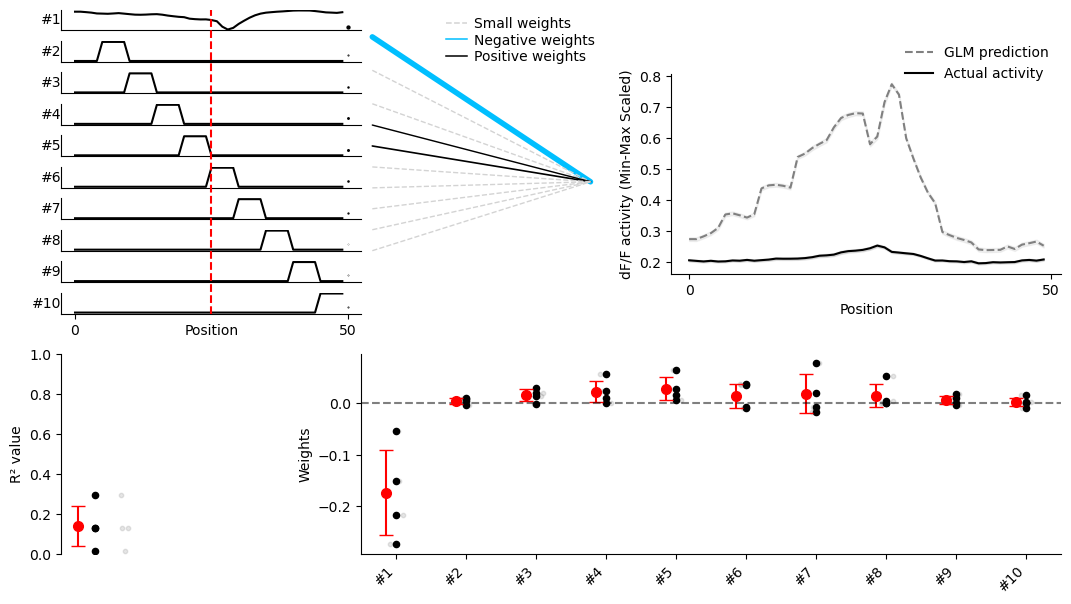

In [20]:
####################### more modular version ######################



from GLM_regression import *
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 10,
                     'axes.spines.right': False,
                     'axes.spines.top': False,
                     'legend.frameon': False})

# Load data
filepath = "NDNFindivsomata_GLM.mat"
reorganized_data, variable_list = load_data(filepath)
print(f"variable_list: {variable_list}")

#always have 0 in the indices to remove as it is the neuron activity 
indices_to_remove = [0, 1, 2, 4]

# variable_list: ['Activity', 'Licks', 'R_loc', 'Speed', '#1', '#2', '#3', '#4', '#5', '#6', '#7', '#8', '#9', '#10']


def plot_example_neuron_vars_removed(reorganized_data, variable_list, indices_to_remove, neuron='best', animal='best', model_name=None):
    GLM_params = {}

    if animal == 'best' or neuron == 'best':
        best_R2 = -np.inf
        best_animal = None
        best_neuron = None
        for animal_key in reorganized_data:
            GLM_params[animal_key] = {}
            for i, neuron_data in enumerate(reorganized_data[animal_key]):
                neuron_data = reorganized_data[animal_key][i][:, :, 1:]  # Remove the 0th index (neuron activity)
                neuron_data = neuron_data[:, :, ~np.isnan(neuron_data).any(axis=(0, 1))]

               
#                 indices_to_remove = [0, 1, 2, 4]
#                 remaining_indices = list(range(4, neuron_data.shape[1]))
                remaining_indices = []
                for i in range(neuron_data.shape[1]):
                    if i not in indices_to_remove:
                        remaining_indices.append(i)
    

                # Filter the data to keep only the remaining indices (which represent position)
                neuron_data_filtered = neuron_data[:, remaining_indices, :]

                min_val = np.min(neuron_data, axis=(0, 2), keepdims=True)
                max_val = np.max(neuron_data, axis=(0, 2), keepdims=True)
                neuron_data = (neuron_data - min_val) / (max_val - min_val)

                flattened_data_filtered = []
                for j in range(neuron_data_filtered.shape[1]):
                    flattened_data_filtered.append(neuron_data_filtered[:, j].flatten())

                flattened_data_filtered = np.stack(flattened_data_filtered, axis=1)

                # Combine normalized neuron activity with filtered features
                flattened_data_filtered = np.column_stack((neuron_data[:, 0, :].flatten(), flattened_data_filtered))

                if np.isnan(flattened_data_filtered).any():
                    print("nans in flattened_data_filtered")
                    continue

                if flattened_data_filtered.shape[1] <= 1:
                    print("No features available after preprocessing")
                    continue

                neuron_activity_flattened = neuron_data[:, 0, :].flatten()

                # Train GLM using only the position data
                design_matrix_X = flattened_data_filtered[:, 1:]  # Use filtered variables (skip the first column)
                neuron_activity_flattened = flattened_data_filtered[:, 0]
                model = RidgeCV(alphas=[0.1, 1, 10, 100, 1000, 5000], cv=None)
                model.fit(design_matrix_X, neuron_activity_flattened)

                predicted_activity = model.predict(design_matrix_X)
                predicted_activity = (predicted_activity - np.min(predicted_activity)) / (np.max(predicted_activity) - np.min(predicted_activity))

                R2 = model.score(design_matrix_X, neuron_activity_flattened)
                pearson_R = np.corrcoef(predicted_activity, neuron_activity_flattened)[0, 1]

                GLM_params[animal_key][i] = {
                    'weights': model.coef_,
                    'intercept': model.intercept_,
                    'R2': R2,
                    'R2_trialavg': pearson_R ** 2,
                    'model': model
                }

                if R2 > best_R2:
                    best_R2 = R2
                    best_animal = animal_key
                    best_neuron = i

        animal = best_animal
        neuron = best_neuron

        weights = GLM_params[animal][neuron]['weights']
        print(f"shape neuron_data_filtered {neuron_data_filtered.shape}")
        print(f"weights shape: {weights.shape}")

        fig = plt.figure(figsize=(10, 8))
        axes = gs.GridSpec(nrows=1, ncols=1, left=0, right=0.3, bottom=0.5)
        ax = fig.add_subplot(axes[0])
        ax.axis('off')

        # Calculate the average of the selected subset variables (position bins)
        avg_variables = np.mean(neuron_data_filtered, axis=2)
        print(f"  avg_variables shape {avg_variables.shape}")

        # Generate labels for the position bins
        spatial_bin_labels = [f"#{i}" for i in range(1, avg_variables.shape[1] + 1)]
        print(f" spatial_bin_labels {spatial_bin_labels}")
        if len(spatial_bin_labels) != avg_variables.shape[1]:
            raise ValueError("Mismatch between number of spatial bin labels and the shape of avg_variables")
            
        def plotting_example_neuron_variables(avg_variables, keep_vars_list, ax, weights=None):
            fig = ax.get_figure()

            # Define height ratios for each variable subplot
            height_ratios = np.ones(len(keep_vars_list))

            # Set up the grid for subplots
            axes = gs.GridSpecFromSubplotSpec(nrows=len(keep_vars_list), ncols=1, subplot_spec=ax, hspace=0.5, height_ratios=height_ratios)

            # Iterate through the variables and plot each one
            for i in range(len(keep_vars_list)):
                sub_ax = fig.add_subplot(axes[i])
                sub_ax.plot(avg_variables[:, i], color='k')  # Ensure correct indexing to plot the right variable

                # Set labels and ticks
                sub_ax.set_ylabel(keep_vars_list[i], rotation=0, ha='right', va='center', labelpad=0)
                sub_ax.set_xticks([])
                sub_ax.set_yticks([])

                # Plot weights as scatter points if provided
                if weights is not None:
                    sub_ax.scatter([50], [0.3], c='k', s=abs(weights[i]) * 20)

            # Set x-axis labels for the bottom plot
            sub_ax.set_xlabel('Position', labelpad=-10)
            sub_ax.set_xticks([0, 50])

            # Draw vertical line across all plots (for visual separation)
            overlay_ax = fig.add_subplot(axes[:])
            overlay_ax.vlines(24.5, 0, 1, linestyles='--', color='r')
            overlay_ax.set_xlim([0, 49])
            overlay_ax.set_ylim([0, 1])
            overlay_ax.axis('off')
            overlay_ax.patch.set_alpha(0)

        # Plot the data
        plotting_example_neuron_variables(avg_variables, spatial_bin_labels, ax=ax, weights=weights)

        
#         def plotting_example_neuron_variables(avg_variables, keep_vars_list, ax, weights=None):
#             fig = ax.get_figure()

#             # Define height ratios for each variable subplot
#             height_ratios = np.ones(len(keep_vars_list))
#             height_ratios[-10:] = 0.5  # Adjust the height for the last 10 variables (spatial bins)

#             # Set up the grid for subplots
#             axes = gs.GridSpecFromSubplotSpec(nrows=len(keep_vars_list), ncols=1, subplot_spec=ax, hspace=0.5, height_ratios=height_ratios)

#             # Iterate through the variables and plot each one
#             for i in range(len(keep_vars_list)):
#                 sub_ax = fig.add_subplot(axes[i])
#                 sub_ax.plot(avg_variables[:, i], color='k')  # Ensure correct indexing to plot the right variable

#                 # Set labels and ticks
#                 sub_ax.set_ylabel(keep_vars_list[i], rotation=0, ha='right', va='center', labelpad=0)
#                 sub_ax.set_xticks([])
#                 sub_ax.set_yticks([])

#                 # Plot weights as scatter points if provided
#                 if weights is not None:
#                     sub_ax.scatter([50], [0.3], c='k', s=abs(weights[i]) * 20)

#             # Set x-axis labels for the bottom plot
#             sub_ax.set_xlabel('Position', labelpad=-10)
#             sub_ax.set_xticks([0, 50])

#             # Draw vertical line across all plots (for visual separation)
#             overlay_ax = fig.add_subplot(axes[:])
#             overlay_ax.vlines(24.5, 0, 1, linestyles='--', color='r')
#             overlay_ax.set_xlim([0, 49])
#             overlay_ax.set_ylim([0, 1])
#             overlay_ax.axis('off')
#             overlay_ax.patch.set_alpha(0)
            
# #         plotting_example_neuron_variables(avg_variables, keep_vars_list, ax, weights=None)

#         # Plot the data
#         plot_example_neuron_variables(avg_variables, spatial_bin_labels, ax=ax, weights=weights)

    axes = gs.GridSpec(nrows=1, ncols=1, left=0.3, right=0.54, bottom=0.5)
    ax = fig.add_subplot(axes[0])
    ax.axis('off')
    y1 = np.linspace(-0.54, -1.86, 3).tolist()
    y2 = np.linspace(-2.28, -6, 10).tolist()
    y = y1 + y2
    w_max = np.max(np.abs(weights))
    for i, w in enumerate(weights):
        if abs(w) < 0.05:
            line, = ax.plot([0, 1], [y[i], -3.4], color='lightgray', linestyle='--', linewidth=1)
        elif w < 0:
            line, = ax.plot([0, 1], [y[i], -3.4], color='deepskyblue', linewidth=abs(w/w_max) * 4)
        else:
            line, = ax.plot([0, 1], [y[i], -3.4], color='black', linewidth=abs(w/w_max) * 4)
        line.set_solid_capstyle('round')
    ax.set_ylim([-6, 0])
    ax.plot([0, 0], [0, 0], color='lightgray', linewidth=1.1, linestyle='--', label='Small weights')
    ax.plot([0, 0], [0, 0], color='deepskyblue', linewidth=1.1, label='Negative weights')
    ax.plot([0, 0], [0, 0], color='black', linewidth=1.1, label='Positive weights')
    ax.legend(fontsize=10, loc='upper right', frameon=False, handlelength=1.5, handletextpad=0.5, labelspacing=0.2, borderpad=0)

    glm_model = GLM_params[animal][neuron]['model']
    flattened_input_variables = flattened_data_filtered[:, 1:]
    predicted_activity = glm_model.predict(flattened_input_variables)

    predicted_activity = (predicted_activity - np.min(predicted_activity)) / (np.max(predicted_activity) - np.min(predicted_activity))

    neuron_activity = neuron_data[:, 0, :]

    predicted_activity = predicted_activity.reshape(neuron_activity.shape)
    avg_predicted_activity = np.mean(predicted_activity, axis=1)
    std_predicted_activity = np.std(predicted_activity, axis=1)
    sem_predicted_activity = std_predicted_activity / np.sqrt(predicted_activity.shape[1])

    avg_neuron_activity = np.mean(neuron_activity, axis=1)
    std_neuron_activity = np.std(neuron_activity, axis=1)
    sem_neuron_activity = std_neuron_activity / np.sqrt(neuron_activity.shape[1])

    pearson_R = np.corrcoef(avg_predicted_activity, avg_neuron_activity)[0, 1]
    print("pearson R2 average:", pearson_R ** 2)

    axes = gs.GridSpec(nrows=1, ncols=1, left=0.61, right=1, top=0.8, bottom=0.55)
    ax = fig.add_subplot(axes[0])
    ax.plot(avg_predicted_activity, label='GLM prediction', c='gray', linestyle='--')
    ax.plot(avg_neuron_activity, label='Actual activity', c='k')
    ax.fill_between(np.arange(avg_neuron_activity.shape[0]), avg_neuron_activity-sem_neuron_activity, avg_neuron_activity+sem_neuron_activity, alpha=0.1, color='k')
    ax.fill_between(np.arange(avg_predicted_activity.shape[0]), avg_predicted_activity-sem_predicted_activity, avg_predicted_activity+sem_predicted_activity, alpha=0.1, color='gray')
    ax.set_xlabel("Position")
    ax.set_xticks([0, 50])
    ax.set_ylabel("dF/F activity (Min-Max Scaled)")
    ax.legend(loc='upper right', bbox_to_anchor=(1, 1.2))

    axes = gs.GridSpec(nrows=1, ncols=1, top=0.45, bottom=0.2, left=0.3, right=1)
    ax = fig.add_subplot(axes[0])

    def plot_GLM_summary_data(GLM_params, spatial_bin_labels, ax):
        jitter = 0.1

        animal_averages = []

        for animal_key in GLM_params:
            neuron_weights = []
            for neuron_nr in GLM_params[animal_key]:
                weights = GLM_params[animal_key][neuron_nr]['weights']
                variable_indices = np.arange(len(weights))

                jittered_x = variable_indices + np.random.uniform(-jitter, jitter, len(weights))
                ax.scatter(jittered_x, weights, color='grey', alpha=0.2, s=10)

                neuron_weights.append(weights)

            neuron_weights = np.array(neuron_weights)
            mean_weights = np.mean(neuron_weights, axis=0)
            animal_averages.append(mean_weights)
            ax.scatter(range(len(spatial_bin_labels)), mean_weights, color='black', label=f'Animal {animal_key}', s=20)

        animal_averages = np.array(animal_averages)
        global_mean = np.mean(animal_averages, axis=0)
        global_std = np.std(animal_averages, axis=0)
        ax.errorbar(np.arange(len(spatial_bin_labels)) - 0.15, global_mean, yerr=global_std, fmt='o', color='red', ecolor='red', capsize=5, label='Average of all animals', markersize=7)

        ax.set_xticks(np.arange(len(spatial_bin_labels)))
        ax.set_xticklabels(spatial_bin_labels, rotation=45, ha='right')
        ax.set_ylabel('Weights')
        ax.hlines(0, -0.5, len(weights) - 0.5, linestyles='--', color='black', alpha=0.5)
        ax.set_xlim([-0.5, len(weights) - 0.5])

    plot_GLM_summary_data(GLM_params, spatial_bin_labels, ax)

    axes = gs.GridSpec(nrows=1, ncols=1, top=0.45, bottom=0.2, left=0., right=0.2)
    ax = fig.add_subplot(axes[0])
    plot_R2_distribution(GLM_params, ax=ax)

    if model_name is not None:
        fig.savefig(f"figures/GLM_regression_{model_name}_{animal}_{neuron}.png", bbox_inches='tight', dpi=300)


plot_example_neuron_vars_removed(reorganized_data, variable_list, indices_to_remove, neuron='best', animal='best', model_name=None)